# Probing GIN MDD

Here we'll first be loading the FC matrices and explore their structure

In [1]:
#using read_dataset from Datasets/FC/create_dataset.py to read the dataset
from Datasets.FC.create_dataset import read_dataset_MDD

In [2]:
dataset = read_dataset_MDD()

In [3]:
#ok, let's explore the data a bit more
#dataset is a list object of torch_geometric.data objects

#let's see the first element
print(dataset[0])

#it's a dictionary object, let's see the keys
print(dataset[0].keys())

#ok, let's see the values
print(dataset[0].values())

#it has 4 keys, 'x', 'edge_index', 'edge_attr' and 'y' where y=0 menas the patient is healthy and y=1 means the patient has Autism Spectrum Disorder (ASD)
"""graph = Data(x=ROI.reshape(-1,116).float(),
                     edge_index=G.indices().reshape(2,-1).long(),
                     edge_attr=G.values().reshape(-1,1).float(),
                     y=y.long())"""

#how much data do we have?
len(dataset)


Data(x=[116, 116], edge_index=[2, 1294], edge_attr=[1294, 1], y=[1])
['x', 'edge_index', 'y', 'edge_attr']
ValuesView({'x': tensor([[ 0.0000,  0.2857,  0.0804,  ...,  0.2032,  0.1674,  0.0906],
        [ 0.2857,  0.0000, -0.3860,  ...,  0.1637, -0.0359,  0.1674],
        [ 0.0804, -0.3860,  0.0000,  ..., -0.0175, -0.0309,  0.0296],
        ...,
        [ 0.2032,  0.1637, -0.0175,  ...,  0.0000,  0.2329, -0.1452],
        [ 0.1674, -0.0359, -0.0309,  ...,  0.2329,  0.0000,  0.0183],
        [ 0.0906,  0.1674,  0.0296,  ..., -0.1452,  0.0183,  0.0000]]), 'edge_index': tensor([[  0,   0,   0,  ..., 113, 113, 114],
        [ 10,  12,  14,  ..., 111, 112, 108]]), 'edge_attr': tensor([[0.7785],
        [0.6966],
        [0.5463],
        ...,
        [0.6415],
        [0.4745],
        [0.5401]]), 'y': tensor([0])})


1604

In [4]:
#set the seed
import torch
torch.manual_seed(37)

DATASET = "FC_MDD"

MODEL = "GIN"
from models.models_FC import GIN_framework as framework # import the model
gnn = framework(dataset)

MODELbis = "GINbis"
from models.models_FC import GIN_framework_bis as framework # import the model
gnnbis = framework(dataset)

MODELtri = "GINtri"
from models.models_FC import GIN_framework_tri as framework # import the model
gnntri = framework(dataset)

MODEL2 = "GIN2"
from models.models_FC import GIN_framework2 as framework2 # import the model
gnn2 = framework2(dataset)

MODEL3 = "GIN3"
from models.models_FC import GIN_framework3 as framework3 # import the model
gnn3 = framework3(dataset)

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
# gnn.iterate()

In [6]:
# gnnbis.iterate()

In [7]:
# gnntri.iterate()

In [8]:
# gnn2.iterate()

In [9]:
# gnn3.iterate()

In [10]:
# gnn3.cross_validate()

In [11]:
#gnn.train()

In [12]:
# gnntri.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

In [13]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

# gnn2.save_model(path="models/"+DATASET+"_"+MODEL2+"server.pt")

# gnn3.save_model(path="models/"+DATASET+"_"+MODEL3+"server.pt")

In [14]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

# gnn2.load_model(path="models/"+DATASET+"_"+MODEL2+"server.pt")

# gnn3.load_model(path="models/"+DATASET+"_"+MODEL3+"server.pt")

# gnntri.load_model(path="models/"+DATASET+"_"+MODELtri+"server.pt")
#gnn3.save_model(path="models/"+DATASET+"_"+MODEL3+"server_iterate.pt")
#gnn3.load_model(path="models/"+DATASET+"_"+MODEL3+"server_iterate.pt")

In [15]:
gnn.evaluate()

Test Loss: 1.728, Train Acc: 0.970 Test Acc: 0.642


In [16]:
# gnntri.evaluate()

In [17]:
# gnn3.evaluate()

In [18]:
# from torch_geometric.data import DataLoader
# test_loader = DataLoader(dataset[gnn.test_idx], batch_size=1, shuffle=False)

# gnn3.evaluate2(test_loader)

### Properties

In [ ]:
import pickle as pkl
import networkx as nx

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the average path length of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def calculate_small_world(G):
    if nx.is_connected(G):
        return nx.algorithms.smallworld.sigma(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the small world coefficient of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.algorithms.smallworld.sigma(largest_component)
    
def compute_swi(graph):
    # Calculate clustering coefficient and average path length for the given graph
    clustering_coeff = nx.average_clustering(graph)
    avg_path_len = calculate_avg_path_length(graph)
    
    # Generate a random graph with the same number of nodes and edges
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    
    # Generate a lattice graph with the same number of nodes and edges
    lattice_graph = nx.watts_strogatz_graph(num_nodes, k=4, p=0)  # Adjust k as needed
    
    # Calculate clustering coefficient and average path length for the random graph
    random_clustering_coeff = nx.average_clustering(random_graph)
    random_avg_path_len = calculate_avg_path_length(random_graph)
    
    # Calculate clustering coefficient and average path length for the lattice graph
    lattice_clustering_coeff = nx.average_clustering(lattice_graph)
    lattice_avg_path_len = calculate_avg_path_length(lattice_graph)
    
    # Compute the Small-World Index (SWI)
    swi = ((avg_path_len - lattice_avg_path_len) / (random_avg_path_len - lattice_avg_path_len)) * \
          ((clustering_coeff - random_clustering_coeff) / (lattice_clustering_coeff - random_clustering_coeff))
    
    return swi
    

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_path_len = calculate_avg_path_length(G)
        num_cliques = len(list(nx.find_cliques(G)))
        num_triangles = sum(nx.triangles(G).values()) / 3
        num_squares = sum(nx.square_clustering(G).values()) / 4
        number_of_node_in_the_largest_fully_connected_component = len(max(nx.connected_components(G), key=len))
        assortativity = nx.degree_assortativity_coefficient(G)
        small_world = compute_swi(G)
            
        properties.append((num_nodes, num_edges, density, avg_path_len, num_cliques, num_triangles, num_squares, number_of_node_in_the_largest_fully_connected_component, assortativity, small_world))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties = compute_graph_properties(selected_dataset)

# Save the properties to files
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "wb") as f:
    pkl.dump(train_properties, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "wb") as f:
    pkl.dump(test_properties, f)

In [ ]:
# print(len(train_properties))
# train_properties[0:5]

In [18]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "rb") as f:
    test_properties = pkl.load(f)

### Features

In [16]:
train_features, test_features = gnn.evaluate_with_features2()

In [17]:
print(len(train_features[0]))
len(train_features), len(test_features)

9


(1523, 81)

In [22]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
# train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

train_x8 = np.array([feat[8] for feat in train_features])
test_x8 = np.array([feat[8] for feat in test_features])


# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7), (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global',  'x6', 'x7', 'x8']

### Diagnostic classifier

In [ ]:
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 1300000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y[:, i].cpu().numpy()
            test_target = test_y[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "wb") as f:
    pkl.dump(results, f)

In [21]:
#load results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "rb") as f:
    results = pkl.load(f)

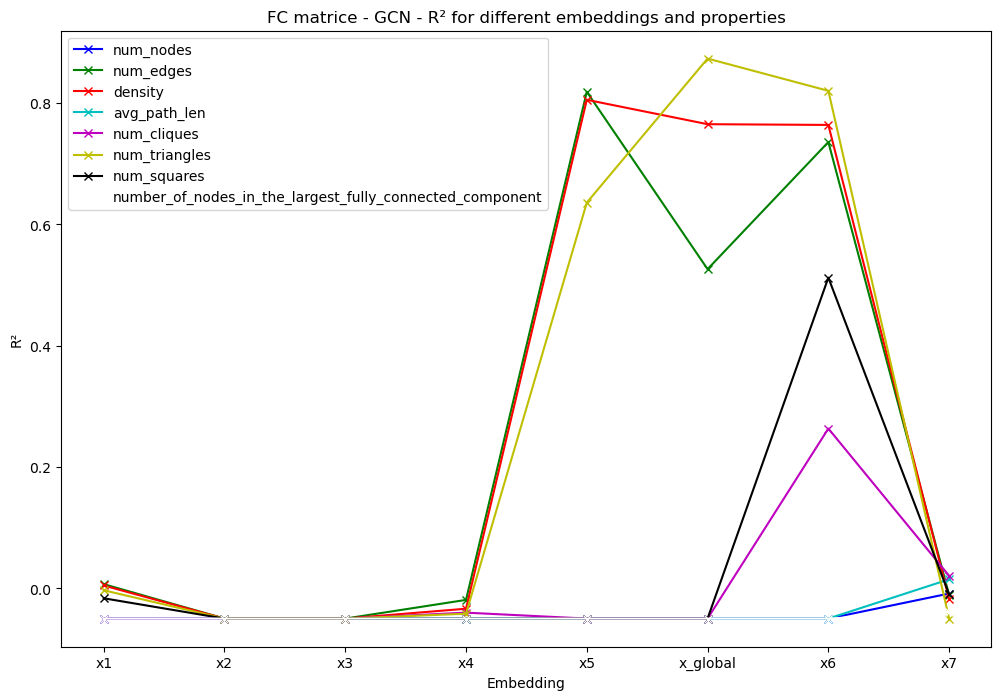

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple']


plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_name)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"test_R2_plot.png")


In [ ]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple']


plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_name)][2]
        if train_r2 < -0.05:
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"train_R2_plot.png")

## Test with more properties

In [19]:
import networkx as nx
import numpy as np

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Use the average path length of the largest connected component for disconnected graphs
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
   
def compute_swi(graph):
    # Calculate clustering coefficient and average path length for the given graph
    clustering_coeff = nx.average_clustering(graph)
    avg_path_len = calculate_avg_path_length(graph)
    
    # Generate a random graph with the same number of nodes and edges
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    
    # Generate a lattice graph with the same number of nodes and edges
    lattice_graph = nx.watts_strogatz_graph(num_nodes, k=4, p=0)  # Adjust k as needed
    
    # Calculate clustering coefficient and average path length for the random graph
    random_clustering_coeff = nx.average_clustering(random_graph)
    random_avg_path_len = calculate_avg_path_length(random_graph)
    
    # Calculate clustering coefficient and average path length for the lattice graph
    lattice_clustering_coeff = nx.average_clustering(lattice_graph)
    lattice_avg_path_len = calculate_avg_path_length(lattice_graph)
    
    # Compute the Small-World Index (SWI)
    swi = ((avg_path_len - lattice_avg_path_len) / (random_avg_path_len - lattice_avg_path_len)) * \
          ((clustering_coeff - random_clustering_coeff) / (lattice_clustering_coeff - random_clustering_coeff))
    
    return swi


def betweenness_centralization(G):
    n = len(G)
    betweenness = nx.betweenness_centrality(G)
    max_betweenness = max(betweenness.values())
    centralization = sum(max_betweenness - bet for bet in betweenness.values())
    if n > 2:
        centralization /= (n - 1) * (n - 2) / 2
    return centralization

def pagerank_centralization(G, alpha=0.85):
    n = len(G)
    pagerank = nx.pagerank(G, alpha=alpha)
    max_pagerank = max(pagerank.values())
    centralization = sum(max_pagerank - pr for pr in pagerank.values())
    if n > 1:
        centralization /= (n - 1)
    return centralization

def clustering_properties(G):
    average_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    return average_clustering, transitivity

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        
        # Number of nodes
        num_nodes = G.number_of_nodes()
        
        # Number of edges
        num_edges = G.number_of_edges()
        
        # Density
        density = nx.density(G)
        
        # Average Path Length
        avg_path_len = calculate_avg_path_length(G)
        
        # Diameter
        if nx.is_connected(G):
            diameter = nx.diameter(G)
        else:
            # Use the diameter of the largest connected component for disconnected graphs
            components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
            largest_component = max(components, key=len)
            diameter = nx.diameter(largest_component)
        
        # Radius
        if nx.is_connected(G):
            radius = nx.radius(G)
        else:
            radius = nx.radius(largest_component)
        
        # Clustering Coefficient
        clustering_coeff = nx.average_clustering(G)
        
        # Transitivity
        transitivity = nx.transitivity(G)
        
        # Assortativity
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Number of Cliques
        num_cliques = len(list(nx.find_cliques(G)))
        
        # Number of Triangles
        num_triangles = sum(nx.triangles(G).values()) / 3
        
        # Number of Squares (4-cycles)
        num_squares = sum(nx.square_clustering(G).values()) / 4
        
        # Size of the Largest Connected Component
        largest_component_size = len(max(nx.connected_components(G), key=len))
        
        # Average Degree
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
        
        # Eigenvalues of the Adjacency Matrix (for spectral properties)
        eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(G).todense())
        spectral_radius = max(eigenvalues)
        algebraic_connectivity = sorted(eigenvalues)[1]  # second smallest eigenvalue
        
        # Graph Laplacian Eigenvalues
        laplacian_eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(G).todense())
        graph_energy = sum(abs(laplacian_eigenvalues))
        
        # Small-World-ness
        # Compare clustering coefficient and average path length with those of a random graph
        random_graph = nx.gnm_random_graph(num_nodes, num_edges)
        random_clustering_coeff = nx.average_clustering(random_graph)
        random_avg_path_len = calculate_avg_path_length(random_graph)
        small_world_coefficient = (clustering_coeff / random_clustering_coeff) / (avg_path_len / random_avg_path_len)

        small_world_index = compute_swi(G)

        # Calculate Betweenness Centralization
        betweenness_cent = betweenness_centralization(G)
        print(f"Betweenness Centralization: {betweenness_cent}")

        # Calculate PageRank Centralization
        pagerank_cent = pagerank_centralization(G)
        print(f"PageRank Centralization: {pagerank_cent}")

        # Calculate Clustering properties
        avg_clustering, transitivity = clustering_properties(G)
        print(f"Average Clustering Coefficient: {avg_clustering}")
        print(f"Transitivity: {transitivity}")
        
        properties.append((
            num_nodes,
            num_edges,
            density,
            avg_path_len,
            diameter,
            radius,
            clustering_coeff,
            transitivity,
            assortativity,
            num_cliques,
            num_triangles,
            num_squares,
            largest_component_size,
            avg_degree,
            avg_betweenness_centrality,
            spectral_radius,
            algebraic_connectivity,
            graph_energy,
            small_world_coefficient, 
            betweenness_cent,
            pagerank_cent,
            avg_clustering,
            small_world_index           

        ))
    return properties


train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)



Betweenness Centralization: 0.001724022477030078
PageRank Centralization: 0.011393522233220854
Average Clustering Coefficient: 0.46590185426058695
Transitivity: 0.5531747591900924
Betweenness Centralization: 0.0017261983853566708
PageRank Centralization: 0.008926832657320428
Average Clustering Coefficient: 0.5182009816568728
Transitivity: 0.5797223390828776
Betweenness Centralization: 0.003333083015572392
PageRank Centralization: 0.015313849504207902
Average Clustering Coefficient: 0.4704590487485227
Transitivity: 0.4714022140221402
Betweenness Centralization: 0.0010671877568257148
PageRank Centralization: 0.005223720319742302
Average Clustering Coefficient: 0.5604119583322708
Transitivity: 0.5464108308171812
Betweenness Centralization: 0.0022241433151757965
PageRank Centralization: 0.010110693464664746
Average Clustering Coefficient: 0.5817108880061148
Transitivity: 0.6164350158497928
Betweenness Centralization: 0.0008253715900658974
PageRank Centralization: 0.008937849000785932
Avera

Betweenness Centralization: 0.001078428822044226
PageRank Centralization: 0.009063561996750147
Average Clustering Coefficient: 0.5532543094005744
Transitivity: 0.5523364485981308
Betweenness Centralization: 0.001653614405354768
PageRank Centralization: 0.007032983882622251
Average Clustering Coefficient: 0.5508670653133515
Transitivity: 0.5519043035886154
Betweenness Centralization: 0.0015445362029709983
PageRank Centralization: 0.009370313296131976
Average Clustering Coefficient: 0.503380722715761
Transitivity: 0.5818673883626523
Betweenness Centralization: 0.0017807546976311142
PageRank Centralization: 0.009501326946814097
Average Clustering Coefficient: 0.4149566523606274
Transitivity: 0.4692404834926935
Betweenness Centralization: 0.0020229469275225478
PageRank Centralization: 0.007260008922385329
Average Clustering Coefficient: 0.5209656672192529
Transitivity: 0.5912332579579057
Betweenness Centralization: 0.0011742922774086507
PageRank Centralization: 0.0074486415980829805
Averag

Betweenness Centralization: 0.0010914474082738801
PageRank Centralization: 0.009126440311914046
Average Clustering Coefficient: 0.4677095114948748
Transitivity: 0.47178947368421054
Betweenness Centralization: 0.0012685107404340795
PageRank Centralization: 0.0068168393209759245
Average Clustering Coefficient: 0.5186194311514003
Transitivity: 0.5033734232912878
Betweenness Centralization: 0.0009491348124185677
PageRank Centralization: 0.006918374381046993
Average Clustering Coefficient: 0.48102698538622907
Transitivity: 0.4596774193548387
Betweenness Centralization: 0.0012768517676512569
PageRank Centralization: 0.012649930264661288
Average Clustering Coefficient: 0.5059288865619318
Transitivity: 0.4874008810572687
Betweenness Centralization: 0.0009213240690828585
PageRank Centralization: 0.010800485001101505
Average Clustering Coefficient: 0.4979806981681155
Transitivity: 0.5099398139704542
Betweenness Centralization: 0.002157265795254701
PageRank Centralization: 0.008179831460735679
Av

Betweenness Centralization: 0.0015906975639688602
PageRank Centralization: 0.009703507119299034
Average Clustering Coefficient: 0.4380468922164223
Transitivity: 0.4976958525345622
Betweenness Centralization: 0.0018844204684231544
PageRank Centralization: 0.009696681730930105
Average Clustering Coefficient: 0.4778778278778279
Transitivity: 0.46482213438735176
Betweenness Centralization: 0.0014654430088957636
PageRank Centralization: 0.007175270605341496
Average Clustering Coefficient: 0.5313838022553865
Transitivity: 0.5791930643547849
Betweenness Centralization: 0.0023295450822815385
PageRank Centralization: 0.007339947681879866
Average Clustering Coefficient: 0.4882268866324595
Transitivity: 0.49248774315989247
Betweenness Centralization: 0.0014804367483372718
PageRank Centralization: 0.006898064630729408
Average Clustering Coefficient: 0.4274698304110067
Transitivity: 0.4977714748784441
Betweenness Centralization: 0.0013696492907756873
PageRank Centralization: 0.006859673356675671
Av

Betweenness Centralization: 0.0007891668184026563
PageRank Centralization: 0.006072713927971934
Average Clustering Coefficient: 0.5060378182722585
Transitivity: 0.5087798799139005
Betweenness Centralization: 0.0023663928569996754
PageRank Centralization: 0.010479937220992767
Average Clustering Coefficient: 0.40516212087419506
Transitivity: 0.4718985606579849
Betweenness Centralization: 0.0007162682787337847
PageRank Centralization: 0.008947032081459878
Average Clustering Coefficient: 0.41375953274526434
Transitivity: 0.4521642619311876
Betweenness Centralization: 0.0011434019801239968
PageRank Centralization: 0.009548973385956892
Average Clustering Coefficient: 0.41876977368463436
Transitivity: 0.4487510766580534
Betweenness Centralization: 0.0015447532700325556
PageRank Centralization: 0.01063250198665506
Average Clustering Coefficient: 0.46562118234926914
Transitivity: 0.4886090278760436
Betweenness Centralization: 0.0010981793433088153
PageRank Centralization: 0.01043065988519064
Av

Betweenness Centralization: 0.001956965640076141
PageRank Centralization: 0.009370718026949021
Average Clustering Coefficient: 0.4986909248519155
Transitivity: 0.64555633310007
Betweenness Centralization: 0.001097834255933805
PageRank Centralization: 0.012307833521830803
Average Clustering Coefficient: 0.5119456513881813
Transitivity: 0.4922660479505027
Betweenness Centralization: 0.0009281198376291561
PageRank Centralization: 0.00724683769501419
Average Clustering Coefficient: 0.5122449653285183
Transitivity: 0.5569395017793595
Betweenness Centralization: 0.0022617902301814673
PageRank Centralization: 0.009629642317162127
Average Clustering Coefficient: 0.45033410327527973
Transitivity: 0.6300099370652534
Betweenness Centralization: 0.0020996979398163096
PageRank Centralization: 0.008304006896864726
Average Clustering Coefficient: 0.41661745334311706
Transitivity: 0.4287369640787949
Betweenness Centralization: 0.0012498034543931896
PageRank Centralization: 0.008991904382429276
Average

Betweenness Centralization: 0.0008829538383133426
PageRank Centralization: 0.00836495741338483
Average Clustering Coefficient: 0.4698271831679628
Transitivity: 0.49511320054435237
Betweenness Centralization: 0.0010260678073167448
PageRank Centralization: 0.008074045819507466
Average Clustering Coefficient: 0.46228060562443585
Transitivity: 0.483364009627637
Betweenness Centralization: 0.0014427403242156802
PageRank Centralization: 0.007157924869643705
Average Clustering Coefficient: 0.4944544344544343
Transitivity: 0.504791620236238
Betweenness Centralization: 0.0006950915804825128
PageRank Centralization: 0.0058676434201165705
Average Clustering Coefficient: 0.4511632887087187
Transitivity: 0.45184036102101255
Betweenness Centralization: 0.00268997163384751
PageRank Centralization: 0.009619717764229523
Average Clustering Coefficient: 0.47187694034280314
Transitivity: 0.5198438516590761
Betweenness Centralization: 0.0008332279148941432
PageRank Centralization: 0.0072472085940706536
Ave

Betweenness Centralization: 0.0020472072762164114
PageRank Centralization: 0.010465319250954551
Average Clustering Coefficient: 0.506670796101707
Transitivity: 0.5115537848605578
Betweenness Centralization: 0.0016757930327549045
PageRank Centralization: 0.009793978999732816
Average Clustering Coefficient: 0.48137004758318097
Transitivity: 0.5523465703971119
Betweenness Centralization: 0.0014055379802366055
PageRank Centralization: 0.005585101263801825
Average Clustering Coefficient: 0.5240769477785061
Transitivity: 0.5414705404966726
Betweenness Centralization: 0.0024985181175632876
PageRank Centralization: 0.007848103983640765
Average Clustering Coefficient: 0.46933098209987806
Transitivity: 0.49395699262282217
Betweenness Centralization: 0.0008210593645557531
PageRank Centralization: 0.007822104940505191
Average Clustering Coefficient: 0.48953160246672156
Transitivity: 0.4874131944444444
Betweenness Centralization: 0.00199855712115177
PageRank Centralization: 0.008469836286737838
Ave

Betweenness Centralization: 0.0012913283270453626
PageRank Centralization: 0.007788488267137701
Average Clustering Coefficient: 0.45667479437950037
Transitivity: 0.49178910976663787
Betweenness Centralization: 0.0007374233880125527
PageRank Centralization: 0.006399117984295209
Average Clustering Coefficient: 0.5512808291478776
Transitivity: 0.5576146788990826
Betweenness Centralization: 0.001516910910773752
PageRank Centralization: 0.007526350559757753
Average Clustering Coefficient: 0.5066604959928422
Transitivity: 0.4933936022253129
Betweenness Centralization: 0.0023846473295612495
PageRank Centralization: 0.008042888596630106
Average Clustering Coefficient: 0.3866151866151865
Transitivity: 0.45572705117790413
Betweenness Centralization: 0.0016016469382373227
PageRank Centralization: 0.0053399077686798494
Average Clustering Coefficient: 0.5216941943268408
Transitivity: 0.5514465065502183
Betweenness Centralization: 0.0017179575163098497
PageRank Centralization: 0.011097825432126668
A

Betweenness Centralization: 0.0018140897768610291
PageRank Centralization: 0.009929816608945105
Average Clustering Coefficient: 0.5092522923792275
Transitivity: 0.5586242834809797
Betweenness Centralization: 0.0009839193475925736
PageRank Centralization: 0.007014520844424768
Average Clustering Coefficient: 0.44457057963249913
Transitivity: 0.4331011289935143
Betweenness Centralization: 0.0012345570286955128
PageRank Centralization: 0.012827217351017817
Average Clustering Coefficient: 0.4240001786117657
Transitivity: 0.4571134020618557
Betweenness Centralization: 0.001166007175048415
PageRank Centralization: 0.00989421068041138
Average Clustering Coefficient: 0.45597644833192497
Transitivity: 0.4685908319185059
Betweenness Centralization: 0.002702588734957143
PageRank Centralization: 0.0067912353451892215
Average Clustering Coefficient: 0.5637214077814213
Transitivity: 0.5724394339170065
Betweenness Centralization: 0.0013901707371688072
PageRank Centralization: 0.008168479325963795
Aver

Betweenness Centralization: 0.0013391404756897631
PageRank Centralization: 0.007961190188778342
Average Clustering Coefficient: 0.4786804655218606
Transitivity: 0.5067311737484224
Betweenness Centralization: 0.001566902107207433
PageRank Centralization: 0.00874906305307677
Average Clustering Coefficient: 0.45549237469409354
Transitivity: 0.5390577197634101
Betweenness Centralization: 0.001684508315839681
PageRank Centralization: 0.00866019250381122
Average Clustering Coefficient: 0.5434199922319676
Transitivity: 0.5371267605633803
Betweenness Centralization: 0.0009217250623534495
PageRank Centralization: 0.007273530727523175
Average Clustering Coefficient: 0.5320536776785756
Transitivity: 0.5588415756534544
Betweenness Centralization: 0.0009380664996812389
PageRank Centralization: 0.009591047000934662
Average Clustering Coefficient: 0.4764856165772947
Transitivity: 0.4833555259653795
Betweenness Centralization: 0.0023251061920560967
PageRank Centralization: 0.009377143575738656
Average

Betweenness Centralization: 0.0010841036632285282
PageRank Centralization: 0.006826822818730503
Average Clustering Coefficient: 0.45092524043416893
Transitivity: 0.4782154969997391
Betweenness Centralization: 0.0017870095563027309
PageRank Centralization: 0.00903026630248622
Average Clustering Coefficient: 0.42612668008539145
Transitivity: 0.46358409199808337
Betweenness Centralization: 0.0006240574048552188
PageRank Centralization: 0.006851604379178739
Average Clustering Coefficient: 0.5351081054828231
Transitivity: 0.5350520494469746
Betweenness Centralization: 0.002412446937560417
PageRank Centralization: 0.00993624123036884
Average Clustering Coefficient: 0.4509632121148336
Transitivity: 0.5024163568773234
Betweenness Centralization: 0.0010277611829384418
PageRank Centralization: 0.006075629868648715
Average Clustering Coefficient: 0.5200271217786161
Transitivity: 0.5268273199307683
Betweenness Centralization: 0.002136934699763706
PageRank Centralization: 0.009909813620584086
Avera

Betweenness Centralization: 0.0012016542664213862
PageRank Centralization: 0.006922965585693643
Average Clustering Coefficient: 0.49306370459213866
Transitivity: 0.48326482677627713
Betweenness Centralization: 0.0011679767377956766
PageRank Centralization: 0.008343135625347733
Average Clustering Coefficient: 0.469561135342035
Transitivity: 0.5191744526565333
Betweenness Centralization: 0.0010644681070949868
PageRank Centralization: 0.009420364562581742
Average Clustering Coefficient: 0.4581154594198073
Transitivity: 0.4515905947441217
Betweenness Centralization: 0.0008637057092722818
PageRank Centralization: 0.006350297562790588
Average Clustering Coefficient: 0.46823060668133104
Transitivity: 0.4661532225374949
Betweenness Centralization: 0.0014277243347639904
PageRank Centralization: 0.00873520663242639
Average Clustering Coefficient: 0.4841393986130831
Transitivity: 0.4960221376686268
Betweenness Centralization: 0.0010307431039437566
PageRank Centralization: 0.007000915566459421
Ave

Betweenness Centralization: 0.001191857343193623
PageRank Centralization: 0.005376709480526105
Average Clustering Coefficient: 0.5153020843816989
Transitivity: 0.5336995563067821
Betweenness Centralization: 0.0009615471066837511
PageRank Centralization: 0.008127993942743023
Average Clustering Coefficient: 0.471270833861984
Transitivity: 0.527098674521355
Betweenness Centralization: 0.0025449703411641327
PageRank Centralization: 0.006987889976064451
Average Clustering Coefficient: 0.4657409273386137
Transitivity: 0.5653935185185185
Betweenness Centralization: 0.0024045696700124184
PageRank Centralization: 0.007040974093566359
Average Clustering Coefficient: 0.46764093606198887
Transitivity: 0.5448785638859557
Betweenness Centralization: 0.0008174002329832467
PageRank Centralization: 0.007495394432106658
Average Clustering Coefficient: 0.5599020603717252
Transitivity: 0.5669572107765452
Betweenness Centralization: 0.0011550069024147246
PageRank Centralization: 0.005499582004745223
Averag

Betweenness Centralization: 0.0015110982766179358
PageRank Centralization: 0.0070998115451510625
Average Clustering Coefficient: 0.5237574271096209
Transitivity: 0.5391042322969456
Betweenness Centralization: 0.0009902261069931234
PageRank Centralization: 0.006460907168464174
Average Clustering Coefficient: 0.4935989748336985
Transitivity: 0.4786778208528872
Betweenness Centralization: 0.003195781813072342
PageRank Centralization: 0.006642052096345152
Average Clustering Coefficient: 0.5302217629677062
Transitivity: 0.5299929428369795
Betweenness Centralization: 0.001621968124778588
PageRank Centralization: 0.009143329673508031
Average Clustering Coefficient: 0.45403185073846103
Transitivity: 0.550351288056206
Betweenness Centralization: 0.0022497419797673705
PageRank Centralization: 0.010577522638770574
Average Clustering Coefficient: 0.48934060808153246
Transitivity: 0.523167649536647
Betweenness Centralization: 0.0010416665692794963
PageRank Centralization: 0.009456332602624153
Avera

Betweenness Centralization: 0.002116941481726184
PageRank Centralization: 0.0072330373147314634
Average Clustering Coefficient: 0.5151218721652157
Transitivity: 0.585112205801861
Betweenness Centralization: 0.0018561242984748805
PageRank Centralization: 0.010942678844818397
Average Clustering Coefficient: 0.43867446506216345
Transitivity: 0.4920222634508349
Betweenness Centralization: 0.0006069946365875745
PageRank Centralization: 0.004903384726992134
Average Clustering Coefficient: 0.5428276464862871
Transitivity: 0.5471782288645995
Betweenness Centralization: 0.002507149329083458
PageRank Centralization: 0.008273162445901639
Average Clustering Coefficient: 0.43336446825386554
Transitivity: 0.5583825533848251
Betweenness Centralization: 0.0013593724269257367
PageRank Centralization: 0.007005269015285417
Average Clustering Coefficient: 0.4763324333430826
Transitivity: 0.47253192783296166
Betweenness Centralization: 0.0013939390950445589
PageRank Centralization: 0.009756231258349225
Ave

Betweenness Centralization: 0.001812592328929885
PageRank Centralization: 0.007471097960126452
Average Clustering Coefficient: 0.5272060131071048
Transitivity: 0.5649918962722853
Betweenness Centralization: 0.0017019892314671786
PageRank Centralization: 0.006957379301402244
Average Clustering Coefficient: 0.38698179892870155
Transitivity: 0.4812886430198503
Betweenness Centralization: 0.0013785406438290271
PageRank Centralization: 0.006801373961878947
Average Clustering Coefficient: 0.5435197363858111
Transitivity: 0.5675603693181818
Betweenness Centralization: 0.0015731598239650331
PageRank Centralization: 0.009941283920593666
Average Clustering Coefficient: 0.49643572801467545
Transitivity: 0.49619250685348765
Betweenness Centralization: 0.0016856775824563843
PageRank Centralization: 0.00908184356799375
Average Clustering Coefficient: 0.5344447553895805
Transitivity: 0.5570987654320988
Betweenness Centralization: 0.0018756753359639214
PageRank Centralization: 0.010505896463184783
Ave

Betweenness Centralization: 0.0014678513129762784
PageRank Centralization: 0.007967719551717245
Average Clustering Coefficient: 0.484033131109912
Transitivity: 0.5120593692022264
Betweenness Centralization: 0.0025823430691681217
PageRank Centralization: 0.00784974941545386
Average Clustering Coefficient: 0.57865768478366
Transitivity: 0.5683367921731396
Betweenness Centralization: 0.0009969462305244746
PageRank Centralization: 0.006999436164925033
Average Clustering Coefficient: 0.47029391603695037
Transitivity: 0.4801123069723912
Betweenness Centralization: 0.0020113284584052458
PageRank Centralization: 0.007722101339860075
Average Clustering Coefficient: 0.541762365601375
Transitivity: 0.5532017332691381
Betweenness Centralization: 0.0017224415229168152
PageRank Centralization: 0.007477184725607194
Average Clustering Coefficient: 0.5367652983112666
Transitivity: 0.5690537084398977
Betweenness Centralization: 0.001767474025081739
PageRank Centralization: 0.007992790262564123
Average C

PageRank Centralization: 0.006393215131077698
Average Clustering Coefficient: 0.4345070871157827
Transitivity: 0.44884169884169883
Betweenness Centralization: 0.0015673020272282032
PageRank Centralization: 0.00683764402128585
Average Clustering Coefficient: 0.5567290195906673
Transitivity: 0.5848591215254719
Betweenness Centralization: 0.0018092663734936701
PageRank Centralization: 0.009425451928850416
Average Clustering Coefficient: 0.4759899772030242
Transitivity: 0.4519230769230769
Betweenness Centralization: 0.0008871552674759707
PageRank Centralization: 0.009317613594688488
Average Clustering Coefficient: 0.4462734282178723
Transitivity: 0.41712204007285975
Betweenness Centralization: 0.0023783017721370047
PageRank Centralization: 0.014182614172205487
Average Clustering Coefficient: 0.39454244861692256
Transitivity: 0.48103245991396165
Betweenness Centralization: 0.0015876179105996013
PageRank Centralization: 0.006915600388367125
Average Clustering Coefficient: 0.5146113632955738


Betweenness Centralization: 0.0011082142162135633
PageRank Centralization: 0.00543737029843223
Average Clustering Coefficient: 0.4764466905347123
Transitivity: 0.5016987542468856
Betweenness Centralization: 0.0022854212799763613
PageRank Centralization: 0.008985143456031634
Average Clustering Coefficient: 0.5002251308566802
Transitivity: 0.5383297644539614
Betweenness Centralization: 0.0012422842317530553
PageRank Centralization: 0.009004200832168458
Average Clustering Coefficient: 0.4599351313747599
Transitivity: 0.46870554765291605
Betweenness Centralization: 0.0010573173186356215
PageRank Centralization: 0.007102343696651389
Average Clustering Coefficient: 0.4949720327981199
Transitivity: 0.49550994227068634
Betweenness Centralization: 0.0013461253659027526
PageRank Centralization: 0.006015980431239109
Average Clustering Coefficient: 0.4003437625176755
Transitivity: 0.4754262788365095
Betweenness Centralization: 0.001354877126168362
PageRank Centralization: 0.008362501892887843
Aver

Betweenness Centralization: 0.0022509873068899595
PageRank Centralization: 0.010121220468404453
Average Clustering Coefficient: 0.5084196032725444
Transitivity: 0.4820621043111245
Betweenness Centralization: 0.000991970376623131
PageRank Centralization: 0.005647094511573004
Average Clustering Coefficient: 0.521649293910957
Transitivity: 0.5152578990008102
Betweenness Centralization: 0.0008670465602860078
PageRank Centralization: 0.005941227468143847
Average Clustering Coefficient: 0.4533479563914347
Transitivity: 0.4344718030182685
Betweenness Centralization: 0.001541047670159139
PageRank Centralization: 0.008743786447024239
Average Clustering Coefficient: 0.452874685225894
Transitivity: 0.47846429062887025
Betweenness Centralization: 0.0023045341572853627
PageRank Centralization: 0.009897964412612087
Average Clustering Coefficient: 0.4031078581758352
Transitivity: 0.4947075208913649
Betweenness Centralization: 0.00202867613423292
PageRank Centralization: 0.009813737762754448
Average C

Betweenness Centralization: 0.0008214401621607704
PageRank Centralization: 0.008346457293427754
Average Clustering Coefficient: 0.5122109251879988
Transitivity: 0.5102467586783772
Betweenness Centralization: 0.0017618724555108097
PageRank Centralization: 0.010117053696124539
Average Clustering Coefficient: 0.4186988481106127
Transitivity: 0.436609152288072
Betweenness Centralization: 0.0012086986476496752
PageRank Centralization: 0.006717037142155152
Average Clustering Coefficient: 0.5178723402649907
Transitivity: 0.5235198100608399
Betweenness Centralization: 0.0007258636895969197
PageRank Centralization: 0.006185287056806234
Average Clustering Coefficient: 0.505549505472311
Transitivity: 0.5224067993046165
Betweenness Centralization: 0.0011639812040349791
PageRank Centralization: 0.008893422398586004
Average Clustering Coefficient: 0.44644168596074196
Transitivity: 0.5123180291153415
Betweenness Centralization: 0.0018087026218641929
PageRank Centralization: 0.009021034162388255
Avera

Betweenness Centralization: 0.0008584689482227599
PageRank Centralization: 0.008941061071020101
Average Clustering Coefficient: 0.556453305356142
Transitivity: 0.5353839830102076
Betweenness Centralization: 0.0013316277015546368
PageRank Centralization: 0.006403859201439187
Average Clustering Coefficient: 0.5139328650938555
Transitivity: 0.5466613032984714
Betweenness Centralization: 0.005579456383650302
PageRank Centralization: 0.009699422864071616
Average Clustering Coefficient: 0.46208018785338345
Transitivity: 0.6144901610017889
Betweenness Centralization: 0.0035551884702483684
PageRank Centralization: 0.00913076280715239
Average Clustering Coefficient: 0.5023104273760784
Transitivity: 0.6407355021216408
Betweenness Centralization: 0.0018444861597880914
PageRank Centralization: 0.00910851335458514
Average Clustering Coefficient: 0.47927682690013207
Transitivity: 0.4604391052195526
Betweenness Centralization: 0.0018201359874787156
PageRank Centralization: 0.008460297082263856
Averag

Betweenness Centralization: 0.0018375869856335765
PageRank Centralization: 0.006421684774252564
Average Clustering Coefficient: 0.5197682467684098
Transitivity: 0.5471087747674889
Betweenness Centralization: 0.0010029620729410217
PageRank Centralization: 0.007943835881536044
Average Clustering Coefficient: 0.5086309943277693
Transitivity: 0.5369886858137511
Betweenness Centralization: 0.0018972198768402678
PageRank Centralization: 0.009158711773778553
Average Clustering Coefficient: 0.45316910807180605
Transitivity: 0.5507286995515696
Betweenness Centralization: 0.0011370419138198374
PageRank Centralization: 0.007798547649635451
Average Clustering Coefficient: 0.45955434284298113
Transitivity: 0.4967462039045553
Betweenness Centralization: 0.0011488709298891255
PageRank Centralization: 0.009478210815150667
Average Clustering Coefficient: 0.48266759074564325
Transitivity: 0.4601366742596811
Betweenness Centralization: 0.0009488273864921155
PageRank Centralization: 0.009033684402982085
A

Betweenness Centralization: 0.0010948956939341617
PageRank Centralization: 0.007851561714509691
Average Clustering Coefficient: 0.49983000233639624
Transitivity: 0.5058807982027224
Betweenness Centralization: 0.0018251084013622366
PageRank Centralization: 0.008033938488208695
Average Clustering Coefficient: 0.4586922442508659
Transitivity: 0.5047672462142456
Betweenness Centralization: 0.0023264952131035444
PageRank Centralization: 0.009445185359250565
Average Clustering Coefficient: 0.4877997925615668
Transitivity: 0.5480600506921427
Betweenness Centralization: 0.0027549355456551548
PageRank Centralization: 0.015407583935784975
Average Clustering Coefficient: 0.4304613689353109
Transitivity: 0.49797979797979797
Betweenness Centralization: 0.0017918634232514518
PageRank Centralization: 0.009167830942264766
Average Clustering Coefficient: 0.4375903078689457
Transitivity: 0.4738589211618257
Betweenness Centralization: 0.0017711094675504455
PageRank Centralization: 0.008056386617406657
Av

Betweenness Centralization: 0.0009604782351091503
PageRank Centralization: 0.010043843351896915
Average Clustering Coefficient: 0.4640354021387455
Transitivity: 0.5049701789264414
Betweenness Centralization: 0.0013865003093250475
PageRank Centralization: 0.011282438136855321
Average Clustering Coefficient: 0.4801759174002249
Transitivity: 0.4998896490840874
Betweenness Centralization: 0.001864691379123572
PageRank Centralization: 0.011835930932593604
Average Clustering Coefficient: 0.48270289885492756
Transitivity: 0.5139084507042253
Betweenness Centralization: 0.000991086238439653
PageRank Centralization: 0.010670414331298967
Average Clustering Coefficient: 0.5050530969012424
Transitivity: 0.5205415499533147
Betweenness Centralization: 0.0008272289933152203
PageRank Centralization: 0.008787110151096572
Average Clustering Coefficient: 0.4844497107728399
Transitivity: 0.48607262651305233
Betweenness Centralization: 0.0011056040399257188
PageRank Centralization: 0.00778818945469031
Avera

Betweenness Centralization: 0.0034559048010473045
PageRank Centralization: 0.011651810438134394
Average Clustering Coefficient: 0.4372068183388937
Transitivity: 0.48182419035029744
Betweenness Centralization: 0.001405331455231103
PageRank Centralization: 0.0058923834895095745
Average Clustering Coefficient: 0.4410473101777449
Transitivity: 0.44111138431276126
Betweenness Centralization: 0.0011800373000012826
PageRank Centralization: 0.009310794496315805
Average Clustering Coefficient: 0.3956270123065789
Transitivity: 0.48657793819084144
Betweenness Centralization: 0.0012440756508380177
PageRank Centralization: 0.006355182276990565
Average Clustering Coefficient: 0.4758071826768825
Transitivity: 0.5363457760314342
Betweenness Centralization: 0.0009416847186169188
PageRank Centralization: 0.008103876393084809
Average Clustering Coefficient: 0.4798631512915646
Transitivity: 0.5298200514138818
Betweenness Centralization: 0.002843331529320872
PageRank Centralization: 0.00866743960136362
Ave

Betweenness Centralization: 0.0013421119391348179
PageRank Centralization: 0.006889528384026858
Average Clustering Coefficient: 0.4542789560488676
Transitivity: 0.47314285714285714
Betweenness Centralization: 0.001042737366017981
PageRank Centralization: 0.01251795079877307
Average Clustering Coefficient: 0.5404701758085507
Transitivity: 0.5286602504045652
Betweenness Centralization: 0.0020285528973289064
PageRank Centralization: 0.013456177879952909
Average Clustering Coefficient: 0.44272409547638913
Transitivity: 0.40814917127071826
Betweenness Centralization: 0.0011337956294775527
PageRank Centralization: 0.006413184501807234
Average Clustering Coefficient: 0.48749109373987504
Transitivity: 0.4924293179686453
Betweenness Centralization: 0.0011102817935687394
PageRank Centralization: 0.008069428214609143
Average Clustering Coefficient: 0.4919141386959548
Transitivity: 0.48511149686206434
Betweenness Centralization: 0.0029612136491165477
PageRank Centralization: 0.005774759902005367
A

Betweenness Centralization: 0.0009116083872892291
PageRank Centralization: 0.009046009890659783
Average Clustering Coefficient: 0.5198675299812733
Transitivity: 0.5176871969833005
Betweenness Centralization: 0.0011137693331633096
PageRank Centralization: 0.007287286121947773
Average Clustering Coefficient: 0.5026531934884337
Transitivity: 0.5345901639344263
Betweenness Centralization: 0.00155273269935357
PageRank Centralization: 0.007267260431584572
Average Clustering Coefficient: 0.4502275252275251
Transitivity: 0.5041812786619908
Betweenness Centralization: 0.0014306877857633616
PageRank Centralization: 0.007295140767591858
Average Clustering Coefficient: 0.5170242891119697
Transitivity: 0.5524838012958964
Betweenness Centralization: 0.0009897146170844526
PageRank Centralization: 0.007241246839425494
Average Clustering Coefficient: 0.45805939890625497
Transitivity: 0.44193989071038253
Betweenness Centralization: 0.0029683843907594614
PageRank Centralization: 0.012355183230526126
Aver

Betweenness Centralization: 0.0008385263501741361
PageRank Centralization: 0.0071759995081242586
Average Clustering Coefficient: 0.49039472131844286
Transitivity: 0.49740034662045063
Betweenness Centralization: 0.0016396327490060631
PageRank Centralization: 0.007230450703176904
Average Clustering Coefficient: 0.3836407553798858
Transitivity: 0.39763779527559057
Betweenness Centralization: 0.001433265499655421
PageRank Centralization: 0.007698097826238957
Average Clustering Coefficient: 0.4253986834421615
Transitivity: 0.4351648351648352
Betweenness Centralization: 0.001658239191199281
PageRank Centralization: 0.006955544367260426
Average Clustering Coefficient: 0.5255855132910223
Transitivity: 0.5222885222885223
Betweenness Centralization: 0.0034159838277695916
PageRank Centralization: 0.011410851763395603
Average Clustering Coefficient: 0.37777392777392793
Transitivity: 0.42567567567567566
Betweenness Centralization: 0.0008163924259140582
PageRank Centralization: 0.007906965985999763


Betweenness Centralization: 0.0010395194544738464
PageRank Centralization: 0.00572767771347553
Average Clustering Coefficient: 0.5305146510755293
Transitivity: 0.5200400801603207
Betweenness Centralization: 0.001288266284023087
PageRank Centralization: 0.014319009077760531
Average Clustering Coefficient: 0.497888116419843
Transitivity: 0.44407345575959933
Betweenness Centralization: 0.0015100643592273985
PageRank Centralization: 0.007691939659752641
Average Clustering Coefficient: 0.5183568625478707
Transitivity: 0.5301780286582718
Betweenness Centralization: 0.0005105841833467627
PageRank Centralization: 0.006154704878851707
Average Clustering Coefficient: 0.5108596088636854
Transitivity: 0.5478002740143096
Betweenness Centralization: 0.0015370294488400867
PageRank Centralization: 0.00872766846182857
Average Clustering Coefficient: 0.4549151413184135
Transitivity: 0.49081681971967134
Betweenness Centralization: 0.0019168039813099098
PageRank Centralization: 0.00864316704040998
Average

Betweenness Centralization: 0.0008534550716446816
PageRank Centralization: 0.010679436090535793
Average Clustering Coefficient: 0.48922268606081154
Transitivity: 0.49969240233774226
Betweenness Centralization: 0.0016924440833874814
PageRank Centralization: 0.006771234935698525
Average Clustering Coefficient: 0.49440383059591797
Transitivity: 0.5068434559452524
Betweenness Centralization: 0.0013078179831432564
PageRank Centralization: 0.010153762708637945
Average Clustering Coefficient: 0.48639171532764225
Transitivity: 0.4861189801699717
Betweenness Centralization: 0.0014337230189532383
PageRank Centralization: 0.007165203431186692
Average Clustering Coefficient: 0.4312575330274444
Transitivity: 0.43000557724484106
Betweenness Centralization: 0.001551741044596839
PageRank Centralization: 0.00792185989017972
Average Clustering Coefficient: 0.49946050735263986
Transitivity: 0.5057975556251959
Betweenness Centralization: 0.0010900892267046028
PageRank Centralization: 0.00934081562415344
A

Betweenness Centralization: 0.0017363992361375626
PageRank Centralization: 0.006716115961550792
Average Clustering Coefficient: 0.5378799435122982
Transitivity: 0.6079363040965712
Betweenness Centralization: 0.0011716806011415276
PageRank Centralization: 0.010814880281598913
Average Clustering Coefficient: 0.5343994286821117
Transitivity: 0.5396341463414634
Betweenness Centralization: 0.0016182801327914108
PageRank Centralization: 0.00757665007395268
Average Clustering Coefficient: 0.5409952771638878
Transitivity: 0.5735680248954586
Betweenness Centralization: 0.0008889581568610036
PageRank Centralization: 0.00869983122281158
Average Clustering Coefficient: 0.5467562916623673
Transitivity: 0.5589717741935484
Betweenness Centralization: 0.0017623074711497497
PageRank Centralization: 0.006876503890239653
Average Clustering Coefficient: 0.5715881772458937
Transitivity: 0.6125048243921266
Betweenness Centralization: 0.0013424956836928757
PageRank Centralization: 0.006552294719701876
Averag

Betweenness Centralization: 0.00325457029847878
PageRank Centralization: 0.0072076693003102375
Average Clustering Coefficient: 0.5168090392131314
Transitivity: 0.5826068003487358
Betweenness Centralization: 0.0011166595036882514
PageRank Centralization: 0.008396152148142965
Average Clustering Coefficient: 0.45682039861399104
Transitivity: 0.5079113924050633
Betweenness Centralization: 0.002525278772450546
PageRank Centralization: 0.006547444089251024
Average Clustering Coefficient: 0.49979191533697004
Transitivity: 0.5644768856447688
Betweenness Centralization: 0.0013624970080141805
PageRank Centralization: 0.008295848539677802
Average Clustering Coefficient: 0.5311018765186334
Transitivity: 0.5872698158526821
Betweenness Centralization: 0.00124360472679897
PageRank Centralization: 0.011867629511767824
Average Clustering Coefficient: 0.4724622986973525
Transitivity: 0.42723977213878817
Betweenness Centralization: 0.0023151124801857517
PageRank Centralization: 0.013240888076847724
Avera

Betweenness Centralization: 0.001492425205185118
PageRank Centralization: 0.009056501695954181
Average Clustering Coefficient: 0.4486759120456368
Transitivity: 0.5282505105513955
Betweenness Centralization: 0.0016532582879640984
PageRank Centralization: 0.00930203060162845
Average Clustering Coefficient: 0.5461501536309811
Transitivity: 0.5677593781683001
Betweenness Centralization: 0.001803232914366494
PageRank Centralization: 0.008752652935359793
Average Clustering Coefficient: 0.4705517718702305
Transitivity: 0.45074977947662453
Betweenness Centralization: 0.0012637692117679381
PageRank Centralization: 0.011544341719494327
Average Clustering Coefficient: 0.5275812823993428
Transitivity: 0.5485031104199067
Betweenness Centralization: 0.0018693184415470498
PageRank Centralization: 0.009653495337144314
Average Clustering Coefficient: 0.5354929897499555
Transitivity: 0.5305591677503251
Betweenness Centralization: 0.0008553450602764611
PageRank Centralization: 0.007585065308115217
Averag

In [20]:
#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [23]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 1300000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7500490/ipykernel_2407158/3296541069.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)


Epoch [1000/800000], Property: num_nodes, Loss: 5844.7739
Epoch [2000/800000], Property: num_nodes, Loss: 3222.6602
Epoch [3000/800000], Property: num_nodes, Loss: 2063.5449
Epoch [4000/800000], Property: num_nodes, Loss: 1312.4601
Epoch [5000/800000], Property: num_nodes, Loss: 808.1526
Epoch [6000/800000], Property: num_nodes, Loss: 494.1415
Epoch [7000/800000], Property: num_nodes, Loss: 327.3339
Epoch [8000/800000], Property: num_nodes, Loss: 250.3684
Epoch [9000/800000], Property: num_nodes, Loss: 210.6422
Epoch [10000/800000], Property: num_nodes, Loss: 182.0783
Epoch [11000/800000], Property: num_nodes, Loss: 158.0099
Epoch [12000/800000], Property: num_nodes, Loss: 137.8300
Epoch [13000/800000], Property: num_nodes, Loss: 121.6674
Epoch [14000/800000], Property: num_nodes, Loss: 109.0576
Epoch [15000/800000], Property: num_nodes, Loss: 99.3621
Epoch [16000/800000], Property: num_nodes, Loss: 92.0085
Epoch [17000/800000], Property: num_nodes, Loss: 86.4143
Epoch [18000/800000], 

Epoch [12000/800000], Property: num_edges, Loss: 51148.8359
Epoch [13000/800000], Property: num_edges, Loss: 45725.5273
Epoch [14000/800000], Property: num_edges, Loss: 40935.8633
Epoch [15000/800000], Property: num_edges, Loss: 36698.5508
Epoch [16000/800000], Property: num_edges, Loss: 32974.1406
Epoch [17000/800000], Property: num_edges, Loss: 29745.0488
Epoch [18000/800000], Property: num_edges, Loss: 26991.9492
Epoch [19000/800000], Property: num_edges, Loss: 24688.5234
Epoch [20000/800000], Property: num_edges, Loss: 22799.7871
Epoch [21000/800000], Property: num_edges, Loss: 21286.2480
Epoch [22000/800000], Property: num_edges, Loss: 20096.9844
Epoch [23000/800000], Property: num_edges, Loss: 19178.1621
Epoch [24000/800000], Property: num_edges, Loss: 18477.3574
Epoch [25000/800000], Property: num_edges, Loss: 17944.6270
Epoch [26000/800000], Property: num_edges, Loss: 17531.3242
Epoch [27000/800000], Property: num_edges, Loss: 17197.6348
Epoch [28000/800000], Property: num_edge

Epoch [148000/800000], Property: num_edges, Loss: 13148.8154
Epoch [149000/800000], Property: num_edges, Loss: 13144.3438
Epoch [150000/800000], Property: num_edges, Loss: 13139.8857
Epoch [151000/800000], Property: num_edges, Loss: 13135.4404
Epoch [152000/800000], Property: num_edges, Loss: 13131.0098
Epoch [153000/800000], Property: num_edges, Loss: 13126.5918
Epoch [154000/800000], Property: num_edges, Loss: 13122.1895
Epoch [155000/800000], Property: num_edges, Loss: 13117.8008
Epoch [156000/800000], Property: num_edges, Loss: 13113.4248
Epoch [157000/800000], Property: num_edges, Loss: 13109.0625
Epoch [158000/800000], Property: num_edges, Loss: 13104.7119
Epoch [159000/800000], Property: num_edges, Loss: 13100.3799
Epoch [160000/800000], Property: num_edges, Loss: 13096.0596
Epoch [161000/800000], Property: num_edges, Loss: 13091.7510
Epoch [162000/800000], Property: num_edges, Loss: 13087.4580
Epoch [163000/800000], Property: num_edges, Loss: 13083.1797
Epoch [164000/800000], P

Epoch [283000/800000], Property: num_edges, Loss: 12668.7197
Epoch [284000/800000], Property: num_edges, Loss: 12666.0713
Epoch [285000/800000], Property: num_edges, Loss: 12663.4355
Epoch [286000/800000], Property: num_edges, Loss: 12660.8125
Epoch [287000/800000], Property: num_edges, Loss: 12658.2051
Epoch [288000/800000], Property: num_edges, Loss: 12655.6113
Epoch [289000/800000], Property: num_edges, Loss: 12653.0332
Epoch [290000/800000], Property: num_edges, Loss: 12650.4678
Epoch [291000/800000], Property: num_edges, Loss: 12647.9170
Epoch [292000/800000], Property: num_edges, Loss: 12645.3799
Epoch [293000/800000], Property: num_edges, Loss: 12642.8584
Epoch [294000/800000], Property: num_edges, Loss: 12640.3496
Epoch [295000/800000], Property: num_edges, Loss: 12637.8555
Epoch [296000/800000], Property: num_edges, Loss: 12635.3760
Epoch [297000/800000], Property: num_edges, Loss: 12632.9111
Epoch [298000/800000], Property: num_edges, Loss: 12630.4600
Epoch [299000/800000], P

Epoch [418000/800000], Property: num_edges, Loss: 12440.8262
Epoch [419000/800000], Property: num_edges, Loss: 12440.0869
Epoch [420000/800000], Property: num_edges, Loss: 12439.3574
Epoch [421000/800000], Property: num_edges, Loss: 12438.6445
Epoch [422000/800000], Property: num_edges, Loss: 12437.9453
Epoch [423000/800000], Property: num_edges, Loss: 12437.2578
Epoch [424000/800000], Property: num_edges, Loss: 12436.5820
Epoch [425000/800000], Property: num_edges, Loss: 12435.9209
Epoch [426000/800000], Property: num_edges, Loss: 12435.2734
Epoch [427000/800000], Property: num_edges, Loss: 12434.6426
Epoch [428000/800000], Property: num_edges, Loss: 12434.0215
Epoch [429000/800000], Property: num_edges, Loss: 12433.4131
Epoch [430000/800000], Property: num_edges, Loss: 12432.8193
Epoch [431000/800000], Property: num_edges, Loss: 12432.2393
Epoch [432000/800000], Property: num_edges, Loss: 12431.6719
Epoch [433000/800000], Property: num_edges, Loss: 12431.1172
Epoch [434000/800000], P

Epoch [1000/800000], Property: transitivity, Loss: 0.0039
Epoch [2000/800000], Property: transitivity, Loss: 0.0030
Epoch [3000/800000], Property: transitivity, Loss: 0.0027
Epoch [4000/800000], Property: transitivity, Loss: 0.0026
Epoch [5000/800000], Property: transitivity, Loss: 0.0026
Epoch [6000/800000], Property: transitivity, Loss: 0.0026
Epoch [7000/800000], Property: transitivity, Loss: 0.0026
Epoch [8000/800000], Property: transitivity, Loss: 0.0026
Early stopping at epoch 8172
Embedding: torch.Size([1523, 128])
Property: transitivity
  Train MSE: 0.0026, Test MSE: 0.0035
  Train R²: 0.0984, Test R²: -0.1325
Epoch [1000/800000], Property: assortativity, Loss: 0.0097
Epoch [2000/800000], Property: assortativity, Loss: 0.0091
Epoch [3000/800000], Property: assortativity, Loss: 0.0089
Epoch [4000/800000], Property: assortativity, Loss: 0.0089
Epoch [5000/800000], Property: assortativity, Loss: 0.0089
Epoch [6000/800000], Property: assortativity, Loss: 0.0089
Epoch [7000/800000],

Epoch [118000/800000], Property: num_cliques, Loss: 588.3561
Epoch [119000/800000], Property: num_cliques, Loss: 587.8525
Epoch [120000/800000], Property: num_cliques, Loss: 587.3623
Epoch [121000/800000], Property: num_cliques, Loss: 586.8875
Epoch [122000/800000], Property: num_cliques, Loss: 586.4272
Epoch [123000/800000], Property: num_cliques, Loss: 585.9802
Epoch [124000/800000], Property: num_cliques, Loss: 585.5464
Epoch [125000/800000], Property: num_cliques, Loss: 585.1256
Epoch [126000/800000], Property: num_cliques, Loss: 584.7180
Epoch [127000/800000], Property: num_cliques, Loss: 584.3235
Epoch [128000/800000], Property: num_cliques, Loss: 583.9422
Epoch [129000/800000], Property: num_cliques, Loss: 583.5751
Epoch [130000/800000], Property: num_cliques, Loss: 583.2227
Epoch [131000/800000], Property: num_cliques, Loss: 582.8831
Epoch [132000/800000], Property: num_cliques, Loss: 582.5567
Epoch [133000/800000], Property: num_cliques, Loss: 582.2431
Epoch [134000/800000], P

Epoch [82000/800000], Property: num_triangles, Loss: 339818.1562
Epoch [83000/800000], Property: num_triangles, Loss: 339438.7188
Epoch [84000/800000], Property: num_triangles, Loss: 339067.2500
Epoch [85000/800000], Property: num_triangles, Loss: 338703.4375
Epoch [86000/800000], Property: num_triangles, Loss: 338347.2812
Epoch [87000/800000], Property: num_triangles, Loss: 337998.5938
Epoch [88000/800000], Property: num_triangles, Loss: 337657.2812
Epoch [89000/800000], Property: num_triangles, Loss: 337322.9375
Epoch [90000/800000], Property: num_triangles, Loss: 336995.5000
Epoch [91000/800000], Property: num_triangles, Loss: 336674.9062
Epoch [92000/800000], Property: num_triangles, Loss: 336361.0938
Epoch [93000/800000], Property: num_triangles, Loss: 336054.0312
Epoch [94000/800000], Property: num_triangles, Loss: 335753.6250
Epoch [95000/800000], Property: num_triangles, Loss: 335459.7188
Epoch [96000/800000], Property: num_triangles, Loss: 335172.1875
Epoch [97000/800000], Pro

Epoch [207000/800000], Property: num_triangles, Loss: 321048.2500
Epoch [208000/800000], Property: num_triangles, Loss: 320994.8750
Epoch [209000/800000], Property: num_triangles, Loss: 320942.1562
Epoch [210000/800000], Property: num_triangles, Loss: 320890.1875
Epoch [211000/800000], Property: num_triangles, Loss: 320838.9688
Epoch [212000/800000], Property: num_triangles, Loss: 320788.3750
Epoch [213000/800000], Property: num_triangles, Loss: 320738.4062
Epoch [214000/800000], Property: num_triangles, Loss: 320689.0938
Epoch [215000/800000], Property: num_triangles, Loss: 320640.4688
Epoch [216000/800000], Property: num_triangles, Loss: 320592.4375
Epoch [217000/800000], Property: num_triangles, Loss: 320545.0625
Epoch [218000/800000], Property: num_triangles, Loss: 320498.3750
Epoch [219000/800000], Property: num_triangles, Loss: 320452.3438
Epoch [220000/800000], Property: num_triangles, Loss: 320406.8125
Epoch [221000/800000], Property: num_triangles, Loss: 320362.0312
Epoch [222

Epoch [332000/800000], Property: num_triangles, Loss: 318174.6875
Epoch [333000/800000], Property: num_triangles, Loss: 318166.0938
Epoch [334000/800000], Property: num_triangles, Loss: 318157.5000
Epoch [335000/800000], Property: num_triangles, Loss: 318148.9688
Epoch [336000/800000], Property: num_triangles, Loss: 318140.4688
Epoch [337000/800000], Property: num_triangles, Loss: 318132.0625
Epoch [338000/800000], Property: num_triangles, Loss: 318123.6250
Epoch [339000/800000], Property: num_triangles, Loss: 318115.2812
Epoch [340000/800000], Property: num_triangles, Loss: 318106.9688
Epoch [341000/800000], Property: num_triangles, Loss: 318098.7188
Epoch [342000/800000], Property: num_triangles, Loss: 318090.5000
Epoch [343000/800000], Property: num_triangles, Loss: 318082.2812
Epoch [344000/800000], Property: num_triangles, Loss: 318074.1250
Epoch [345000/800000], Property: num_triangles, Loss: 318066.0000
Epoch [346000/800000], Property: num_triangles, Loss: 318057.9688
Epoch [347

Epoch [457000/800000], Property: num_triangles, Loss: 317364.3438
Epoch [458000/800000], Property: num_triangles, Loss: 317359.2188
Epoch [459000/800000], Property: num_triangles, Loss: 317354.0938
Epoch [460000/800000], Property: num_triangles, Loss: 317349.0312
Epoch [461000/800000], Property: num_triangles, Loss: 317343.9375
Epoch [462000/800000], Property: num_triangles, Loss: 317338.9062
Epoch [463000/800000], Property: num_triangles, Loss: 317333.8438
Epoch [464000/800000], Property: num_triangles, Loss: 317328.8125
Epoch [465000/800000], Property: num_triangles, Loss: 317323.8125
Epoch [466000/800000], Property: num_triangles, Loss: 317318.8125
Epoch [467000/800000], Property: num_triangles, Loss: 317313.8125
Epoch [468000/800000], Property: num_triangles, Loss: 317308.8438
Epoch [469000/800000], Property: num_triangles, Loss: 317303.8750
Epoch [470000/800000], Property: num_triangles, Loss: 317298.9375
Epoch [471000/800000], Property: num_triangles, Loss: 317294.0000
Epoch [472

Epoch [582000/800000], Property: num_triangles, Loss: 316841.4375
Epoch [583000/800000], Property: num_triangles, Loss: 316838.1875
Epoch [584000/800000], Property: num_triangles, Loss: 316834.9062
Epoch [585000/800000], Property: num_triangles, Loss: 316831.6875
Epoch [586000/800000], Property: num_triangles, Loss: 316828.4688
Epoch [587000/800000], Property: num_triangles, Loss: 316825.2500
Epoch [588000/800000], Property: num_triangles, Loss: 316822.0312
Epoch [589000/800000], Property: num_triangles, Loss: 316818.8438
Epoch [590000/800000], Property: num_triangles, Loss: 316815.6875
Epoch [591000/800000], Property: num_triangles, Loss: 316812.5312
Epoch [592000/800000], Property: num_triangles, Loss: 316809.3438
Epoch [593000/800000], Property: num_triangles, Loss: 316806.2500
Epoch [594000/800000], Property: num_triangles, Loss: 316803.0938
Epoch [595000/800000], Property: num_triangles, Loss: 316799.9688
Epoch [596000/800000], Property: num_triangles, Loss: 316796.8750
Epoch [597

Epoch [707000/800000], Property: num_triangles, Loss: 316536.2500
Epoch [708000/800000], Property: num_triangles, Loss: 316534.6562
Epoch [709000/800000], Property: num_triangles, Loss: 316533.0625
Epoch [710000/800000], Property: num_triangles, Loss: 316531.4688
Epoch [711000/800000], Property: num_triangles, Loss: 316529.9375
Epoch [712000/800000], Property: num_triangles, Loss: 316528.3750
Epoch [713000/800000], Property: num_triangles, Loss: 316526.8438
Epoch [714000/800000], Property: num_triangles, Loss: 316525.3438
Epoch [715000/800000], Property: num_triangles, Loss: 316523.8125
Epoch [716000/800000], Property: num_triangles, Loss: 316522.3125
Epoch [717000/800000], Property: num_triangles, Loss: 316520.8125
Epoch [718000/800000], Property: num_triangles, Loss: 316519.3438
Epoch [719000/800000], Property: num_triangles, Loss: 316517.9375
Epoch [720000/800000], Property: num_triangles, Loss: 316516.4688
Epoch [721000/800000], Property: num_triangles, Loss: 316515.0312
Epoch [722

Epoch [11000/800000], Property: largest_component_size, Loss: 159.6865
Epoch [12000/800000], Property: largest_component_size, Loss: 139.8807
Epoch [13000/800000], Property: largest_component_size, Loss: 123.9936
Epoch [14000/800000], Property: largest_component_size, Loss: 111.5883
Epoch [15000/800000], Property: largest_component_size, Loss: 102.0718
Epoch [16000/800000], Property: largest_component_size, Loss: 94.8806
Epoch [17000/800000], Property: largest_component_size, Loss: 89.4276
Epoch [18000/800000], Property: largest_component_size, Loss: 85.2553
Epoch [19000/800000], Property: largest_component_size, Loss: 82.0912
Epoch [20000/800000], Property: largest_component_size, Loss: 79.6917
Epoch [21000/800000], Property: largest_component_size, Loss: 77.8011
Epoch [22000/800000], Property: largest_component_size, Loss: 76.2008
Epoch [23000/800000], Property: largest_component_size, Loss: 74.7438
Epoch [24000/800000], Property: largest_component_size, Loss: 73.3589
Epoch [25000/80

Epoch [128000/800000], Property: largest_component_size, Loss: 10.8080
Epoch [129000/800000], Property: largest_component_size, Loss: 10.8080
Early stopping at epoch 129328
Embedding: torch.Size([1523, 128])
Property: largest_component_size
  Train MSE: 10.8080, Test MSE: 22.8830
  Train R²: 0.0973, Test R²: -0.1230
Epoch [1000/800000], Property: avg_degree, Loss: 5.5945
Epoch [2000/800000], Property: avg_degree, Loss: 4.8329
Epoch [3000/800000], Property: avg_degree, Loss: 4.4638
Epoch [4000/800000], Property: avg_degree, Loss: 4.2355
Epoch [5000/800000], Property: avg_degree, Loss: 4.0846
Epoch [6000/800000], Property: avg_degree, Loss: 3.9706
Epoch [7000/800000], Property: avg_degree, Loss: 3.8783
Epoch [8000/800000], Property: avg_degree, Loss: 3.8063
Epoch [9000/800000], Property: avg_degree, Loss: 3.7490
Epoch [10000/800000], Property: avg_degree, Loss: 3.6996
Epoch [11000/800000], Property: avg_degree, Loss: 3.6561
Epoch [12000/800000], Property: avg_degree, Loss: 3.6199
Epoch [

Epoch [49000/800000], Property: graph_energy, Loss: 69655.7969
Epoch [50000/800000], Property: graph_energy, Loss: 68929.1953
Epoch [51000/800000], Property: graph_energy, Loss: 68259.8594
Epoch [52000/800000], Property: graph_energy, Loss: 67639.5469
Epoch [53000/800000], Property: graph_energy, Loss: 67060.8828
Epoch [54000/800000], Property: graph_energy, Loss: 66519.9297
Epoch [55000/800000], Property: graph_energy, Loss: 66011.7344
Epoch [56000/800000], Property: graph_energy, Loss: 65530.2695
Epoch [57000/800000], Property: graph_energy, Loss: 65072.7500
Epoch [58000/800000], Property: graph_energy, Loss: 64637.5156
Epoch [59000/800000], Property: graph_energy, Loss: 64222.6992
Epoch [60000/800000], Property: graph_energy, Loss: 63827.0586
Epoch [61000/800000], Property: graph_energy, Loss: 63449.4766
Epoch [62000/800000], Property: graph_energy, Loss: 63088.9766
Epoch [63000/800000], Property: graph_energy, Loss: 62744.8789
Epoch [64000/800000], Property: graph_energy, Loss: 624

Epoch [178000/800000], Property: graph_energy, Loss: 53705.0781
Epoch [179000/800000], Property: graph_energy, Loss: 53693.6406
Epoch [180000/800000], Property: graph_energy, Loss: 53682.3203
Epoch [181000/800000], Property: graph_energy, Loss: 53671.0664
Epoch [182000/800000], Property: graph_energy, Loss: 53659.9062
Epoch [183000/800000], Property: graph_energy, Loss: 53648.8359
Epoch [184000/800000], Property: graph_energy, Loss: 53637.8633
Epoch [185000/800000], Property: graph_energy, Loss: 53626.9688
Epoch [186000/800000], Property: graph_energy, Loss: 53616.1562
Epoch [187000/800000], Property: graph_energy, Loss: 53605.4297
Epoch [188000/800000], Property: graph_energy, Loss: 53594.7852
Epoch [189000/800000], Property: graph_energy, Loss: 53584.2188
Epoch [190000/800000], Property: graph_energy, Loss: 53573.7266
Epoch [191000/800000], Property: graph_energy, Loss: 53563.2930
Epoch [192000/800000], Property: graph_energy, Loss: 53552.9141
Epoch [193000/800000], Property: graph_e

Epoch [307000/800000], Property: graph_energy, Loss: 52450.5195
Epoch [308000/800000], Property: graph_energy, Loss: 52441.6562
Epoch [309000/800000], Property: graph_energy, Loss: 52432.8086
Epoch [310000/800000], Property: graph_energy, Loss: 52423.9844
Epoch [311000/800000], Property: graph_energy, Loss: 52415.1641
Epoch [312000/800000], Property: graph_energy, Loss: 52406.3594
Epoch [313000/800000], Property: graph_energy, Loss: 52397.5664
Epoch [314000/800000], Property: graph_energy, Loss: 52388.7891
Epoch [315000/800000], Property: graph_energy, Loss: 52380.0352
Epoch [316000/800000], Property: graph_energy, Loss: 52371.2812
Epoch [317000/800000], Property: graph_energy, Loss: 52362.5547
Epoch [318000/800000], Property: graph_energy, Loss: 52353.8398
Epoch [319000/800000], Property: graph_energy, Loss: 52345.1289
Epoch [320000/800000], Property: graph_energy, Loss: 52336.4297
Epoch [321000/800000], Property: graph_energy, Loss: 52327.7695
Epoch [322000/800000], Property: graph_e

Epoch [436000/800000], Property: graph_energy, Loss: 51424.6953
Epoch [437000/800000], Property: graph_energy, Loss: 51417.6602
Epoch [438000/800000], Property: graph_energy, Loss: 51410.6406
Epoch [439000/800000], Property: graph_energy, Loss: 51403.6367
Epoch [440000/800000], Property: graph_energy, Loss: 51396.6523
Epoch [441000/800000], Property: graph_energy, Loss: 51389.6797
Epoch [442000/800000], Property: graph_energy, Loss: 51382.7227
Epoch [443000/800000], Property: graph_energy, Loss: 51375.7812
Epoch [444000/800000], Property: graph_energy, Loss: 51368.8438
Epoch [445000/800000], Property: graph_energy, Loss: 51361.9219
Epoch [446000/800000], Property: graph_energy, Loss: 51355.0312
Epoch [447000/800000], Property: graph_energy, Loss: 51348.1406
Epoch [448000/800000], Property: graph_energy, Loss: 51341.2617
Epoch [449000/800000], Property: graph_energy, Loss: 51334.3984
Epoch [450000/800000], Property: graph_energy, Loss: 51327.5625
Epoch [451000/800000], Property: graph_e

Epoch [565000/800000], Property: graph_energy, Loss: 50642.6211
Epoch [566000/800000], Property: graph_energy, Loss: 50637.5625
Epoch [567000/800000], Property: graph_energy, Loss: 50632.5078
Epoch [568000/800000], Property: graph_energy, Loss: 50627.4727
Epoch [569000/800000], Property: graph_energy, Loss: 50622.4453
Epoch [570000/800000], Property: graph_energy, Loss: 50617.4375
Epoch [571000/800000], Property: graph_energy, Loss: 50612.4453
Epoch [572000/800000], Property: graph_energy, Loss: 50607.4570
Epoch [573000/800000], Property: graph_energy, Loss: 50602.4961
Epoch [574000/800000], Property: graph_energy, Loss: 50597.5352
Epoch [575000/800000], Property: graph_energy, Loss: 50592.5938
Epoch [576000/800000], Property: graph_energy, Loss: 50587.6680
Epoch [577000/800000], Property: graph_energy, Loss: 50582.7500
Epoch [578000/800000], Property: graph_energy, Loss: 50577.8438
Epoch [579000/800000], Property: graph_energy, Loss: 50572.9570
Epoch [580000/800000], Property: graph_e

Epoch [694000/800000], Property: graph_energy, Loss: 50099.7070
Epoch [695000/800000], Property: graph_energy, Loss: 50096.3672
Epoch [696000/800000], Property: graph_energy, Loss: 50093.0312
Epoch [697000/800000], Property: graph_energy, Loss: 50089.7188
Epoch [698000/800000], Property: graph_energy, Loss: 50086.4180
Epoch [699000/800000], Property: graph_energy, Loss: 50083.1289
Epoch [700000/800000], Property: graph_energy, Loss: 50079.8633
Epoch [701000/800000], Property: graph_energy, Loss: 50076.5898
Epoch [702000/800000], Property: graph_energy, Loss: 50073.3438
Epoch [703000/800000], Property: graph_energy, Loss: 50070.1133
Epoch [704000/800000], Property: graph_energy, Loss: 50066.8906
Epoch [705000/800000], Property: graph_energy, Loss: 50063.6797
Epoch [706000/800000], Property: graph_energy, Loss: 50060.4844
Epoch [707000/800000], Property: graph_energy, Loss: 50057.3086
Epoch [708000/800000], Property: graph_energy, Loss: 50054.1406
Epoch [709000/800000], Property: graph_e

Epoch [1000/800000], Property: betweenness_cent, Loss: 0.0002
Epoch [2000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [3000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [4000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [5000/800000], Property: betweenness_cent, Loss: 0.0000
Early stopping at epoch 5705
Embedding: torch.Size([1523, 128])
Property: betweenness_cent
  Train MSE: 0.0000, Test MSE: 0.0000
  Train R²: 0.1078, Test R²: -0.2896
Epoch [1000/800000], Property: pagerank_cent, Loss: 0.0001
Epoch [2000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [3000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [4000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [5000/800000], Property: pagerank_cent, Loss: 0.0000
Early stopping at epoch 5714
Embedding: torch.Size([1523, 128])
Property: pagerank_cent
  Train MSE: 0.0000, Test MSE: 0.0000
  Train R²: 0.0702, Test R²: -0.1205
Epoch [1000/800000], Property: avg_clustering, Loss: 0.0033
Epoch 

Epoch [103000/800000], Property: num_nodes, Loss: 6.9871
Epoch [104000/800000], Property: num_nodes, Loss: 6.7941
Epoch [105000/800000], Property: num_nodes, Loss: 6.6114
Epoch [106000/800000], Property: num_nodes, Loss: 6.4397
Epoch [107000/800000], Property: num_nodes, Loss: 6.2788
Epoch [108000/800000], Property: num_nodes, Loss: 6.1284
Epoch [109000/800000], Property: num_nodes, Loss: 5.9887
Epoch [110000/800000], Property: num_nodes, Loss: 5.8598
Epoch [111000/800000], Property: num_nodes, Loss: 5.7411
Epoch [112000/800000], Property: num_nodes, Loss: 5.6330
Epoch [113000/800000], Property: num_nodes, Loss: 5.5353
Epoch [114000/800000], Property: num_nodes, Loss: 5.4478
Epoch [115000/800000], Property: num_nodes, Loss: 5.3704
Epoch [116000/800000], Property: num_nodes, Loss: 5.3030
Epoch [117000/800000], Property: num_nodes, Loss: 5.2452
Epoch [118000/800000], Property: num_nodes, Loss: 5.1971
Epoch [119000/800000], Property: num_nodes, Loss: 5.1580
Epoch [120000/800000], Property

Epoch [109000/800000], Property: num_edges, Loss: 13510.8457
Epoch [110000/800000], Property: num_edges, Loss: 13501.1924
Epoch [111000/800000], Property: num_edges, Loss: 13491.8242
Epoch [112000/800000], Property: num_edges, Loss: 13482.7197
Epoch [113000/800000], Property: num_edges, Loss: 13473.8730
Epoch [114000/800000], Property: num_edges, Loss: 13465.2734
Epoch [115000/800000], Property: num_edges, Loss: 13456.9150
Epoch [116000/800000], Property: num_edges, Loss: 13448.7822
Epoch [117000/800000], Property: num_edges, Loss: 13440.8623
Epoch [118000/800000], Property: num_edges, Loss: 13433.1543
Epoch [119000/800000], Property: num_edges, Loss: 13425.6484
Epoch [120000/800000], Property: num_edges, Loss: 13418.3359
Epoch [121000/800000], Property: num_edges, Loss: 13411.2070
Epoch [122000/800000], Property: num_edges, Loss: 13404.2520
Epoch [123000/800000], Property: num_edges, Loss: 13397.4619
Epoch [124000/800000], Property: num_edges, Loss: 13390.8223
Epoch [125000/800000], P

Epoch [244000/800000], Property: num_edges, Loss: 12921.3213
Epoch [245000/800000], Property: num_edges, Loss: 12918.3545
Epoch [246000/800000], Property: num_edges, Loss: 12915.4014
Epoch [247000/800000], Property: num_edges, Loss: 12912.4561
Epoch [248000/800000], Property: num_edges, Loss: 12909.5234
Epoch [249000/800000], Property: num_edges, Loss: 12906.6045
Epoch [250000/800000], Property: num_edges, Loss: 12903.6924
Epoch [251000/800000], Property: num_edges, Loss: 12900.7959
Epoch [252000/800000], Property: num_edges, Loss: 12897.9092
Epoch [253000/800000], Property: num_edges, Loss: 12895.0332
Epoch [254000/800000], Property: num_edges, Loss: 12892.1680
Epoch [255000/800000], Property: num_edges, Loss: 12889.3154
Epoch [256000/800000], Property: num_edges, Loss: 12886.4717
Epoch [257000/800000], Property: num_edges, Loss: 12883.6426
Epoch [258000/800000], Property: num_edges, Loss: 12880.8223
Epoch [259000/800000], Property: num_edges, Loss: 12878.0156
Epoch [260000/800000], P

Epoch [379000/800000], Property: num_edges, Loss: 12620.4697
Epoch [380000/800000], Property: num_edges, Loss: 12619.0283
Epoch [381000/800000], Property: num_edges, Loss: 12617.5986
Epoch [382000/800000], Property: num_edges, Loss: 12616.1816
Epoch [383000/800000], Property: num_edges, Loss: 12614.7812
Epoch [384000/800000], Property: num_edges, Loss: 12613.4033
Epoch [385000/800000], Property: num_edges, Loss: 12612.0420
Epoch [386000/800000], Property: num_edges, Loss: 12610.7021
Epoch [387000/800000], Property: num_edges, Loss: 12609.3779
Epoch [388000/800000], Property: num_edges, Loss: 12608.0645
Epoch [389000/800000], Property: num_edges, Loss: 12606.7627
Epoch [390000/800000], Property: num_edges, Loss: 12605.4746
Epoch [391000/800000], Property: num_edges, Loss: 12604.1973
Epoch [392000/800000], Property: num_edges, Loss: 12602.9297
Epoch [393000/800000], Property: num_edges, Loss: 12601.6748
Epoch [394000/800000], Property: num_edges, Loss: 12600.4297
Epoch [395000/800000], P

Epoch [514000/800000], Property: num_edges, Loss: 12530.3193
Early stopping at epoch 514097
Embedding: torch.Size([1523, 128])
Property: num_edges
  Train MSE: 12530.3193, Test MSE: 22228.0977
  Train R²: 0.0819, Test R²: -0.1272
Epoch [1000/800000], Property: density, Loss: 0.0005
Epoch [2000/800000], Property: density, Loss: 0.0003
Epoch [3000/800000], Property: density, Loss: 0.0003
Epoch [4000/800000], Property: density, Loss: 0.0003
Epoch [5000/800000], Property: density, Loss: 0.0003
Epoch [6000/800000], Property: density, Loss: 0.0003
Epoch [7000/800000], Property: density, Loss: 0.0003
Early stopping at epoch 7256
Embedding: torch.Size([1523, 128])
Property: density
  Train MSE: 0.0003, Test MSE: 0.0005
  Train R²: 0.0786, Test R²: -0.1351
Epoch [1000/800000], Property: avg_path_len, Loss: 0.3516
Epoch [2000/800000], Property: avg_path_len, Loss: 0.2527
Epoch [3000/800000], Property: avg_path_len, Loss: 0.2108
Epoch [4000/800000], Property: avg_path_len, Loss: 0.1891
Epoch [500

Epoch [27000/800000], Property: num_cliques, Loss: 726.4633
Epoch [28000/800000], Property: num_cliques, Loss: 716.8183
Epoch [29000/800000], Property: num_cliques, Loss: 708.4223
Epoch [30000/800000], Property: num_cliques, Loss: 701.1306
Epoch [31000/800000], Property: num_cliques, Loss: 694.7983
Epoch [32000/800000], Property: num_cliques, Loss: 689.2744
Epoch [33000/800000], Property: num_cliques, Loss: 684.4205
Epoch [34000/800000], Property: num_cliques, Loss: 680.1318
Epoch [35000/800000], Property: num_cliques, Loss: 676.3137
Epoch [36000/800000], Property: num_cliques, Loss: 672.8940
Epoch [37000/800000], Property: num_cliques, Loss: 669.8229
Epoch [38000/800000], Property: num_cliques, Loss: 667.0505
Epoch [39000/800000], Property: num_cliques, Loss: 664.5234
Epoch [40000/800000], Property: num_cliques, Loss: 662.1995
Epoch [41000/800000], Property: num_cliques, Loss: 660.0504
Epoch [42000/800000], Property: num_cliques, Loss: 658.0594
Epoch [43000/800000], Property: num_cliq

Epoch [163000/800000], Property: num_cliques, Loss: 580.6196
Epoch [164000/800000], Property: num_cliques, Loss: 580.6197
Epoch [165000/800000], Property: num_cliques, Loss: 580.6196
Epoch [166000/800000], Property: num_cliques, Loss: 580.6196
Epoch [167000/800000], Property: num_cliques, Loss: 580.6196
Early stopping at epoch 167236
Embedding: torch.Size([1523, 128])
Property: num_cliques
  Train MSE: 580.6196, Test MSE: 1217.4799
  Train R²: 0.0820, Test R²: -0.2895
Epoch [1000/800000], Property: num_triangles, Loss: 1302430.5000
Epoch [2000/800000], Property: num_triangles, Loss: 1234556.3750
Epoch [3000/800000], Property: num_triangles, Loss: 1175047.3750
Epoch [4000/800000], Property: num_triangles, Loss: 1122836.6250
Epoch [5000/800000], Property: num_triangles, Loss: 1077099.5000
Epoch [6000/800000], Property: num_triangles, Loss: 1036995.7500
Epoch [7000/800000], Property: num_triangles, Loss: 1001339.3125
Epoch [8000/800000], Property: num_triangles, Loss: 968494.6250
Epoch [9

Epoch [120000/800000], Property: num_triangles, Loss: 340735.9375
Epoch [121000/800000], Property: num_triangles, Loss: 340489.3750
Epoch [122000/800000], Property: num_triangles, Loss: 340246.4688
Epoch [123000/800000], Property: num_triangles, Loss: 340007.0312
Epoch [124000/800000], Property: num_triangles, Loss: 339771.1250
Epoch [125000/800000], Property: num_triangles, Loss: 339538.5312
Epoch [126000/800000], Property: num_triangles, Loss: 339309.1562
Epoch [127000/800000], Property: num_triangles, Loss: 339082.9688
Epoch [128000/800000], Property: num_triangles, Loss: 338860.0000
Epoch [129000/800000], Property: num_triangles, Loss: 338640.2812
Epoch [130000/800000], Property: num_triangles, Loss: 338423.7188
Epoch [131000/800000], Property: num_triangles, Loss: 338210.2188
Epoch [132000/800000], Property: num_triangles, Loss: 337999.9062
Epoch [133000/800000], Property: num_triangles, Loss: 337792.5938
Epoch [134000/800000], Property: num_triangles, Loss: 337588.2188
Epoch [135

Epoch [245000/800000], Property: num_triangles, Loss: 325592.8438
Epoch [246000/800000], Property: num_triangles, Loss: 325541.8438
Epoch [247000/800000], Property: num_triangles, Loss: 325491.4375
Epoch [248000/800000], Property: num_triangles, Loss: 325441.6250
Epoch [249000/800000], Property: num_triangles, Loss: 325392.3750
Epoch [250000/800000], Property: num_triangles, Loss: 325343.6250
Epoch [251000/800000], Property: num_triangles, Loss: 325295.4062
Epoch [252000/800000], Property: num_triangles, Loss: 325247.6875
Epoch [253000/800000], Property: num_triangles, Loss: 325200.3750
Epoch [254000/800000], Property: num_triangles, Loss: 325153.6250
Epoch [255000/800000], Property: num_triangles, Loss: 325107.3125
Epoch [256000/800000], Property: num_triangles, Loss: 325061.4688
Epoch [257000/800000], Property: num_triangles, Loss: 325016.1875
Epoch [258000/800000], Property: num_triangles, Loss: 324971.3438
Epoch [259000/800000], Property: num_triangles, Loss: 324926.9375
Epoch [260

Epoch [370000/800000], Property: num_triangles, Loss: 322090.1250
Epoch [371000/800000], Property: num_triangles, Loss: 322077.3125
Epoch [372000/800000], Property: num_triangles, Loss: 322064.6562
Epoch [373000/800000], Property: num_triangles, Loss: 322052.1562
Epoch [374000/800000], Property: num_triangles, Loss: 322039.7812
Epoch [375000/800000], Property: num_triangles, Loss: 322027.6250
Epoch [376000/800000], Property: num_triangles, Loss: 322015.5625
Epoch [377000/800000], Property: num_triangles, Loss: 322003.6562
Epoch [378000/800000], Property: num_triangles, Loss: 321991.8438
Epoch [379000/800000], Property: num_triangles, Loss: 321980.2188
Epoch [380000/800000], Property: num_triangles, Loss: 321968.7188
Epoch [381000/800000], Property: num_triangles, Loss: 321957.3750
Epoch [382000/800000], Property: num_triangles, Loss: 321946.0938
Epoch [383000/800000], Property: num_triangles, Loss: 321935.0312
Epoch [384000/800000], Property: num_triangles, Loss: 321924.0000
Epoch [385

Epoch [495000/800000], Property: num_triangles, Loss: 321142.1562
Epoch [496000/800000], Property: num_triangles, Loss: 321137.2188
Epoch [497000/800000], Property: num_triangles, Loss: 321132.3438
Epoch [498000/800000], Property: num_triangles, Loss: 321127.4688
Epoch [499000/800000], Property: num_triangles, Loss: 321122.5625
Epoch [500000/800000], Property: num_triangles, Loss: 321117.7188
Epoch [501000/800000], Property: num_triangles, Loss: 321112.8750
Epoch [502000/800000], Property: num_triangles, Loss: 321108.0312
Epoch [503000/800000], Property: num_triangles, Loss: 321103.2188
Epoch [504000/800000], Property: num_triangles, Loss: 321098.3750
Epoch [505000/800000], Property: num_triangles, Loss: 321093.5625
Epoch [506000/800000], Property: num_triangles, Loss: 321088.8125
Epoch [507000/800000], Property: num_triangles, Loss: 321084.0625
Epoch [508000/800000], Property: num_triangles, Loss: 321079.3125
Epoch [509000/800000], Property: num_triangles, Loss: 321074.5312
Epoch [510

Epoch [620000/800000], Property: num_triangles, Loss: 320630.0938
Epoch [621000/800000], Property: num_triangles, Loss: 320626.6875
Epoch [622000/800000], Property: num_triangles, Loss: 320623.2812
Epoch [623000/800000], Property: num_triangles, Loss: 320619.9688
Epoch [624000/800000], Property: num_triangles, Loss: 320616.5938
Epoch [625000/800000], Property: num_triangles, Loss: 320613.2812
Epoch [626000/800000], Property: num_triangles, Loss: 320609.9688
Epoch [627000/800000], Property: num_triangles, Loss: 320606.6250
Epoch [628000/800000], Property: num_triangles, Loss: 320603.3438
Epoch [629000/800000], Property: num_triangles, Loss: 320600.0312
Epoch [630000/800000], Property: num_triangles, Loss: 320596.7500
Epoch [631000/800000], Property: num_triangles, Loss: 320593.4375
Epoch [632000/800000], Property: num_triangles, Loss: 320590.2188
Epoch [633000/800000], Property: num_triangles, Loss: 320587.0000
Epoch [634000/800000], Property: num_triangles, Loss: 320583.7500
Epoch [635

Epoch [745000/800000], Property: num_triangles, Loss: 320292.2500
Epoch [746000/800000], Property: num_triangles, Loss: 320290.1562
Epoch [747000/800000], Property: num_triangles, Loss: 320288.1562
Epoch [748000/800000], Property: num_triangles, Loss: 320286.2500
Epoch [749000/800000], Property: num_triangles, Loss: 320284.2500
Epoch [750000/800000], Property: num_triangles, Loss: 320282.2500
Epoch [751000/800000], Property: num_triangles, Loss: 320280.3438
Epoch [752000/800000], Property: num_triangles, Loss: 320278.3438
Epoch [753000/800000], Property: num_triangles, Loss: 320276.4062
Epoch [754000/800000], Property: num_triangles, Loss: 320274.4688
Epoch [755000/800000], Property: num_triangles, Loss: 320272.5625
Epoch [756000/800000], Property: num_triangles, Loss: 320270.6875
Epoch [757000/800000], Property: num_triangles, Loss: 320268.7500
Epoch [758000/800000], Property: num_triangles, Loss: 320266.9062
Epoch [759000/800000], Property: num_triangles, Loss: 320265.0000
Epoch [760

Epoch [174000/800000], Property: graph_energy, Loss: 55105.6289
Epoch [175000/800000], Property: graph_energy, Loss: 55068.6172
Epoch [176000/800000], Property: graph_energy, Loss: 55032.3203
Epoch [177000/800000], Property: graph_energy, Loss: 54996.6836
Epoch [178000/800000], Property: graph_energy, Loss: 54961.6289
Epoch [179000/800000], Property: graph_energy, Loss: 54927.1211
Epoch [180000/800000], Property: graph_energy, Loss: 54893.1602
Epoch [181000/800000], Property: graph_energy, Loss: 54859.7344
Epoch [182000/800000], Property: graph_energy, Loss: 54826.8477
Epoch [183000/800000], Property: graph_energy, Loss: 54794.4844
Epoch [184000/800000], Property: graph_energy, Loss: 54762.6406
Epoch [185000/800000], Property: graph_energy, Loss: 54731.3203
Epoch [186000/800000], Property: graph_energy, Loss: 54700.4961
Epoch [187000/800000], Property: graph_energy, Loss: 54670.1914
Epoch [188000/800000], Property: graph_energy, Loss: 54640.3984
Epoch [189000/800000], Property: graph_e

Epoch [303000/800000], Property: graph_energy, Loss: 52936.5312
Epoch [304000/800000], Property: graph_energy, Loss: 52927.9531
Epoch [305000/800000], Property: graph_energy, Loss: 52919.4102
Epoch [306000/800000], Property: graph_energy, Loss: 52910.9062
Epoch [307000/800000], Property: graph_energy, Loss: 52902.4258
Epoch [308000/800000], Property: graph_energy, Loss: 52893.9688
Epoch [309000/800000], Property: graph_energy, Loss: 52885.5312
Epoch [310000/800000], Property: graph_energy, Loss: 52877.1328
Epoch [311000/800000], Property: graph_energy, Loss: 52868.7539
Epoch [312000/800000], Property: graph_energy, Loss: 52860.4062
Epoch [313000/800000], Property: graph_energy, Loss: 52852.0742
Epoch [314000/800000], Property: graph_energy, Loss: 52843.7773
Epoch [315000/800000], Property: graph_energy, Loss: 52835.5039
Epoch [316000/800000], Property: graph_energy, Loss: 52827.2578
Epoch [317000/800000], Property: graph_energy, Loss: 52819.0352
Epoch [318000/800000], Property: graph_e

Epoch [432000/800000], Property: graph_energy, Loss: 51982.1680
Epoch [433000/800000], Property: graph_energy, Loss: 51975.5938
Epoch [434000/800000], Property: graph_energy, Loss: 51969.0312
Epoch [435000/800000], Property: graph_energy, Loss: 51962.4727
Epoch [436000/800000], Property: graph_energy, Loss: 51955.9297
Epoch [437000/800000], Property: graph_energy, Loss: 51949.3984
Epoch [438000/800000], Property: graph_energy, Loss: 51942.8906
Epoch [439000/800000], Property: graph_energy, Loss: 51936.3789
Epoch [440000/800000], Property: graph_energy, Loss: 51929.8867
Epoch [441000/800000], Property: graph_energy, Loss: 51923.3984
Epoch [442000/800000], Property: graph_energy, Loss: 51916.9219
Epoch [443000/800000], Property: graph_energy, Loss: 51910.4648
Epoch [444000/800000], Property: graph_energy, Loss: 51904.0156
Epoch [445000/800000], Property: graph_energy, Loss: 51897.5820
Epoch [446000/800000], Property: graph_energy, Loss: 51891.1523
Epoch [447000/800000], Property: graph_e

Epoch [561000/800000], Property: graph_energy, Loss: 51236.8008
Epoch [562000/800000], Property: graph_energy, Loss: 51231.8594
Epoch [563000/800000], Property: graph_energy, Loss: 51226.9297
Epoch [564000/800000], Property: graph_energy, Loss: 51222.0195
Epoch [565000/800000], Property: graph_energy, Loss: 51217.1250
Epoch [566000/800000], Property: graph_energy, Loss: 51212.2227
Epoch [567000/800000], Property: graph_energy, Loss: 51207.3398
Epoch [568000/800000], Property: graph_energy, Loss: 51202.4727
Epoch [569000/800000], Property: graph_energy, Loss: 51197.6133
Epoch [570000/800000], Property: graph_energy, Loss: 51192.7617
Epoch [571000/800000], Property: graph_energy, Loss: 51187.9258
Epoch [572000/800000], Property: graph_energy, Loss: 51183.1016
Epoch [573000/800000], Property: graph_energy, Loss: 51178.2812
Epoch [574000/800000], Property: graph_energy, Loss: 51173.4727
Epoch [575000/800000], Property: graph_energy, Loss: 51168.6758
Epoch [576000/800000], Property: graph_e

Epoch [690000/800000], Property: graph_energy, Loss: 50690.3320
Epoch [691000/800000], Property: graph_energy, Loss: 50686.8086
Epoch [692000/800000], Property: graph_energy, Loss: 50683.2930
Epoch [693000/800000], Property: graph_energy, Loss: 50679.7891
Epoch [694000/800000], Property: graph_energy, Loss: 50676.2969
Epoch [695000/800000], Property: graph_energy, Loss: 50672.8203
Epoch [696000/800000], Property: graph_energy, Loss: 50669.3477
Epoch [697000/800000], Property: graph_energy, Loss: 50665.8906
Epoch [698000/800000], Property: graph_energy, Loss: 50662.4414
Epoch [699000/800000], Property: graph_energy, Loss: 50659.0039
Epoch [700000/800000], Property: graph_energy, Loss: 50655.5781
Epoch [701000/800000], Property: graph_energy, Loss: 50652.1602
Epoch [702000/800000], Property: graph_energy, Loss: 50648.7500
Epoch [703000/800000], Property: graph_energy, Loss: 50645.3633
Epoch [704000/800000], Property: graph_energy, Loss: 50641.9805
Epoch [705000/800000], Property: graph_e

Epoch [15000/800000], Property: small_world_coefficient, Loss: 0.8329
Epoch [16000/800000], Property: small_world_coefficient, Loss: 0.8329
Epoch [17000/800000], Property: small_world_coefficient, Loss: 0.8329
Epoch [18000/800000], Property: small_world_coefficient, Loss: 0.8329
Early stopping at epoch 18647
Embedding: torch.Size([1523, 128])
Property: small_world_coefficient
  Train MSE: 0.8329, Test MSE: 1.0076
  Train R²: 0.0842, Test R²: -0.2243
Epoch [1000/800000], Property: betweenness_cent, Loss: 0.0010
Epoch [2000/800000], Property: betweenness_cent, Loss: 0.0004
Epoch [3000/800000], Property: betweenness_cent, Loss: 0.0002
Epoch [4000/800000], Property: betweenness_cent, Loss: 0.0001
Epoch [5000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [6000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [7000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [8000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [9000/800000], Property: betweenness_cent, L

Epoch [84000/800000], Property: num_nodes, Loss: 10.5976
Epoch [85000/800000], Property: num_nodes, Loss: 10.3193
Epoch [86000/800000], Property: num_nodes, Loss: 10.0481
Epoch [87000/800000], Property: num_nodes, Loss: 9.7842
Epoch [88000/800000], Property: num_nodes, Loss: 9.5276
Epoch [89000/800000], Property: num_nodes, Loss: 9.2783
Epoch [90000/800000], Property: num_nodes, Loss: 9.0361
Epoch [91000/800000], Property: num_nodes, Loss: 8.8013
Epoch [92000/800000], Property: num_nodes, Loss: 8.5742
Epoch [93000/800000], Property: num_nodes, Loss: 8.3554
Epoch [94000/800000], Property: num_nodes, Loss: 8.1438
Epoch [95000/800000], Property: num_nodes, Loss: 7.9393
Epoch [96000/800000], Property: num_nodes, Loss: 7.7420
Epoch [97000/800000], Property: num_nodes, Loss: 7.5520
Epoch [98000/800000], Property: num_nodes, Loss: 7.3700
Epoch [99000/800000], Property: num_nodes, Loss: 7.1953
Epoch [100000/800000], Property: num_nodes, Loss: 7.0279
Epoch [101000/800000], Property: num_nodes, 

Epoch [41000/800000], Property: num_edges, Loss: 20547.1875
Epoch [42000/800000], Property: num_edges, Loss: 20228.8008
Epoch [43000/800000], Property: num_edges, Loss: 19933.9648
Epoch [44000/800000], Property: num_edges, Loss: 19654.2344
Epoch [45000/800000], Property: num_edges, Loss: 19387.6250
Epoch [46000/800000], Property: num_edges, Loss: 19134.0332
Epoch [47000/800000], Property: num_edges, Loss: 18893.7246
Epoch [48000/800000], Property: num_edges, Loss: 18666.1836
Epoch [49000/800000], Property: num_edges, Loss: 18450.8438
Epoch [50000/800000], Property: num_edges, Loss: 18247.3340
Epoch [51000/800000], Property: num_edges, Loss: 18054.8105
Epoch [52000/800000], Property: num_edges, Loss: 17872.2832
Epoch [53000/800000], Property: num_edges, Loss: 17698.9590
Epoch [54000/800000], Property: num_edges, Loss: 17534.4980
Epoch [55000/800000], Property: num_edges, Loss: 17378.5547
Epoch [56000/800000], Property: num_edges, Loss: 17230.5215
Epoch [57000/800000], Property: num_edge

Epoch [177000/800000], Property: num_edges, Loss: 13207.1250
Epoch [178000/800000], Property: num_edges, Loss: 13198.8008
Epoch [179000/800000], Property: num_edges, Loss: 13190.5645
Epoch [180000/800000], Property: num_edges, Loss: 13182.4121
Epoch [181000/800000], Property: num_edges, Loss: 13174.3457
Epoch [182000/800000], Property: num_edges, Loss: 13166.3613
Epoch [183000/800000], Property: num_edges, Loss: 13158.4609
Epoch [184000/800000], Property: num_edges, Loss: 13150.6484
Epoch [185000/800000], Property: num_edges, Loss: 13142.9189
Epoch [186000/800000], Property: num_edges, Loss: 13135.2715
Epoch [187000/800000], Property: num_edges, Loss: 13127.7100
Epoch [188000/800000], Property: num_edges, Loss: 13120.2295
Epoch [189000/800000], Property: num_edges, Loss: 13112.8301
Epoch [190000/800000], Property: num_edges, Loss: 13105.5117
Epoch [191000/800000], Property: num_edges, Loss: 13098.2734
Epoch [192000/800000], Property: num_edges, Loss: 13091.1152
Epoch [193000/800000], P

Epoch [312000/800000], Property: num_edges, Loss: 12593.2637
Epoch [313000/800000], Property: num_edges, Loss: 12591.0820
Epoch [314000/800000], Property: num_edges, Loss: 12588.9180
Epoch [315000/800000], Property: num_edges, Loss: 12586.7725
Epoch [316000/800000], Property: num_edges, Loss: 12584.6465
Epoch [317000/800000], Property: num_edges, Loss: 12582.5342
Epoch [318000/800000], Property: num_edges, Loss: 12580.4414
Epoch [319000/800000], Property: num_edges, Loss: 12578.3652
Epoch [320000/800000], Property: num_edges, Loss: 12576.3076
Epoch [321000/800000], Property: num_edges, Loss: 12574.2666
Epoch [322000/800000], Property: num_edges, Loss: 12572.2432
Epoch [323000/800000], Property: num_edges, Loss: 12570.2354
Epoch [324000/800000], Property: num_edges, Loss: 12568.2441
Epoch [325000/800000], Property: num_edges, Loss: 12566.2705
Epoch [326000/800000], Property: num_edges, Loss: 12564.3164
Epoch [327000/800000], Property: num_edges, Loss: 12562.3779
Epoch [328000/800000], P

Epoch [447000/800000], Property: num_edges, Loss: 12416.4863
Epoch [448000/800000], Property: num_edges, Loss: 12415.8281
Epoch [449000/800000], Property: num_edges, Loss: 12415.1777
Epoch [450000/800000], Property: num_edges, Loss: 12414.5342
Epoch [451000/800000], Property: num_edges, Loss: 12413.8984
Epoch [452000/800000], Property: num_edges, Loss: 12413.2695
Epoch [453000/800000], Property: num_edges, Loss: 12412.6504
Epoch [454000/800000], Property: num_edges, Loss: 12412.0352
Epoch [455000/800000], Property: num_edges, Loss: 12411.4297
Epoch [456000/800000], Property: num_edges, Loss: 12410.8340
Epoch [457000/800000], Property: num_edges, Loss: 12410.2412
Epoch [458000/800000], Property: num_edges, Loss: 12409.6582
Epoch [459000/800000], Property: num_edges, Loss: 12409.0820
Epoch [460000/800000], Property: num_edges, Loss: 12408.5156
Epoch [461000/800000], Property: num_edges, Loss: 12407.9531
Epoch [462000/800000], Property: num_edges, Loss: 12407.3984
Epoch [463000/800000], P

Epoch [5000/800000], Property: avg_path_len, Loss: 0.1679
Epoch [6000/800000], Property: avg_path_len, Loss: 0.1581
Epoch [7000/800000], Property: avg_path_len, Loss: 0.1495
Epoch [8000/800000], Property: avg_path_len, Loss: 0.1423
Epoch [9000/800000], Property: avg_path_len, Loss: 0.1371
Epoch [10000/800000], Property: avg_path_len, Loss: 0.1337
Epoch [11000/800000], Property: avg_path_len, Loss: 0.1316
Epoch [12000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [13000/800000], Property: avg_path_len, Loss: 0.1296
Epoch [14000/800000], Property: avg_path_len, Loss: 0.1293
Epoch [15000/800000], Property: avg_path_len, Loss: 0.1291
Epoch [16000/800000], Property: avg_path_len, Loss: 0.1289
Epoch [17000/800000], Property: avg_path_len, Loss: 0.1288
Epoch [18000/800000], Property: avg_path_len, Loss: 0.1287
Epoch [19000/800000], Property: avg_path_len, Loss: 0.1287
Epoch [20000/800000], Property: avg_path_len, Loss: 0.1286
Epoch [21000/800000], Property: avg_path_len, Loss: 0.1286
Ep

Epoch [48000/800000], Property: radius, Loss: 0.4290
Epoch [49000/800000], Property: radius, Loss: 0.4290
Epoch [50000/800000], Property: radius, Loss: 0.4290
Early stopping at epoch 50206
Embedding: torch.Size([1523, 128])
Property: radius
  Train MSE: 0.4290, Test MSE: 0.5931
  Train R²: 0.0954, Test R²: -0.6161
Epoch [1000/800000], Property: clustering_coeff, Loss: 0.0036
Epoch [2000/800000], Property: clustering_coeff, Loss: 0.0028
Epoch [3000/800000], Property: clustering_coeff, Loss: 0.0024
Epoch [4000/800000], Property: clustering_coeff, Loss: 0.0022
Epoch [5000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [6000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [7000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [8000/800000], Property: clustering_coeff, Loss: 0.0020
Epoch [9000/800000], Property: clustering_coeff, Loss: 0.0020
Epoch [10000/800000], Property: clustering_coeff, Loss: 0.0020
Epoch [11000/800000], Property: clustering_coeff, Loss: 0.0020


Epoch [64000/800000], Property: num_cliques, Loss: 635.2125
Epoch [65000/800000], Property: num_cliques, Loss: 633.6454
Epoch [66000/800000], Property: num_cliques, Loss: 632.1378
Epoch [67000/800000], Property: num_cliques, Loss: 630.6876
Epoch [68000/800000], Property: num_cliques, Loss: 629.2929
Epoch [69000/800000], Property: num_cliques, Loss: 627.9519
Epoch [70000/800000], Property: num_cliques, Loss: 626.6618
Epoch [71000/800000], Property: num_cliques, Loss: 625.4221
Epoch [72000/800000], Property: num_cliques, Loss: 624.2217
Epoch [73000/800000], Property: num_cliques, Loss: 623.0603
Epoch [74000/800000], Property: num_cliques, Loss: 621.9365
Epoch [75000/800000], Property: num_cliques, Loss: 620.8473
Epoch [76000/800000], Property: num_cliques, Loss: 619.7906
Epoch [77000/800000], Property: num_cliques, Loss: 618.7650
Epoch [78000/800000], Property: num_cliques, Loss: 617.7697
Epoch [79000/800000], Property: num_cliques, Loss: 616.8036
Epoch [80000/800000], Property: num_cliq

Epoch [199000/800000], Property: num_cliques, Loss: 578.8596
Epoch [200000/800000], Property: num_cliques, Loss: 578.8593
Epoch [201000/800000], Property: num_cliques, Loss: 578.8593
Epoch [202000/800000], Property: num_cliques, Loss: 578.8591
Epoch [203000/800000], Property: num_cliques, Loss: 578.8590
Epoch [204000/800000], Property: num_cliques, Loss: 578.8589
Epoch [205000/800000], Property: num_cliques, Loss: 578.8588
Epoch [206000/800000], Property: num_cliques, Loss: 578.8588
Epoch [207000/800000], Property: num_cliques, Loss: 578.8588
Epoch [208000/800000], Property: num_cliques, Loss: 578.8587
Epoch [209000/800000], Property: num_cliques, Loss: 578.8586
Epoch [210000/800000], Property: num_cliques, Loss: 578.8586
Epoch [211000/800000], Property: num_cliques, Loss: 578.8586
Epoch [212000/800000], Property: num_cliques, Loss: 578.8586
Epoch [213000/800000], Property: num_cliques, Loss: 578.8586
Early stopping at epoch 213135
Embedding: torch.Size([1523, 128])
Property: num_cliqu

Epoch [111000/800000], Property: num_triangles, Loss: 360066.4375
Epoch [112000/800000], Property: num_triangles, Loss: 359722.6562
Epoch [113000/800000], Property: num_triangles, Loss: 359384.9062
Epoch [114000/800000], Property: num_triangles, Loss: 359053.1562
Epoch [115000/800000], Property: num_triangles, Loss: 358727.3438
Epoch [116000/800000], Property: num_triangles, Loss: 358407.3438
Epoch [117000/800000], Property: num_triangles, Loss: 358093.0625
Epoch [118000/800000], Property: num_triangles, Loss: 357784.5000
Epoch [119000/800000], Property: num_triangles, Loss: 357481.5625
Epoch [120000/800000], Property: num_triangles, Loss: 357184.2500
Epoch [121000/800000], Property: num_triangles, Loss: 356892.5000
Epoch [122000/800000], Property: num_triangles, Loss: 356606.0938
Epoch [123000/800000], Property: num_triangles, Loss: 356325.0625
Epoch [124000/800000], Property: num_triangles, Loss: 356049.4062
Epoch [125000/800000], Property: num_triangles, Loss: 355779.0312
Epoch [126

Epoch [236000/800000], Property: num_triangles, Loss: 339419.2812
Epoch [237000/800000], Property: num_triangles, Loss: 339329.7812
Epoch [238000/800000], Property: num_triangles, Loss: 339240.7812
Epoch [239000/800000], Property: num_triangles, Loss: 339152.3125
Epoch [240000/800000], Property: num_triangles, Loss: 339064.3750
Epoch [241000/800000], Property: num_triangles, Loss: 338977.0000
Epoch [242000/800000], Property: num_triangles, Loss: 338890.0625
Epoch [243000/800000], Property: num_triangles, Loss: 338803.5625
Epoch [244000/800000], Property: num_triangles, Loss: 338717.5625
Epoch [245000/800000], Property: num_triangles, Loss: 338632.0000
Epoch [246000/800000], Property: num_triangles, Loss: 338546.8438
Epoch [247000/800000], Property: num_triangles, Loss: 338462.1875
Epoch [248000/800000], Property: num_triangles, Loss: 338377.9688
Epoch [249000/800000], Property: num_triangles, Loss: 338294.0938
Epoch [250000/800000], Property: num_triangles, Loss: 338210.7500
Epoch [251

Epoch [361000/800000], Property: num_triangles, Loss: 330912.7500
Epoch [362000/800000], Property: num_triangles, Loss: 330860.1562
Epoch [363000/800000], Property: num_triangles, Loss: 330807.7500
Epoch [364000/800000], Property: num_triangles, Loss: 330755.5625
Epoch [365000/800000], Property: num_triangles, Loss: 330703.5625
Epoch [366000/800000], Property: num_triangles, Loss: 330651.7500
Epoch [367000/800000], Property: num_triangles, Loss: 330600.1250
Epoch [368000/800000], Property: num_triangles, Loss: 330548.6875
Epoch [369000/800000], Property: num_triangles, Loss: 330497.4375
Epoch [370000/800000], Property: num_triangles, Loss: 330446.3438
Epoch [371000/800000], Property: num_triangles, Loss: 330395.4688
Epoch [372000/800000], Property: num_triangles, Loss: 330344.7812
Epoch [373000/800000], Property: num_triangles, Loss: 330294.2812
Epoch [374000/800000], Property: num_triangles, Loss: 330243.9375
Epoch [375000/800000], Property: num_triangles, Loss: 330193.7188
Epoch [376

Epoch [486000/800000], Property: num_triangles, Loss: 325514.9062
Epoch [487000/800000], Property: num_triangles, Loss: 325480.0938
Epoch [488000/800000], Property: num_triangles, Loss: 325445.4062
Epoch [489000/800000], Property: num_triangles, Loss: 325410.8438
Epoch [490000/800000], Property: num_triangles, Loss: 325376.3750
Epoch [491000/800000], Property: num_triangles, Loss: 325342.0312
Epoch [492000/800000], Property: num_triangles, Loss: 325307.8438
Epoch [493000/800000], Property: num_triangles, Loss: 325273.7188
Epoch [494000/800000], Property: num_triangles, Loss: 325239.7188
Epoch [495000/800000], Property: num_triangles, Loss: 325205.8438
Epoch [496000/800000], Property: num_triangles, Loss: 325172.0625
Epoch [497000/800000], Property: num_triangles, Loss: 325138.4062
Epoch [498000/800000], Property: num_triangles, Loss: 325104.8750
Epoch [499000/800000], Property: num_triangles, Loss: 325071.5000
Epoch [500000/800000], Property: num_triangles, Loss: 325038.1250
Epoch [501

Epoch [611000/800000], Property: num_triangles, Loss: 321991.4062
Epoch [612000/800000], Property: num_triangles, Loss: 321968.8438
Epoch [613000/800000], Property: num_triangles, Loss: 321946.3438
Epoch [614000/800000], Property: num_triangles, Loss: 321923.9688
Epoch [615000/800000], Property: num_triangles, Loss: 321901.6250
Epoch [616000/800000], Property: num_triangles, Loss: 321879.3750
Epoch [617000/800000], Property: num_triangles, Loss: 321857.1875
Epoch [618000/800000], Property: num_triangles, Loss: 321835.0938
Epoch [619000/800000], Property: num_triangles, Loss: 321813.0625
Epoch [620000/800000], Property: num_triangles, Loss: 321791.1250
Epoch [621000/800000], Property: num_triangles, Loss: 321769.2500
Epoch [622000/800000], Property: num_triangles, Loss: 321747.4375
Epoch [623000/800000], Property: num_triangles, Loss: 321725.6875
Epoch [624000/800000], Property: num_triangles, Loss: 321704.0625
Epoch [625000/800000], Property: num_triangles, Loss: 321682.5000
Epoch [626

Epoch [736000/800000], Property: num_triangles, Loss: 319691.0625
Epoch [737000/800000], Property: num_triangles, Loss: 319676.1875
Epoch [738000/800000], Property: num_triangles, Loss: 319661.3750
Epoch [739000/800000], Property: num_triangles, Loss: 319646.5938
Epoch [740000/800000], Property: num_triangles, Loss: 319631.8438
Epoch [741000/800000], Property: num_triangles, Loss: 319617.1250
Epoch [742000/800000], Property: num_triangles, Loss: 319602.4688
Epoch [743000/800000], Property: num_triangles, Loss: 319587.8750
Epoch [744000/800000], Property: num_triangles, Loss: 319573.2500
Epoch [745000/800000], Property: num_triangles, Loss: 319558.7500
Epoch [746000/800000], Property: num_triangles, Loss: 319544.2500
Epoch [747000/800000], Property: num_triangles, Loss: 319529.7812
Epoch [748000/800000], Property: num_triangles, Loss: 319515.4062
Epoch [749000/800000], Property: num_triangles, Loss: 319501.0625
Epoch [750000/800000], Property: num_triangles, Loss: 319486.7500
Epoch [751

Epoch [4000/800000], Property: largest_component_size, Loss: 3630.5559
Epoch [5000/800000], Property: largest_component_size, Loss: 2600.5237
Epoch [6000/800000], Property: largest_component_size, Loss: 1814.8572
Epoch [7000/800000], Property: largest_component_size, Loss: 1231.0404
Epoch [8000/800000], Property: largest_component_size, Loss: 825.3866
Epoch [9000/800000], Property: largest_component_size, Loss: 570.3126
Epoch [10000/800000], Property: largest_component_size, Loss: 427.2217
Epoch [11000/800000], Property: largest_component_size, Loss: 351.4666
Epoch [12000/800000], Property: largest_component_size, Loss: 304.8937
Epoch [13000/800000], Property: largest_component_size, Loss: 266.9861
Epoch [14000/800000], Property: largest_component_size, Loss: 233.0177
Epoch [15000/800000], Property: largest_component_size, Loss: 203.0071
Epoch [16000/800000], Property: largest_component_size, Loss: 177.2220
Epoch [17000/800000], Property: largest_component_size, Loss: 155.4744
Epoch [1

Epoch [121000/800000], Property: largest_component_size, Loss: 10.8384
Epoch [122000/800000], Property: largest_component_size, Loss: 10.8252
Epoch [123000/800000], Property: largest_component_size, Loss: 10.8148
Epoch [124000/800000], Property: largest_component_size, Loss: 10.8064
Epoch [125000/800000], Property: largest_component_size, Loss: 10.7996
Epoch [126000/800000], Property: largest_component_size, Loss: 10.7941
Epoch [127000/800000], Property: largest_component_size, Loss: 10.7896
Epoch [128000/800000], Property: largest_component_size, Loss: 10.7859
Epoch [129000/800000], Property: largest_component_size, Loss: 10.7830
Epoch [130000/800000], Property: largest_component_size, Loss: 10.7805
Epoch [131000/800000], Property: largest_component_size, Loss: 10.7786
Epoch [132000/800000], Property: largest_component_size, Loss: 10.7769
Epoch [133000/800000], Property: largest_component_size, Loss: 10.7756
Epoch [134000/800000], Property: largest_component_size, Loss: 10.7745
Epoch 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch [397000/800000], Property: diameter, Loss: 1.9173
Epoch [398000/800000], Property: diameter, Loss: 1.9173
Epoch [399000/800000], Property: diameter, Loss: 1.9174
Epoch [400000/800000], Property: diameter, Loss: 1.9173
Epoch [401000/800000], Property: diameter, Loss: 1.9173
Epoch [402000/800000], Property: diameter, Loss: 1.9173
Epoch [403000/800000], Property: diameter, Loss: 1.9173
Epoch [404000/800000], Property: diameter, Loss: 1.9173
Epoch [405000/800000], Property: diameter, Loss: 1.9173
Epoch [406000/800000], Property: diameter, Loss: 1.9173
Epoch [407000/800000], Property: diameter, Loss: 1.9173
Epoch [408000/800000], Property: diameter, Loss: 1.9173
Epoch [409000/800000], Property: diameter, Loss: 1.9173
Epoch [410000/800000], Property: diameter, Loss: 1.9173
Epoch [411000/800000], Property: diameter, Loss: 1.9173
Epoch [412000/800000], Property: diameter, Loss: 1.9173
Epoch [413000/800000], Property: diameter, Loss: 1.9173
Epoch [414000/800000], Property: diameter, Loss:

Epoch [544000/800000], Property: diameter, Loss: 1.9171
Epoch [545000/800000], Property: diameter, Loss: 1.9171
Epoch [546000/800000], Property: diameter, Loss: 1.9171
Epoch [547000/800000], Property: diameter, Loss: 1.9171
Epoch [548000/800000], Property: diameter, Loss: 1.9171
Epoch [549000/800000], Property: diameter, Loss: 1.9171
Epoch [550000/800000], Property: diameter, Loss: 1.9171
Epoch [551000/800000], Property: diameter, Loss: 1.9171
Epoch [552000/800000], Property: diameter, Loss: 1.9171
Epoch [553000/800000], Property: diameter, Loss: 1.9171
Epoch [554000/800000], Property: diameter, Loss: 1.9171
Epoch [555000/800000], Property: diameter, Loss: 1.9171
Epoch [556000/800000], Property: diameter, Loss: 1.9171
Epoch [557000/800000], Property: diameter, Loss: 1.9171
Epoch [558000/800000], Property: diameter, Loss: 1.9171
Epoch [559000/800000], Property: diameter, Loss: 1.9170
Epoch [560000/800000], Property: diameter, Loss: 1.9170
Epoch [561000/800000], Property: diameter, Loss:

Epoch [691000/800000], Property: diameter, Loss: 1.9170
Epoch [692000/800000], Property: diameter, Loss: 1.9170
Epoch [693000/800000], Property: diameter, Loss: 1.9170
Epoch [694000/800000], Property: diameter, Loss: 1.9170
Epoch [695000/800000], Property: diameter, Loss: 1.9170
Epoch [696000/800000], Property: diameter, Loss: 1.9170
Epoch [697000/800000], Property: diameter, Loss: 1.9170
Epoch [698000/800000], Property: diameter, Loss: 1.9170
Early stopping at epoch 698007
Embedding: torch.Size([1523, 128])
Property: diameter
  Train MSE: 1.9170, Test MSE: 2.4714
  Train R²: 0.0811, Test R²: -0.3193
Epoch [1000/800000], Property: radius, Loss: 1.2139
Epoch [2000/800000], Property: radius, Loss: 0.9517
Epoch [3000/800000], Property: radius, Loss: 0.7812
Epoch [4000/800000], Property: radius, Loss: 0.6676
Epoch [5000/800000], Property: radius, Loss: 0.5895
Epoch [6000/800000], Property: radius, Loss: 0.5372
Epoch [7000/800000], Property: radius, Loss: 0.5034
Epoch [8000/800000], Propert

Epoch [144000/800000], Property: radius, Loss: 0.4295
Epoch [145000/800000], Property: radius, Loss: 0.4295
Epoch [146000/800000], Property: radius, Loss: 0.4294
Epoch [147000/800000], Property: radius, Loss: 0.4294
Epoch [148000/800000], Property: radius, Loss: 0.4294
Epoch [149000/800000], Property: radius, Loss: 0.4294
Epoch [150000/800000], Property: radius, Loss: 0.4294
Epoch [151000/800000], Property: radius, Loss: 0.4294
Epoch [152000/800000], Property: radius, Loss: 0.4294
Epoch [153000/800000], Property: radius, Loss: 0.4294
Epoch [154000/800000], Property: radius, Loss: 0.4294
Epoch [155000/800000], Property: radius, Loss: 0.4294
Epoch [156000/800000], Property: radius, Loss: 0.4294
Epoch [157000/800000], Property: radius, Loss: 0.4294
Epoch [158000/800000], Property: radius, Loss: 0.4294
Epoch [159000/800000], Property: radius, Loss: 0.4294
Epoch [160000/800000], Property: radius, Loss: 0.4294
Epoch [161000/800000], Property: radius, Loss: 0.4293
Epoch [162000/800000], Prope

Epoch [296000/800000], Property: radius, Loss: 0.4289
Epoch [297000/800000], Property: radius, Loss: 0.4289
Epoch [298000/800000], Property: radius, Loss: 0.4289
Epoch [299000/800000], Property: radius, Loss: 0.4289
Epoch [300000/800000], Property: radius, Loss: 0.4289
Epoch [301000/800000], Property: radius, Loss: 0.4289
Epoch [302000/800000], Property: radius, Loss: 0.4289
Epoch [303000/800000], Property: radius, Loss: 0.4289
Epoch [304000/800000], Property: radius, Loss: 0.4289
Epoch [305000/800000], Property: radius, Loss: 0.4289
Epoch [306000/800000], Property: radius, Loss: 0.4288
Epoch [307000/800000], Property: radius, Loss: 0.4289
Epoch [308000/800000], Property: radius, Loss: 0.4288
Epoch [309000/800000], Property: radius, Loss: 0.4289
Epoch [310000/800000], Property: radius, Loss: 0.4288
Epoch [311000/800000], Property: radius, Loss: 0.4288
Epoch [312000/800000], Property: radius, Loss: 0.4288
Epoch [313000/800000], Property: radius, Loss: 0.4289
Epoch [314000/800000], Prope

Epoch [448000/800000], Property: radius, Loss: 0.4287
Epoch [449000/800000], Property: radius, Loss: 0.4287
Epoch [450000/800000], Property: radius, Loss: 0.4287
Epoch [451000/800000], Property: radius, Loss: 0.4287
Epoch [452000/800000], Property: radius, Loss: 0.4287
Epoch [453000/800000], Property: radius, Loss: 0.4287
Epoch [454000/800000], Property: radius, Loss: 0.4287
Epoch [455000/800000], Property: radius, Loss: 0.4287
Epoch [456000/800000], Property: radius, Loss: 0.4287
Epoch [457000/800000], Property: radius, Loss: 0.4287
Epoch [458000/800000], Property: radius, Loss: 0.4287
Epoch [459000/800000], Property: radius, Loss: 0.4287
Epoch [460000/800000], Property: radius, Loss: 0.4287
Epoch [461000/800000], Property: radius, Loss: 0.4287
Epoch [462000/800000], Property: radius, Loss: 0.4287
Epoch [463000/800000], Property: radius, Loss: 0.4287
Epoch [464000/800000], Property: radius, Loss: 0.4287
Epoch [465000/800000], Property: radius, Loss: 0.4287
Epoch [466000/800000], Prope

Epoch [32000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [33000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [34000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [35000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [36000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [37000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [38000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [39000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [40000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [41000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [42000/800000], Property: clustering_coeff, Loss: 0.0021
Epoch [43000/800000], Property: clustering_coeff, Loss: 0.0021
Early stopping at epoch 43036
Embedding: torch.Size([1523, 128])
Property: clustering_coeff
  Train MSE: 0.0021, Test MSE: 0.0028
  Train R²: 0.0873, Test R²: -0.1546
Epoch [1000/800000], Property: transitivity, Loss: 0.0048
Epoch [2000/800000]

Epoch [67000/800000], Property: assortativity, Loss: 0.0089
Epoch [68000/800000], Property: assortativity, Loss: 0.0089
Epoch [69000/800000], Property: assortativity, Loss: 0.0089
Epoch [70000/800000], Property: assortativity, Loss: 0.0089
Epoch [71000/800000], Property: assortativity, Loss: 0.0089
Epoch [72000/800000], Property: assortativity, Loss: 0.0089
Epoch [73000/800000], Property: assortativity, Loss: 0.0089
Epoch [74000/800000], Property: assortativity, Loss: 0.0089
Epoch [75000/800000], Property: assortativity, Loss: 0.0088
Epoch [76000/800000], Property: assortativity, Loss: 0.0088
Epoch [77000/800000], Property: assortativity, Loss: 0.0088
Epoch [78000/800000], Property: assortativity, Loss: 0.0088
Epoch [79000/800000], Property: assortativity, Loss: 0.0088
Epoch [80000/800000], Property: assortativity, Loss: 0.0088
Epoch [81000/800000], Property: assortativity, Loss: 0.0089
Epoch [82000/800000], Property: assortativity, Loss: 0.0088
Epoch [83000/800000], Property: assortat

Epoch [90000/800000], Property: num_cliques, Loss: 606.5870
Epoch [91000/800000], Property: num_cliques, Loss: 606.0996
Epoch [92000/800000], Property: num_cliques, Loss: 605.6258
Epoch [93000/800000], Property: num_cliques, Loss: 605.1651
Epoch [94000/800000], Property: num_cliques, Loss: 604.7169
Epoch [95000/800000], Property: num_cliques, Loss: 604.2809
Epoch [96000/800000], Property: num_cliques, Loss: 603.8565
Epoch [97000/800000], Property: num_cliques, Loss: 603.4432
Epoch [98000/800000], Property: num_cliques, Loss: 603.0409
Epoch [99000/800000], Property: num_cliques, Loss: 602.6489
Epoch [100000/800000], Property: num_cliques, Loss: 602.2670
Epoch [101000/800000], Property: num_cliques, Loss: 601.8948
Epoch [102000/800000], Property: num_cliques, Loss: 601.5325
Epoch [103000/800000], Property: num_cliques, Loss: 601.1792
Epoch [104000/800000], Property: num_cliques, Loss: 600.8348
Epoch [105000/800000], Property: num_cliques, Loss: 600.4990
Epoch [106000/800000], Property: n

Epoch [225000/800000], Property: num_cliques, Loss: 587.8188
Epoch [226000/800000], Property: num_cliques, Loss: 587.7992
Epoch [227000/800000], Property: num_cliques, Loss: 587.7798
Epoch [228000/800000], Property: num_cliques, Loss: 587.7609
Epoch [229000/800000], Property: num_cliques, Loss: 587.7422
Epoch [230000/800000], Property: num_cliques, Loss: 587.7238
Epoch [231000/800000], Property: num_cliques, Loss: 587.7055
Epoch [232000/800000], Property: num_cliques, Loss: 587.6876
Epoch [233000/800000], Property: num_cliques, Loss: 587.6699
Epoch [234000/800000], Property: num_cliques, Loss: 587.6523
Epoch [235000/800000], Property: num_cliques, Loss: 587.6350
Epoch [236000/800000], Property: num_cliques, Loss: 587.6180
Epoch [237000/800000], Property: num_cliques, Loss: 587.6011
Epoch [238000/800000], Property: num_cliques, Loss: 587.5844
Epoch [239000/800000], Property: num_cliques, Loss: 587.5681
Epoch [240000/800000], Property: num_cliques, Loss: 587.5516
Epoch [241000/800000], P

Epoch [360000/800000], Property: num_cliques, Loss: 586.4946
Epoch [361000/800000], Property: num_cliques, Loss: 586.4900
Epoch [362000/800000], Property: num_cliques, Loss: 586.4855
Epoch [363000/800000], Property: num_cliques, Loss: 586.4810
Epoch [364000/800000], Property: num_cliques, Loss: 586.4767
Epoch [365000/800000], Property: num_cliques, Loss: 586.4724
Epoch [366000/800000], Property: num_cliques, Loss: 586.4680
Epoch [367000/800000], Property: num_cliques, Loss: 586.4636
Epoch [368000/800000], Property: num_cliques, Loss: 586.4595
Epoch [369000/800000], Property: num_cliques, Loss: 586.4551
Epoch [370000/800000], Property: num_cliques, Loss: 586.4510
Epoch [371000/800000], Property: num_cliques, Loss: 586.4468
Epoch [372000/800000], Property: num_cliques, Loss: 586.4426
Epoch [373000/800000], Property: num_cliques, Loss: 586.4386
Epoch [374000/800000], Property: num_cliques, Loss: 586.4344
Epoch [375000/800000], Property: num_cliques, Loss: 586.4304
Epoch [376000/800000], P

Epoch [495000/800000], Property: num_cliques, Loss: 586.1022
Epoch [496000/800000], Property: num_cliques, Loss: 586.1005
Epoch [497000/800000], Property: num_cliques, Loss: 586.0985
Epoch [498000/800000], Property: num_cliques, Loss: 586.0969
Epoch [499000/800000], Property: num_cliques, Loss: 586.0950
Epoch [500000/800000], Property: num_cliques, Loss: 586.0931
Epoch [501000/800000], Property: num_cliques, Loss: 586.0914
Epoch [502000/800000], Property: num_cliques, Loss: 586.0897
Epoch [503000/800000], Property: num_cliques, Loss: 586.0880
Epoch [504000/800000], Property: num_cliques, Loss: 586.0862
Epoch [505000/800000], Property: num_cliques, Loss: 586.0845
Epoch [506000/800000], Property: num_cliques, Loss: 586.0827
Epoch [507000/800000], Property: num_cliques, Loss: 586.0810
Epoch [508000/800000], Property: num_cliques, Loss: 586.0793
Epoch [509000/800000], Property: num_cliques, Loss: 586.0776
Epoch [510000/800000], Property: num_cliques, Loss: 586.0760
Epoch [511000/800000], P

Epoch [630000/800000], Property: num_cliques, Loss: 585.9298
Epoch [631000/800000], Property: num_cliques, Loss: 585.9290
Epoch [632000/800000], Property: num_cliques, Loss: 585.9281
Epoch [633000/800000], Property: num_cliques, Loss: 585.9273
Epoch [634000/800000], Property: num_cliques, Loss: 585.9264
Epoch [635000/800000], Property: num_cliques, Loss: 585.9255
Epoch [636000/800000], Property: num_cliques, Loss: 585.9247
Epoch [637000/800000], Property: num_cliques, Loss: 585.9239
Epoch [638000/800000], Property: num_cliques, Loss: 585.9232
Epoch [639000/800000], Property: num_cliques, Loss: 585.9222
Epoch [640000/800000], Property: num_cliques, Loss: 585.9214
Epoch [641000/800000], Property: num_cliques, Loss: 585.9207
Epoch [642000/800000], Property: num_cliques, Loss: 585.9198
Epoch [643000/800000], Property: num_cliques, Loss: 585.9191
Epoch [644000/800000], Property: num_cliques, Loss: 585.9183
Epoch [645000/800000], Property: num_cliques, Loss: 585.9174
Epoch [646000/800000], P

Epoch [765000/800000], Property: num_cliques, Loss: 585.8465
Epoch [766000/800000], Property: num_cliques, Loss: 585.8459
Epoch [767000/800000], Property: num_cliques, Loss: 585.8456
Epoch [768000/800000], Property: num_cliques, Loss: 585.8451
Epoch [769000/800000], Property: num_cliques, Loss: 585.8446
Epoch [770000/800000], Property: num_cliques, Loss: 585.8444
Epoch [771000/800000], Property: num_cliques, Loss: 585.8439
Epoch [772000/800000], Property: num_cliques, Loss: 585.8433
Epoch [773000/800000], Property: num_cliques, Loss: 585.8430
Epoch [774000/800000], Property: num_cliques, Loss: 585.8428
Epoch [775000/800000], Property: num_cliques, Loss: 585.8422
Epoch [776000/800000], Property: num_cliques, Loss: 585.8419
Epoch [777000/800000], Property: num_cliques, Loss: 585.8414
Epoch [778000/800000], Property: num_cliques, Loss: 585.8410
Epoch [779000/800000], Property: num_cliques, Loss: 585.8406
Epoch [780000/800000], Property: num_cliques, Loss: 585.8403
Epoch [781000/800000], P

Epoch [92000/800000], Property: num_triangles, Loss: 381774.5938
Epoch [93000/800000], Property: num_triangles, Loss: 381284.3438
Epoch [94000/800000], Property: num_triangles, Loss: 380801.2188
Epoch [95000/800000], Property: num_triangles, Loss: 380324.9688
Epoch [96000/800000], Property: num_triangles, Loss: 379855.1250
Epoch [97000/800000], Property: num_triangles, Loss: 379391.5000
Epoch [98000/800000], Property: num_triangles, Loss: 378933.7188
Epoch [99000/800000], Property: num_triangles, Loss: 378481.6250
Epoch [100000/800000], Property: num_triangles, Loss: 378035.0625
Epoch [101000/800000], Property: num_triangles, Loss: 377593.6562
Epoch [102000/800000], Property: num_triangles, Loss: 377157.4688
Epoch [103000/800000], Property: num_triangles, Loss: 376726.2812
Epoch [104000/800000], Property: num_triangles, Loss: 376300.4062
Epoch [105000/800000], Property: num_triangles, Loss: 375879.8438
Epoch [106000/800000], Property: num_triangles, Loss: 375464.6875
Epoch [107000/8000

Epoch [217000/800000], Property: num_triangles, Loss: 351301.1250
Epoch [218000/800000], Property: num_triangles, Loss: 351191.5312
Epoch [219000/800000], Property: num_triangles, Loss: 351082.6250
Epoch [220000/800000], Property: num_triangles, Loss: 350974.4375
Epoch [221000/800000], Property: num_triangles, Loss: 350866.9375
Epoch [222000/800000], Property: num_triangles, Loss: 350760.2500
Epoch [223000/800000], Property: num_triangles, Loss: 350654.1875
Epoch [224000/800000], Property: num_triangles, Loss: 350548.9062
Epoch [225000/800000], Property: num_triangles, Loss: 350444.4062
Epoch [226000/800000], Property: num_triangles, Loss: 350340.6562
Epoch [227000/800000], Property: num_triangles, Loss: 350237.6250
Epoch [228000/800000], Property: num_triangles, Loss: 350135.2812
Epoch [229000/800000], Property: num_triangles, Loss: 350033.7188
Epoch [230000/800000], Property: num_triangles, Loss: 349932.8750
Epoch [231000/800000], Property: num_triangles, Loss: 349832.6875
Epoch [232

Epoch [342000/800000], Property: num_triangles, Loss: 341656.6562
Epoch [343000/800000], Property: num_triangles, Loss: 341602.6250
Epoch [344000/800000], Property: num_triangles, Loss: 341548.8125
Epoch [345000/800000], Property: num_triangles, Loss: 341495.3125
Epoch [346000/800000], Property: num_triangles, Loss: 341442.0312
Epoch [347000/800000], Property: num_triangles, Loss: 341389.0312
Epoch [348000/800000], Property: num_triangles, Loss: 341336.2188
Epoch [349000/800000], Property: num_triangles, Loss: 341283.6562
Epoch [350000/800000], Property: num_triangles, Loss: 341231.3438
Epoch [351000/800000], Property: num_triangles, Loss: 341179.2500
Epoch [352000/800000], Property: num_triangles, Loss: 341127.4062
Epoch [353000/800000], Property: num_triangles, Loss: 341075.7812
Epoch [354000/800000], Property: num_triangles, Loss: 341024.4688
Epoch [355000/800000], Property: num_triangles, Loss: 340973.3125
Epoch [356000/800000], Property: num_triangles, Loss: 340922.4375
Epoch [357

Epoch [467000/800000], Property: num_triangles, Loss: 336451.6250
Epoch [468000/800000], Property: num_triangles, Loss: 336420.0000
Epoch [469000/800000], Property: num_triangles, Loss: 336388.5312
Epoch [470000/800000], Property: num_triangles, Loss: 336357.1562
Epoch [471000/800000], Property: num_triangles, Loss: 336325.9375
Epoch [472000/800000], Property: num_triangles, Loss: 336294.7812
Epoch [473000/800000], Property: num_triangles, Loss: 336263.8125
Epoch [474000/800000], Property: num_triangles, Loss: 336232.9375
Epoch [475000/800000], Property: num_triangles, Loss: 336202.2188
Epoch [476000/800000], Property: num_triangles, Loss: 336171.5625
Epoch [477000/800000], Property: num_triangles, Loss: 336141.0938
Epoch [478000/800000], Property: num_triangles, Loss: 336110.6562
Epoch [479000/800000], Property: num_triangles, Loss: 336080.3750
Epoch [480000/800000], Property: num_triangles, Loss: 336050.1875
Epoch [481000/800000], Property: num_triangles, Loss: 336020.1562
Epoch [482

Epoch [592000/800000], Property: num_triangles, Loss: 333193.7188
Epoch [593000/800000], Property: num_triangles, Loss: 333172.0938
Epoch [594000/800000], Property: num_triangles, Loss: 333150.5000
Epoch [595000/800000], Property: num_triangles, Loss: 333128.9375
Epoch [596000/800000], Property: num_triangles, Loss: 333107.5312
Epoch [597000/800000], Property: num_triangles, Loss: 333086.0312
Epoch [598000/800000], Property: num_triangles, Loss: 333064.6875
Epoch [599000/800000], Property: num_triangles, Loss: 333043.4062
Epoch [600000/800000], Property: num_triangles, Loss: 333022.0938
Epoch [601000/800000], Property: num_triangles, Loss: 333000.9375
Epoch [602000/800000], Property: num_triangles, Loss: 332979.7812
Epoch [603000/800000], Property: num_triangles, Loss: 332958.6562
Epoch [604000/800000], Property: num_triangles, Loss: 332937.6562
Epoch [605000/800000], Property: num_triangles, Loss: 332916.6250
Epoch [606000/800000], Property: num_triangles, Loss: 332895.7188
Epoch [607

Epoch [717000/800000], Property: num_triangles, Loss: 330870.1250
Epoch [718000/800000], Property: num_triangles, Loss: 330854.0625
Epoch [719000/800000], Property: num_triangles, Loss: 330838.0625
Epoch [720000/800000], Property: num_triangles, Loss: 330822.0625
Epoch [721000/800000], Property: num_triangles, Loss: 330806.0625
Epoch [722000/800000], Property: num_triangles, Loss: 330790.1250
Epoch [723000/800000], Property: num_triangles, Loss: 330774.2188
Epoch [724000/800000], Property: num_triangles, Loss: 330758.3438
Epoch [725000/800000], Property: num_triangles, Loss: 330742.4688
Epoch [726000/800000], Property: num_triangles, Loss: 330726.6875
Epoch [727000/800000], Property: num_triangles, Loss: 330710.8750
Epoch [728000/800000], Property: num_triangles, Loss: 330695.0938
Epoch [729000/800000], Property: num_triangles, Loss: 330679.3125
Epoch [730000/800000], Property: num_triangles, Loss: 330663.5938
Epoch [731000/800000], Property: num_triangles, Loss: 330647.8750
Epoch [732

Epoch [45000/800000], Property: num_squares, Loss: 1.2893
Epoch [46000/800000], Property: num_squares, Loss: 1.2890
Epoch [47000/800000], Property: num_squares, Loss: 1.2888
Epoch [48000/800000], Property: num_squares, Loss: 1.2886
Epoch [49000/800000], Property: num_squares, Loss: 1.2884
Epoch [50000/800000], Property: num_squares, Loss: 1.2882
Epoch [51000/800000], Property: num_squares, Loss: 1.2880
Epoch [52000/800000], Property: num_squares, Loss: 1.2879
Epoch [53000/800000], Property: num_squares, Loss: 1.2877
Epoch [54000/800000], Property: num_squares, Loss: 1.2875
Epoch [55000/800000], Property: num_squares, Loss: 1.2874
Epoch [56000/800000], Property: num_squares, Loss: 1.2872
Epoch [57000/800000], Property: num_squares, Loss: 1.2871
Epoch [58000/800000], Property: num_squares, Loss: 1.2869
Epoch [59000/800000], Property: num_squares, Loss: 1.2868
Epoch [60000/800000], Property: num_squares, Loss: 1.2867
Epoch [61000/800000], Property: num_squares, Loss: 1.2865
Epoch [62000/8

Epoch [185000/800000], Property: num_squares, Loss: 1.2811
Epoch [186000/800000], Property: num_squares, Loss: 1.2810
Epoch [187000/800000], Property: num_squares, Loss: 1.2810
Epoch [188000/800000], Property: num_squares, Loss: 1.2810
Epoch [189000/800000], Property: num_squares, Loss: 1.2810
Epoch [190000/800000], Property: num_squares, Loss: 1.2810
Epoch [191000/800000], Property: num_squares, Loss: 1.2810
Epoch [192000/800000], Property: num_squares, Loss: 1.2810
Epoch [193000/800000], Property: num_squares, Loss: 1.2809
Epoch [194000/800000], Property: num_squares, Loss: 1.2809
Epoch [195000/800000], Property: num_squares, Loss: 1.2809
Epoch [196000/800000], Property: num_squares, Loss: 1.2809
Epoch [197000/800000], Property: num_squares, Loss: 1.2809
Epoch [198000/800000], Property: num_squares, Loss: 1.2809
Epoch [199000/800000], Property: num_squares, Loss: 1.2809
Epoch [200000/800000], Property: num_squares, Loss: 1.2809
Epoch [201000/800000], Property: num_squares, Loss: 1.28

Epoch [527000/800000], Property: num_squares, Loss: 1.2792
Epoch [528000/800000], Property: num_squares, Loss: 1.2792
Epoch [529000/800000], Property: num_squares, Loss: 1.2792
Epoch [530000/800000], Property: num_squares, Loss: 1.2792
Epoch [531000/800000], Property: num_squares, Loss: 1.2792
Epoch [532000/800000], Property: num_squares, Loss: 1.2792
Epoch [533000/800000], Property: num_squares, Loss: 1.2792
Epoch [534000/800000], Property: num_squares, Loss: 1.2792
Epoch [535000/800000], Property: num_squares, Loss: 1.2792
Epoch [536000/800000], Property: num_squares, Loss: 1.2792
Epoch [537000/800000], Property: num_squares, Loss: 1.2792
Epoch [538000/800000], Property: num_squares, Loss: 1.2792
Epoch [539000/800000], Property: num_squares, Loss: 1.2792
Epoch [540000/800000], Property: num_squares, Loss: 1.2792
Epoch [541000/800000], Property: num_squares, Loss: 1.2792
Epoch [542000/800000], Property: num_squares, Loss: 1.2792
Epoch [543000/800000], Property: num_squares, Loss: 1.27

Epoch [666000/800000], Property: num_squares, Loss: 1.2790
Epoch [667000/800000], Property: num_squares, Loss: 1.2790
Epoch [668000/800000], Property: num_squares, Loss: 1.2790
Epoch [669000/800000], Property: num_squares, Loss: 1.2790
Epoch [670000/800000], Property: num_squares, Loss: 1.2790
Epoch [671000/800000], Property: num_squares, Loss: 1.2790
Epoch [672000/800000], Property: num_squares, Loss: 1.2790
Epoch [673000/800000], Property: num_squares, Loss: 1.2790
Epoch [674000/800000], Property: num_squares, Loss: 1.2790
Epoch [675000/800000], Property: num_squares, Loss: 1.2790
Epoch [676000/800000], Property: num_squares, Loss: 1.2790
Epoch [677000/800000], Property: num_squares, Loss: 1.2790
Epoch [678000/800000], Property: num_squares, Loss: 1.2790
Epoch [679000/800000], Property: num_squares, Loss: 1.2790
Epoch [680000/800000], Property: num_squares, Loss: 1.2790
Epoch [681000/800000], Property: num_squares, Loss: 1.2790
Epoch [682000/800000], Property: num_squares, Loss: 1.27

Epoch [3000/800000], Property: largest_component_size, Loss: 6063.1680
Epoch [4000/800000], Property: largest_component_size, Loss: 4581.1768
Epoch [5000/800000], Property: largest_component_size, Loss: 3362.2285
Epoch [6000/800000], Property: largest_component_size, Loss: 2392.9497
Epoch [7000/800000], Property: largest_component_size, Loss: 1658.3923
Epoch [8000/800000], Property: largest_component_size, Loss: 1138.0077
Epoch [9000/800000], Property: largest_component_size, Loss: 803.0815
Epoch [10000/800000], Property: largest_component_size, Loss: 613.7635
Epoch [11000/800000], Property: largest_component_size, Loss: 520.0326
Epoch [12000/800000], Property: largest_component_size, Loss: 472.1637
Epoch [13000/800000], Property: largest_component_size, Loss: 436.8072
Epoch [14000/800000], Property: largest_component_size, Loss: 401.6604
Epoch [15000/800000], Property: largest_component_size, Loss: 365.7718
Epoch [16000/800000], Property: largest_component_size, Loss: 330.6056
Epoch [

Epoch [120000/800000], Property: largest_component_size, Loss: 11.3362
Epoch [121000/800000], Property: largest_component_size, Loss: 11.3221
Epoch [122000/800000], Property: largest_component_size, Loss: 11.3088
Epoch [123000/800000], Property: largest_component_size, Loss: 11.2965
Epoch [124000/800000], Property: largest_component_size, Loss: 11.2849
Epoch [125000/800000], Property: largest_component_size, Loss: 11.2741
Epoch [126000/800000], Property: largest_component_size, Loss: 11.2639
Epoch [127000/800000], Property: largest_component_size, Loss: 11.2543
Epoch [128000/800000], Property: largest_component_size, Loss: 11.2454
Epoch [129000/800000], Property: largest_component_size, Loss: 11.2370
Epoch [130000/800000], Property: largest_component_size, Loss: 11.2291
Epoch [131000/800000], Property: largest_component_size, Loss: 11.2217
Epoch [132000/800000], Property: largest_component_size, Loss: 11.2147
Epoch [133000/800000], Property: largest_component_size, Loss: 11.2082
Epoch 

Epoch [236000/800000], Property: largest_component_size, Loss: 11.0543
Epoch [237000/800000], Property: largest_component_size, Loss: 11.0539
Epoch [238000/800000], Property: largest_component_size, Loss: 11.0535
Epoch [239000/800000], Property: largest_component_size, Loss: 11.0532
Epoch [240000/800000], Property: largest_component_size, Loss: 11.0528
Epoch [241000/800000], Property: largest_component_size, Loss: 11.0525
Epoch [242000/800000], Property: largest_component_size, Loss: 11.0521
Epoch [243000/800000], Property: largest_component_size, Loss: 11.0518
Epoch [244000/800000], Property: largest_component_size, Loss: 11.0514
Epoch [245000/800000], Property: largest_component_size, Loss: 11.0511
Epoch [246000/800000], Property: largest_component_size, Loss: 11.0508
Epoch [247000/800000], Property: largest_component_size, Loss: 11.0504
Epoch [248000/800000], Property: largest_component_size, Loss: 11.0501
Epoch [249000/800000], Property: largest_component_size, Loss: 11.0498
Epoch 

Epoch [352000/800000], Property: largest_component_size, Loss: 11.0307
Epoch [353000/800000], Property: largest_component_size, Loss: 11.0306
Epoch [354000/800000], Property: largest_component_size, Loss: 11.0305
Epoch [355000/800000], Property: largest_component_size, Loss: 11.0304
Epoch [356000/800000], Property: largest_component_size, Loss: 11.0303
Epoch [357000/800000], Property: largest_component_size, Loss: 11.0302
Epoch [358000/800000], Property: largest_component_size, Loss: 11.0301
Epoch [359000/800000], Property: largest_component_size, Loss: 11.0300
Epoch [360000/800000], Property: largest_component_size, Loss: 11.0299
Epoch [361000/800000], Property: largest_component_size, Loss: 11.0298
Epoch [362000/800000], Property: largest_component_size, Loss: 11.0297
Epoch [363000/800000], Property: largest_component_size, Loss: 11.0296
Epoch [364000/800000], Property: largest_component_size, Loss: 11.0295
Epoch [365000/800000], Property: largest_component_size, Loss: 11.0294
Epoch 

Epoch [468000/800000], Property: largest_component_size, Loss: 11.0228
Epoch [469000/800000], Property: largest_component_size, Loss: 11.0227
Epoch [470000/800000], Property: largest_component_size, Loss: 11.0227
Epoch [471000/800000], Property: largest_component_size, Loss: 11.0226
Epoch [472000/800000], Property: largest_component_size, Loss: 11.0226
Epoch [473000/800000], Property: largest_component_size, Loss: 11.0225
Epoch [474000/800000], Property: largest_component_size, Loss: 11.0225
Epoch [475000/800000], Property: largest_component_size, Loss: 11.0225
Epoch [476000/800000], Property: largest_component_size, Loss: 11.0224
Epoch [477000/800000], Property: largest_component_size, Loss: 11.0224
Epoch [478000/800000], Property: largest_component_size, Loss: 11.0223
Epoch [479000/800000], Property: largest_component_size, Loss: 11.0223
Epoch [480000/800000], Property: largest_component_size, Loss: 11.0223
Epoch [481000/800000], Property: largest_component_size, Loss: 11.0222
Epoch 

Epoch [584000/800000], Property: largest_component_size, Loss: 11.0192
Epoch [585000/800000], Property: largest_component_size, Loss: 11.0192
Epoch [586000/800000], Property: largest_component_size, Loss: 11.0192
Epoch [587000/800000], Property: largest_component_size, Loss: 11.0191
Epoch [588000/800000], Property: largest_component_size, Loss: 11.0191
Epoch [589000/800000], Property: largest_component_size, Loss: 11.0191
Epoch [590000/800000], Property: largest_component_size, Loss: 11.0191
Epoch [591000/800000], Property: largest_component_size, Loss: 11.0191
Epoch [592000/800000], Property: largest_component_size, Loss: 11.0190
Epoch [593000/800000], Property: largest_component_size, Loss: 11.0190
Epoch [594000/800000], Property: largest_component_size, Loss: 11.0190
Epoch [595000/800000], Property: largest_component_size, Loss: 11.0190
Epoch [596000/800000], Property: largest_component_size, Loss: 11.0190
Epoch [597000/800000], Property: largest_component_size, Loss: 11.0189
Epoch 

Epoch [700000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [701000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [702000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [703000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [704000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [705000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [706000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [707000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [708000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [709000/800000], Property: largest_component_size, Loss: 11.0173
Epoch [710000/800000], Property: largest_component_size, Loss: 11.0173
Epoch [711000/800000], Property: largest_component_size, Loss: 11.0174
Epoch [712000/800000], Property: largest_component_size, Loss: 11.0173
Epoch [713000/800000], Property: largest_component_size, Loss: 11.0173
Epoch 

Epoch [17000/800000], Property: avg_degree, Loss: 3.6803
Epoch [18000/800000], Property: avg_degree, Loss: 3.6707
Epoch [19000/800000], Property: avg_degree, Loss: 3.6629
Epoch [20000/800000], Property: avg_degree, Loss: 3.6568
Epoch [21000/800000], Property: avg_degree, Loss: 3.6519
Epoch [22000/800000], Property: avg_degree, Loss: 3.6478
Epoch [23000/800000], Property: avg_degree, Loss: 3.6442
Epoch [24000/800000], Property: avg_degree, Loss: 3.6410
Epoch [25000/800000], Property: avg_degree, Loss: 3.6381
Epoch [26000/800000], Property: avg_degree, Loss: 3.6354
Epoch [27000/800000], Property: avg_degree, Loss: 3.6330
Epoch [28000/800000], Property: avg_degree, Loss: 3.6307
Epoch [29000/800000], Property: avg_degree, Loss: 3.6286
Epoch [30000/800000], Property: avg_degree, Loss: 3.6267
Epoch [31000/800000], Property: avg_degree, Loss: 3.6250
Epoch [32000/800000], Property: avg_degree, Loss: 3.6234
Epoch [33000/800000], Property: avg_degree, Loss: 3.6219
Epoch [34000/800000], Property:

Epoch [160000/800000], Property: avg_degree, Loss: 3.5915
Epoch [161000/800000], Property: avg_degree, Loss: 3.5915
Epoch [162000/800000], Property: avg_degree, Loss: 3.5914
Epoch [163000/800000], Property: avg_degree, Loss: 3.5914
Epoch [164000/800000], Property: avg_degree, Loss: 3.5913
Epoch [165000/800000], Property: avg_degree, Loss: 3.5913
Epoch [166000/800000], Property: avg_degree, Loss: 3.5912
Epoch [167000/800000], Property: avg_degree, Loss: 3.5912
Epoch [168000/800000], Property: avg_degree, Loss: 3.5911
Epoch [169000/800000], Property: avg_degree, Loss: 3.5911
Epoch [170000/800000], Property: avg_degree, Loss: 3.5910
Epoch [171000/800000], Property: avg_degree, Loss: 3.5910
Epoch [172000/800000], Property: avg_degree, Loss: 3.5909
Epoch [173000/800000], Property: avg_degree, Loss: 3.5909
Epoch [174000/800000], Property: avg_degree, Loss: 3.5908
Epoch [175000/800000], Property: avg_degree, Loss: 3.5908
Epoch [176000/800000], Property: avg_degree, Loss: 3.5908
Epoch [177000/

Epoch [302000/800000], Property: avg_degree, Loss: 3.5874
Epoch [303000/800000], Property: avg_degree, Loss: 3.5874
Epoch [304000/800000], Property: avg_degree, Loss: 3.5874
Epoch [305000/800000], Property: avg_degree, Loss: 3.5874
Epoch [306000/800000], Property: avg_degree, Loss: 3.5874
Epoch [307000/800000], Property: avg_degree, Loss: 3.5874
Epoch [308000/800000], Property: avg_degree, Loss: 3.5874
Epoch [309000/800000], Property: avg_degree, Loss: 3.5874
Epoch [310000/800000], Property: avg_degree, Loss: 3.5873
Epoch [311000/800000], Property: avg_degree, Loss: 3.5873
Epoch [312000/800000], Property: avg_degree, Loss: 3.5873
Epoch [313000/800000], Property: avg_degree, Loss: 3.5873
Epoch [314000/800000], Property: avg_degree, Loss: 3.5873
Epoch [315000/800000], Property: avg_degree, Loss: 3.5872
Epoch [316000/800000], Property: avg_degree, Loss: 3.5873
Epoch [317000/800000], Property: avg_degree, Loss: 3.5872
Epoch [318000/800000], Property: avg_degree, Loss: 3.5872
Epoch [319000/

Epoch [444000/800000], Property: avg_degree, Loss: 3.5859
Epoch [445000/800000], Property: avg_degree, Loss: 3.5859
Epoch [446000/800000], Property: avg_degree, Loss: 3.5859
Epoch [447000/800000], Property: avg_degree, Loss: 3.5859
Epoch [448000/800000], Property: avg_degree, Loss: 3.5859
Epoch [449000/800000], Property: avg_degree, Loss: 3.5859
Epoch [450000/800000], Property: avg_degree, Loss: 3.5859
Epoch [451000/800000], Property: avg_degree, Loss: 3.5858
Epoch [452000/800000], Property: avg_degree, Loss: 3.5858
Epoch [453000/800000], Property: avg_degree, Loss: 3.5858
Epoch [454000/800000], Property: avg_degree, Loss: 3.5858
Epoch [455000/800000], Property: avg_degree, Loss: 3.5858
Epoch [456000/800000], Property: avg_degree, Loss: 3.5858
Epoch [457000/800000], Property: avg_degree, Loss: 3.5858
Epoch [458000/800000], Property: avg_degree, Loss: 3.5858
Epoch [459000/800000], Property: avg_degree, Loss: 3.5858
Epoch [460000/800000], Property: avg_degree, Loss: 3.5858
Epoch [461000/

Epoch [586000/800000], Property: avg_degree, Loss: 3.5852
Epoch [587000/800000], Property: avg_degree, Loss: 3.5852
Epoch [588000/800000], Property: avg_degree, Loss: 3.5852
Epoch [589000/800000], Property: avg_degree, Loss: 3.5852
Epoch [590000/800000], Property: avg_degree, Loss: 3.5851
Epoch [591000/800000], Property: avg_degree, Loss: 3.5852
Epoch [592000/800000], Property: avg_degree, Loss: 3.5851
Epoch [593000/800000], Property: avg_degree, Loss: 3.5851
Epoch [594000/800000], Property: avg_degree, Loss: 3.5851
Epoch [595000/800000], Property: avg_degree, Loss: 3.5852
Epoch [596000/800000], Property: avg_degree, Loss: 3.5851
Epoch [597000/800000], Property: avg_degree, Loss: 3.5851
Epoch [598000/800000], Property: avg_degree, Loss: 3.5851
Epoch [599000/800000], Property: avg_degree, Loss: 3.5851
Epoch [600000/800000], Property: avg_degree, Loss: 3.5851
Epoch [601000/800000], Property: avg_degree, Loss: 3.5851
Epoch [602000/800000], Property: avg_degree, Loss: 3.5851
Epoch [603000/

Epoch [728000/800000], Property: avg_degree, Loss: 3.5848
Epoch [729000/800000], Property: avg_degree, Loss: 3.5848
Epoch [730000/800000], Property: avg_degree, Loss: 3.5848
Epoch [731000/800000], Property: avg_degree, Loss: 3.5848
Epoch [732000/800000], Property: avg_degree, Loss: 3.5848
Epoch [733000/800000], Property: avg_degree, Loss: 3.5848
Epoch [734000/800000], Property: avg_degree, Loss: 3.5848
Epoch [735000/800000], Property: avg_degree, Loss: 3.5848
Epoch [736000/800000], Property: avg_degree, Loss: 3.5848
Epoch [737000/800000], Property: avg_degree, Loss: 3.5848
Epoch [738000/800000], Property: avg_degree, Loss: 3.5848
Epoch [739000/800000], Property: avg_degree, Loss: 3.5848
Epoch [740000/800000], Property: avg_degree, Loss: 3.5848
Epoch [741000/800000], Property: avg_degree, Loss: 3.5848
Epoch [742000/800000], Property: avg_degree, Loss: 3.5848
Epoch [743000/800000], Property: avg_degree, Loss: 3.5848
Epoch [744000/800000], Property: avg_degree, Loss: 3.5848
Epoch [745000/

Epoch [50000/800000], Property: spectral_radius, Loss: 7.9422
Epoch [51000/800000], Property: spectral_radius, Loss: 7.9406
Epoch [52000/800000], Property: spectral_radius, Loss: 7.9392
Epoch [53000/800000], Property: spectral_radius, Loss: 7.9378
Epoch [54000/800000], Property: spectral_radius, Loss: 7.9365
Epoch [55000/800000], Property: spectral_radius, Loss: 7.9352
Epoch [56000/800000], Property: spectral_radius, Loss: 7.9340
Epoch [57000/800000], Property: spectral_radius, Loss: 7.9329
Epoch [58000/800000], Property: spectral_radius, Loss: 7.9318
Epoch [59000/800000], Property: spectral_radius, Loss: 7.9307
Epoch [60000/800000], Property: spectral_radius, Loss: 7.9297
Epoch [61000/800000], Property: spectral_radius, Loss: 7.9287
Epoch [62000/800000], Property: spectral_radius, Loss: 7.9278
Epoch [63000/800000], Property: spectral_radius, Loss: 7.9269
Epoch [64000/800000], Property: spectral_radius, Loss: 7.9260
Epoch [65000/800000], Property: spectral_radius, Loss: 7.9251
Epoch [6

Epoch [181000/800000], Property: spectral_radius, Loss: 7.8868
Epoch [182000/800000], Property: spectral_radius, Loss: 7.8866
Epoch [183000/800000], Property: spectral_radius, Loss: 7.8865
Epoch [184000/800000], Property: spectral_radius, Loss: 7.8863
Epoch [185000/800000], Property: spectral_radius, Loss: 7.8862
Epoch [186000/800000], Property: spectral_radius, Loss: 7.8861
Epoch [187000/800000], Property: spectral_radius, Loss: 7.8860
Epoch [188000/800000], Property: spectral_radius, Loss: 7.8858
Epoch [189000/800000], Property: spectral_radius, Loss: 7.8857
Epoch [190000/800000], Property: spectral_radius, Loss: 7.8856
Epoch [191000/800000], Property: spectral_radius, Loss: 7.8854
Epoch [192000/800000], Property: spectral_radius, Loss: 7.8853
Epoch [193000/800000], Property: spectral_radius, Loss: 7.8852
Epoch [194000/800000], Property: spectral_radius, Loss: 7.8851
Epoch [195000/800000], Property: spectral_radius, Loss: 7.8849
Epoch [196000/800000], Property: spectral_radius, Loss:

Epoch [312000/800000], Property: spectral_radius, Loss: 7.8758
Epoch [313000/800000], Property: spectral_radius, Loss: 7.8757
Epoch [314000/800000], Property: spectral_radius, Loss: 7.8757
Epoch [315000/800000], Property: spectral_radius, Loss: 7.8756
Epoch [316000/800000], Property: spectral_radius, Loss: 7.8756
Epoch [317000/800000], Property: spectral_radius, Loss: 7.8755
Epoch [318000/800000], Property: spectral_radius, Loss: 7.8755
Epoch [319000/800000], Property: spectral_radius, Loss: 7.8754
Epoch [320000/800000], Property: spectral_radius, Loss: 7.8754
Epoch [321000/800000], Property: spectral_radius, Loss: 7.8753
Epoch [322000/800000], Property: spectral_radius, Loss: 7.8753
Epoch [323000/800000], Property: spectral_radius, Loss: 7.8752
Epoch [324000/800000], Property: spectral_radius, Loss: 7.8752
Epoch [325000/800000], Property: spectral_radius, Loss: 7.8751
Epoch [326000/800000], Property: spectral_radius, Loss: 7.8751
Epoch [327000/800000], Property: spectral_radius, Loss:

Epoch [443000/800000], Property: spectral_radius, Loss: 7.8712
Epoch [444000/800000], Property: spectral_radius, Loss: 7.8711
Epoch [445000/800000], Property: spectral_radius, Loss: 7.8711
Epoch [446000/800000], Property: spectral_radius, Loss: 7.8711
Epoch [447000/800000], Property: spectral_radius, Loss: 7.8711
Epoch [448000/800000], Property: spectral_radius, Loss: 7.8710
Epoch [449000/800000], Property: spectral_radius, Loss: 7.8710
Epoch [450000/800000], Property: spectral_radius, Loss: 7.8710
Epoch [451000/800000], Property: spectral_radius, Loss: 7.8710
Epoch [452000/800000], Property: spectral_radius, Loss: 7.8709
Epoch [453000/800000], Property: spectral_radius, Loss: 7.8709
Epoch [454000/800000], Property: spectral_radius, Loss: 7.8709
Epoch [455000/800000], Property: spectral_radius, Loss: 7.8709
Epoch [456000/800000], Property: spectral_radius, Loss: 7.8709
Epoch [457000/800000], Property: spectral_radius, Loss: 7.8708
Epoch [458000/800000], Property: spectral_radius, Loss:

Epoch [574000/800000], Property: spectral_radius, Loss: 7.8689
Epoch [575000/800000], Property: spectral_radius, Loss: 7.8689
Epoch [576000/800000], Property: spectral_radius, Loss: 7.8688
Epoch [577000/800000], Property: spectral_radius, Loss: 7.8688
Epoch [578000/800000], Property: spectral_radius, Loss: 7.8688
Epoch [579000/800000], Property: spectral_radius, Loss: 7.8688
Epoch [580000/800000], Property: spectral_radius, Loss: 7.8688
Epoch [581000/800000], Property: spectral_radius, Loss: 7.8688
Epoch [582000/800000], Property: spectral_radius, Loss: 7.8688
Epoch [583000/800000], Property: spectral_radius, Loss: 7.8688
Epoch [584000/800000], Property: spectral_radius, Loss: 7.8688
Epoch [585000/800000], Property: spectral_radius, Loss: 7.8687
Epoch [586000/800000], Property: spectral_radius, Loss: 7.8687
Epoch [587000/800000], Property: spectral_radius, Loss: 7.8687
Epoch [588000/800000], Property: spectral_radius, Loss: 7.8687
Epoch [589000/800000], Property: spectral_radius, Loss:

Epoch [705000/800000], Property: spectral_radius, Loss: 7.8677
Epoch [706000/800000], Property: spectral_radius, Loss: 7.8677
Epoch [707000/800000], Property: spectral_radius, Loss: 7.8677
Epoch [708000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [709000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [710000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [711000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [712000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [713000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [714000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [715000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [716000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [717000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [718000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [719000/800000], Property: spectral_radius, Loss: 7.8676
Epoch [720000/800000], Property: spectral_radius, Loss:

Epoch [31000/800000], Property: algebraic_connectivity, Loss: 0.1031
Epoch [32000/800000], Property: algebraic_connectivity, Loss: 0.1031
Epoch [33000/800000], Property: algebraic_connectivity, Loss: 0.1030
Epoch [34000/800000], Property: algebraic_connectivity, Loss: 0.1030
Epoch [35000/800000], Property: algebraic_connectivity, Loss: 0.1030
Epoch [36000/800000], Property: algebraic_connectivity, Loss: 0.1029
Epoch [37000/800000], Property: algebraic_connectivity, Loss: 0.1029
Epoch [38000/800000], Property: algebraic_connectivity, Loss: 0.1029
Epoch [39000/800000], Property: algebraic_connectivity, Loss: 0.1029
Epoch [40000/800000], Property: algebraic_connectivity, Loss: 0.1028
Epoch [41000/800000], Property: algebraic_connectivity, Loss: 0.1028
Epoch [42000/800000], Property: algebraic_connectivity, Loss: 0.1028
Epoch [43000/800000], Property: algebraic_connectivity, Loss: 0.1028
Epoch [44000/800000], Property: algebraic_connectivity, Loss: 0.1027
Epoch [45000/800000], Property: al

Epoch [150000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [151000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [152000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [153000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [154000/800000], Property: algebraic_connectivity, Loss: 0.1023
Epoch [155000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [156000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [157000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [158000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [159000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [160000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [161000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [162000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [163000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [164000/800000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch [544000/800000], Property: graph_energy, Loss: 12952.3076
Epoch [545000/800000], Property: graph_energy, Loss: 12929.5957
Epoch [546000/800000], Property: graph_energy, Loss: 12906.9785
Epoch [547000/800000], Property: graph_energy, Loss: 12884.4521
Epoch [548000/800000], Property: graph_energy, Loss: 12862.0166
Epoch [549000/800000], Property: graph_energy, Loss: 12839.6729
Epoch [550000/800000], Property: graph_energy, Loss: 12817.4316
Epoch [551000/800000], Property: graph_energy, Loss: 12795.2832
Epoch [552000/800000], Property: graph_energy, Loss: 12773.2236
Epoch [553000/800000], Property: graph_energy, Loss: 12751.2559
Epoch [554000/800000], Property: graph_energy, Loss: 12729.3740
Epoch [555000/800000], Property: graph_energy, Loss: 12707.5840
Epoch [556000/800000], Property: graph_energy, Loss: 12685.8848
Epoch [557000/800000], Property: graph_energy, Loss: 12664.2715
Epoch [558000/800000], Property: graph_energy, Loss: 12642.7500
Epoch [559000/800000], Property: graph_e

Epoch [673000/800000], Property: graph_energy, Loss: 10637.0566
Epoch [674000/800000], Property: graph_energy, Loss: 10622.5469
Epoch [675000/800000], Property: graph_energy, Loss: 10608.0820
Epoch [676000/800000], Property: graph_energy, Loss: 10593.6553
Epoch [677000/800000], Property: graph_energy, Loss: 10579.2637
Epoch [678000/800000], Property: graph_energy, Loss: 10564.9092
Epoch [679000/800000], Property: graph_energy, Loss: 10550.5947
Epoch [680000/800000], Property: graph_energy, Loss: 10536.3154
Epoch [681000/800000], Property: graph_energy, Loss: 10522.0742
Epoch [682000/800000], Property: graph_energy, Loss: 10507.8672
Epoch [683000/800000], Property: graph_energy, Loss: 10493.7002
Epoch [684000/800000], Property: graph_energy, Loss: 10479.5664
Epoch [685000/800000], Property: graph_energy, Loss: 10465.4697
Epoch [686000/800000], Property: graph_energy, Loss: 10451.4092
Epoch [687000/800000], Property: graph_energy, Loss: 10437.3838
Epoch [688000/800000], Property: graph_e

Epoch [1000/800000], Property: small_world_coefficient, Loss: 0.7310
Epoch [2000/800000], Property: small_world_coefficient, Loss: 0.6886
Epoch [3000/800000], Property: small_world_coefficient, Loss: 0.6532
Epoch [4000/800000], Property: small_world_coefficient, Loss: 0.6200
Epoch [5000/800000], Property: small_world_coefficient, Loss: 0.5922
Epoch [6000/800000], Property: small_world_coefficient, Loss: 0.5712
Epoch [7000/800000], Property: small_world_coefficient, Loss: 0.5561
Epoch [8000/800000], Property: small_world_coefficient, Loss: 0.5449
Epoch [9000/800000], Property: small_world_coefficient, Loss: 0.5363
Epoch [10000/800000], Property: small_world_coefficient, Loss: 0.5298
Epoch [11000/800000], Property: small_world_coefficient, Loss: 0.5252
Epoch [12000/800000], Property: small_world_coefficient, Loss: 0.5221
Epoch [13000/800000], Property: small_world_coefficient, Loss: 0.5200
Epoch [14000/800000], Property: small_world_coefficient, Loss: 0.5187
Epoch [15000/800000], Propert

Epoch [8000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [9000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [10000/800000], Property: pagerank_cent, Loss: 0.0000
Epoch [11000/800000], Property: pagerank_cent, Loss: 0.0000
Early stopping at epoch 11417
Embedding: torch.Size([1523, 128])
Property: pagerank_cent
  Train MSE: 0.0000, Test MSE: 0.0000
  Train R²: -0.0358, Test R²: -4.0953
Epoch [1000/800000], Property: avg_clustering, Loss: 0.0034
Epoch [2000/800000], Property: avg_clustering, Loss: 0.0020
Epoch [3000/800000], Property: avg_clustering, Loss: 0.0014
Epoch [4000/800000], Property: avg_clustering, Loss: 0.0012
Epoch [5000/800000], Property: avg_clustering, Loss: 0.0010
Epoch [6000/800000], Property: avg_clustering, Loss: 0.0010
Epoch [7000/800000], Property: avg_clustering, Loss: 0.0009
Epoch [8000/800000], Property: avg_clustering, Loss: 0.0009
Epoch [9000/800000], Property: avg_clustering, Loss: 0.0009
Epoch [10000/800000], Property: avg_clustering, Loss: 0.0

Epoch [73000/800000], Property: num_nodes, Loss: 6.7801
Epoch [74000/800000], Property: num_nodes, Loss: 6.5753
Epoch [75000/800000], Property: num_nodes, Loss: 6.3837
Epoch [76000/800000], Property: num_nodes, Loss: 6.2044
Epoch [77000/800000], Property: num_nodes, Loss: 6.0370
Epoch [78000/800000], Property: num_nodes, Loss: 5.8806
Epoch [79000/800000], Property: num_nodes, Loss: 5.7343
Epoch [80000/800000], Property: num_nodes, Loss: 5.5978
Epoch [81000/800000], Property: num_nodes, Loss: 5.4703
Epoch [82000/800000], Property: num_nodes, Loss: 5.3515
Epoch [83000/800000], Property: num_nodes, Loss: 5.2409
Epoch [84000/800000], Property: num_nodes, Loss: 5.1377
Epoch [85000/800000], Property: num_nodes, Loss: 5.0418
Epoch [86000/800000], Property: num_nodes, Loss: 4.9526
Epoch [87000/800000], Property: num_nodes, Loss: 4.8698
Epoch [88000/800000], Property: num_nodes, Loss: 4.7932
Epoch [89000/800000], Property: num_nodes, Loss: 4.7221
Epoch [90000/800000], Property: num_nodes, Loss:

Epoch [218000/800000], Property: num_nodes, Loss: 3.7501
Epoch [219000/800000], Property: num_nodes, Loss: 3.7497
Epoch [220000/800000], Property: num_nodes, Loss: 3.7493
Epoch [221000/800000], Property: num_nodes, Loss: 3.7489
Epoch [222000/800000], Property: num_nodes, Loss: 3.7486
Epoch [223000/800000], Property: num_nodes, Loss: 3.7482
Epoch [224000/800000], Property: num_nodes, Loss: 3.7478
Epoch [225000/800000], Property: num_nodes, Loss: 3.7475
Epoch [226000/800000], Property: num_nodes, Loss: 3.7471
Epoch [227000/800000], Property: num_nodes, Loss: 3.7468
Epoch [228000/800000], Property: num_nodes, Loss: 3.7465
Epoch [229000/800000], Property: num_nodes, Loss: 3.7461
Epoch [230000/800000], Property: num_nodes, Loss: 3.7459
Epoch [231000/800000], Property: num_nodes, Loss: 3.7455
Epoch [232000/800000], Property: num_nodes, Loss: 3.7452
Epoch [233000/800000], Property: num_nodes, Loss: 3.7449
Epoch [234000/800000], Property: num_nodes, Loss: 3.7446
Epoch [235000/800000], Property

Epoch [362000/800000], Property: num_nodes, Loss: 3.7293
Epoch [363000/800000], Property: num_nodes, Loss: 3.7293
Epoch [364000/800000], Property: num_nodes, Loss: 3.7292
Epoch [365000/800000], Property: num_nodes, Loss: 3.7292
Epoch [366000/800000], Property: num_nodes, Loss: 3.7291
Epoch [367000/800000], Property: num_nodes, Loss: 3.7291
Epoch [368000/800000], Property: num_nodes, Loss: 3.7291
Epoch [369000/800000], Property: num_nodes, Loss: 3.7290
Epoch [370000/800000], Property: num_nodes, Loss: 3.7290
Epoch [371000/800000], Property: num_nodes, Loss: 3.7289
Epoch [372000/800000], Property: num_nodes, Loss: 3.7289
Epoch [373000/800000], Property: num_nodes, Loss: 3.7289
Epoch [374000/800000], Property: num_nodes, Loss: 3.7288
Epoch [375000/800000], Property: num_nodes, Loss: 3.7288
Epoch [376000/800000], Property: num_nodes, Loss: 3.7287
Epoch [377000/800000], Property: num_nodes, Loss: 3.7287
Epoch [378000/800000], Property: num_nodes, Loss: 3.7287
Epoch [379000/800000], Property

Epoch [506000/800000], Property: num_nodes, Loss: 3.7258
Epoch [507000/800000], Property: num_nodes, Loss: 3.7258
Epoch [508000/800000], Property: num_nodes, Loss: 3.7258
Epoch [509000/800000], Property: num_nodes, Loss: 3.7258
Epoch [510000/800000], Property: num_nodes, Loss: 3.7258
Epoch [511000/800000], Property: num_nodes, Loss: 3.7258
Epoch [512000/800000], Property: num_nodes, Loss: 3.7257
Epoch [513000/800000], Property: num_nodes, Loss: 3.7257
Epoch [514000/800000], Property: num_nodes, Loss: 3.7257
Epoch [515000/800000], Property: num_nodes, Loss: 3.7257
Epoch [516000/800000], Property: num_nodes, Loss: 3.7257
Epoch [517000/800000], Property: num_nodes, Loss: 3.7257
Epoch [518000/800000], Property: num_nodes, Loss: 3.7257
Epoch [519000/800000], Property: num_nodes, Loss: 3.7257
Epoch [520000/800000], Property: num_nodes, Loss: 3.7256
Epoch [521000/800000], Property: num_nodes, Loss: 3.7256
Epoch [522000/800000], Property: num_nodes, Loss: 3.7256
Epoch [523000/800000], Property

Epoch [650000/800000], Property: num_nodes, Loss: 3.7242
Epoch [651000/800000], Property: num_nodes, Loss: 3.7241
Epoch [652000/800000], Property: num_nodes, Loss: 3.7242
Epoch [653000/800000], Property: num_nodes, Loss: 3.7241
Epoch [654000/800000], Property: num_nodes, Loss: 3.7241
Epoch [655000/800000], Property: num_nodes, Loss: 3.7241
Epoch [656000/800000], Property: num_nodes, Loss: 3.7241
Epoch [657000/800000], Property: num_nodes, Loss: 3.7241
Epoch [658000/800000], Property: num_nodes, Loss: 3.7241
Epoch [659000/800000], Property: num_nodes, Loss: 3.7241
Epoch [660000/800000], Property: num_nodes, Loss: 3.7241
Epoch [661000/800000], Property: num_nodes, Loss: 3.7240
Epoch [662000/800000], Property: num_nodes, Loss: 3.7240
Epoch [663000/800000], Property: num_nodes, Loss: 3.7240
Epoch [664000/800000], Property: num_nodes, Loss: 3.7240
Epoch [665000/800000], Property: num_nodes, Loss: 3.7240
Epoch [666000/800000], Property: num_nodes, Loss: 3.7240
Epoch [667000/800000], Property

Epoch [794000/800000], Property: num_nodes, Loss: 3.7229
Epoch [795000/800000], Property: num_nodes, Loss: 3.7229
Epoch [796000/800000], Property: num_nodes, Loss: 3.7229
Epoch [797000/800000], Property: num_nodes, Loss: 3.7229
Epoch [798000/800000], Property: num_nodes, Loss: 3.7229
Epoch [799000/800000], Property: num_nodes, Loss: 3.7229
Epoch [800000/800000], Property: num_nodes, Loss: 3.7229
Embedding: torch.Size([1523, 128])
Property: num_nodes
  Train MSE: 3.7229, Test MSE: 16.7805
  Train R²: 0.3441, Test R²: -1.6605
Epoch [1000/800000], Property: num_edges, Loss: 263361.1250
Epoch [2000/800000], Property: num_edges, Loss: 252892.2969
Epoch [3000/800000], Property: num_edges, Loss: 244748.0000
Epoch [4000/800000], Property: num_edges, Loss: 237605.5625
Epoch [5000/800000], Property: num_edges, Loss: 230843.4688
Epoch [6000/800000], Property: num_edges, Loss: 224213.3438
Epoch [7000/800000], Property: num_edges, Loss: 217674.6562
Epoch [8000/800000], Property: num_edges, Loss: 21

Epoch [129000/800000], Property: num_edges, Loss: 5578.2280
Epoch [130000/800000], Property: num_edges, Loss: 5472.8706
Epoch [131000/800000], Property: num_edges, Loss: 5370.2734
Epoch [132000/800000], Property: num_edges, Loss: 5270.2378
Epoch [133000/800000], Property: num_edges, Loss: 5172.8950
Epoch [134000/800000], Property: num_edges, Loss: 5077.9785
Epoch [135000/800000], Property: num_edges, Loss: 4985.3765
Epoch [136000/800000], Property: num_edges, Loss: 4894.9741
Epoch [137000/800000], Property: num_edges, Loss: 4806.7168
Epoch [138000/800000], Property: num_edges, Loss: 4720.5552
Epoch [139000/800000], Property: num_edges, Loss: 4636.4639
Epoch [140000/800000], Property: num_edges, Loss: 4554.4263
Epoch [141000/800000], Property: num_edges, Loss: 4474.4062
Epoch [142000/800000], Property: num_edges, Loss: 4396.3804
Epoch [143000/800000], Property: num_edges, Loss: 4320.3320
Epoch [144000/800000], Property: num_edges, Loss: 4246.2080
Epoch [145000/800000], Property: num_edg

Epoch [266000/800000], Property: num_edges, Loss: 1179.6840
Epoch [267000/800000], Property: num_edges, Loss: 1173.2726
Epoch [268000/800000], Property: num_edges, Loss: 1166.9742
Epoch [269000/800000], Property: num_edges, Loss: 1160.7876
Epoch [270000/800000], Property: num_edges, Loss: 1154.7113
Epoch [271000/800000], Property: num_edges, Loss: 1148.7432
Epoch [272000/800000], Property: num_edges, Loss: 1142.8799
Epoch [273000/800000], Property: num_edges, Loss: 1137.1177
Epoch [274000/800000], Property: num_edges, Loss: 1131.4568
Epoch [275000/800000], Property: num_edges, Loss: 1125.8954
Epoch [276000/800000], Property: num_edges, Loss: 1120.4370
Epoch [277000/800000], Property: num_edges, Loss: 1115.0767
Epoch [278000/800000], Property: num_edges, Loss: 1109.8113
Epoch [279000/800000], Property: num_edges, Loss: 1104.6375
Epoch [280000/800000], Property: num_edges, Loss: 1099.5552
Epoch [281000/800000], Property: num_edges, Loss: 1094.5620
Epoch [282000/800000], Property: num_edg

Epoch [405000/800000], Property: num_edges, Loss: 820.0915
Epoch [406000/800000], Property: num_edges, Loss: 819.3207
Epoch [407000/800000], Property: num_edges, Loss: 818.5591
Epoch [408000/800000], Property: num_edges, Loss: 817.8086
Epoch [409000/800000], Property: num_edges, Loss: 817.0695
Epoch [410000/800000], Property: num_edges, Loss: 816.3400
Epoch [411000/800000], Property: num_edges, Loss: 815.6229
Epoch [412000/800000], Property: num_edges, Loss: 814.9186
Epoch [413000/800000], Property: num_edges, Loss: 814.2277
Epoch [414000/800000], Property: num_edges, Loss: 813.5489
Epoch [415000/800000], Property: num_edges, Loss: 812.8803
Epoch [416000/800000], Property: num_edges, Loss: 812.2277
Epoch [417000/800000], Property: num_edges, Loss: 811.5866
Epoch [418000/800000], Property: num_edges, Loss: 810.9564
Epoch [419000/800000], Property: num_edges, Loss: 810.3373
Epoch [420000/800000], Property: num_edges, Loss: 809.7328
Epoch [421000/800000], Property: num_edges, Loss: 809.13

Epoch [544000/800000], Property: num_edges, Loss: 777.0135
Epoch [545000/800000], Property: num_edges, Loss: 776.9115
Epoch [546000/800000], Property: num_edges, Loss: 776.8094
Epoch [547000/800000], Property: num_edges, Loss: 776.7062
Epoch [548000/800000], Property: num_edges, Loss: 776.6062
Epoch [549000/800000], Property: num_edges, Loss: 776.5067
Epoch [550000/800000], Property: num_edges, Loss: 776.4064
Epoch [551000/800000], Property: num_edges, Loss: 776.3076
Epoch [552000/800000], Property: num_edges, Loss: 776.2095
Epoch [553000/800000], Property: num_edges, Loss: 776.1149
Epoch [554000/800000], Property: num_edges, Loss: 776.0208
Epoch [555000/800000], Property: num_edges, Loss: 775.9276
Epoch [556000/800000], Property: num_edges, Loss: 775.8345
Epoch [557000/800000], Property: num_edges, Loss: 775.7427
Epoch [558000/800000], Property: num_edges, Loss: 775.6508
Epoch [559000/800000], Property: num_edges, Loss: 775.5608
Epoch [560000/800000], Property: num_edges, Loss: 775.47

Epoch [683000/800000], Property: num_edges, Loss: 768.1680
Epoch [684000/800000], Property: num_edges, Loss: 768.1298
Epoch [685000/800000], Property: num_edges, Loss: 768.0917
Epoch [686000/800000], Property: num_edges, Loss: 768.0548
Epoch [687000/800000], Property: num_edges, Loss: 768.0174
Epoch [688000/800000], Property: num_edges, Loss: 767.9802
Epoch [689000/800000], Property: num_edges, Loss: 767.9426
Epoch [690000/800000], Property: num_edges, Loss: 767.9070
Epoch [691000/800000], Property: num_edges, Loss: 767.8702
Epoch [692000/800000], Property: num_edges, Loss: 767.8345
Epoch [693000/800000], Property: num_edges, Loss: 767.7976
Epoch [694000/800000], Property: num_edges, Loss: 767.7623
Epoch [695000/800000], Property: num_edges, Loss: 767.7272
Epoch [696000/800000], Property: num_edges, Loss: 767.6914
Epoch [697000/800000], Property: num_edges, Loss: 767.6555
Epoch [698000/800000], Property: num_edges, Loss: 767.6198
Epoch [699000/800000], Property: num_edges, Loss: 767.58

Epoch [8000/800000], Property: avg_path_len, Loss: 0.0588
Epoch [9000/800000], Property: avg_path_len, Loss: 0.0558
Epoch [10000/800000], Property: avg_path_len, Loss: 0.0539
Epoch [11000/800000], Property: avg_path_len, Loss: 0.0525
Epoch [12000/800000], Property: avg_path_len, Loss: 0.0515
Epoch [13000/800000], Property: avg_path_len, Loss: 0.0508
Epoch [14000/800000], Property: avg_path_len, Loss: 0.0502
Epoch [15000/800000], Property: avg_path_len, Loss: 0.0497
Epoch [16000/800000], Property: avg_path_len, Loss: 0.0494
Epoch [17000/800000], Property: avg_path_len, Loss: 0.0491
Epoch [18000/800000], Property: avg_path_len, Loss: 0.0491
Epoch [19000/800000], Property: avg_path_len, Loss: 0.0487
Epoch [20000/800000], Property: avg_path_len, Loss: 0.0485
Epoch [21000/800000], Property: avg_path_len, Loss: 0.0484
Epoch [22000/800000], Property: avg_path_len, Loss: 0.0484
Epoch [23000/800000], Property: avg_path_len, Loss: 0.0482
Epoch [24000/800000], Property: avg_path_len, Loss: 0.0482

Epoch [147000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [148000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [149000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [150000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [151000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [152000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [153000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [154000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [155000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [156000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [157000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [158000/800000], Property: avg_path_len, Loss: 0.0471
Epoch [159000/800000], Property: avg_path_len, Loss: 0.0469
Epoch [160000/800000], Property: avg_path_len, Loss: 0.0469
Epoch [161000/800000], Property: avg_path_len, Loss: 0.0470
Epoch [162000/800000], Property: avg_path_len, Loss: 0.0469
Epoch [163000/800000], Property: avg_pat

Epoch [284000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [285000/800000], Property: avg_path_len, Loss: 0.0469
Epoch [286000/800000], Property: avg_path_len, Loss: 0.0469
Epoch [287000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [288000/800000], Property: avg_path_len, Loss: 0.0469
Epoch [289000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [290000/800000], Property: avg_path_len, Loss: 0.0469
Epoch [291000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [292000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [293000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [294000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [295000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [296000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [297000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [298000/800000], Property: avg_path_len, Loss: 0.0468
Epoch [299000/800000], Property: avg_path_len, Loss: 0.0469
Epoch [300000/800000], Property: avg_pat

Epoch [95000/800000], Property: diameter, Loss: 1.1195
Epoch [96000/800000], Property: diameter, Loss: 1.1195
Epoch [97000/800000], Property: diameter, Loss: 1.1194
Epoch [98000/800000], Property: diameter, Loss: 1.1194
Epoch [99000/800000], Property: diameter, Loss: 1.1193
Epoch [100000/800000], Property: diameter, Loss: 1.1193
Epoch [101000/800000], Property: diameter, Loss: 1.1192
Epoch [102000/800000], Property: diameter, Loss: 1.1192
Epoch [103000/800000], Property: diameter, Loss: 1.1191
Epoch [104000/800000], Property: diameter, Loss: 1.1191
Epoch [105000/800000], Property: diameter, Loss: 1.1190
Epoch [106000/800000], Property: diameter, Loss: 1.1190
Epoch [107000/800000], Property: diameter, Loss: 1.1189
Epoch [108000/800000], Property: diameter, Loss: 1.1189
Epoch [109000/800000], Property: diameter, Loss: 1.1188
Epoch [110000/800000], Property: diameter, Loss: 1.1188
Epoch [111000/800000], Property: diameter, Loss: 1.1187
Epoch [112000/800000], Property: diameter, Loss: 1.11

Epoch [242000/800000], Property: diameter, Loss: 1.1160
Epoch [243000/800000], Property: diameter, Loss: 1.1160
Epoch [244000/800000], Property: diameter, Loss: 1.1160
Epoch [245000/800000], Property: diameter, Loss: 1.1160
Epoch [246000/800000], Property: diameter, Loss: 1.1160
Epoch [247000/800000], Property: diameter, Loss: 1.1160
Epoch [248000/800000], Property: diameter, Loss: 1.1160
Epoch [249000/800000], Property: diameter, Loss: 1.1159
Epoch [250000/800000], Property: diameter, Loss: 1.1159
Epoch [251000/800000], Property: diameter, Loss: 1.1159
Epoch [252000/800000], Property: diameter, Loss: 1.1159
Epoch [253000/800000], Property: diameter, Loss: 1.1159
Epoch [254000/800000], Property: diameter, Loss: 1.1159
Epoch [255000/800000], Property: diameter, Loss: 1.1159
Epoch [256000/800000], Property: diameter, Loss: 1.1159
Epoch [257000/800000], Property: diameter, Loss: 1.1159
Epoch [258000/800000], Property: diameter, Loss: 1.1159
Epoch [259000/800000], Property: diameter, Loss:

Epoch [389000/800000], Property: diameter, Loss: 1.1151
Epoch [390000/800000], Property: diameter, Loss: 1.1151
Epoch [391000/800000], Property: diameter, Loss: 1.1151
Epoch [392000/800000], Property: diameter, Loss: 1.1151
Epoch [393000/800000], Property: diameter, Loss: 1.1151
Epoch [394000/800000], Property: diameter, Loss: 1.1151
Epoch [395000/800000], Property: diameter, Loss: 1.1152
Epoch [396000/800000], Property: diameter, Loss: 1.1151
Epoch [397000/800000], Property: diameter, Loss: 1.1151
Epoch [398000/800000], Property: diameter, Loss: 1.1151
Epoch [399000/800000], Property: diameter, Loss: 1.1151
Epoch [400000/800000], Property: diameter, Loss: 1.1151
Epoch [401000/800000], Property: diameter, Loss: 1.1150
Epoch [402000/800000], Property: diameter, Loss: 1.1150
Epoch [403000/800000], Property: diameter, Loss: 1.1151
Epoch [404000/800000], Property: diameter, Loss: 1.1150
Epoch [405000/800000], Property: diameter, Loss: 1.1150
Epoch [406000/800000], Property: diameter, Loss:

Epoch [536000/800000], Property: diameter, Loss: 1.1146
Epoch [537000/800000], Property: diameter, Loss: 1.1146
Epoch [538000/800000], Property: diameter, Loss: 1.1146
Epoch [539000/800000], Property: diameter, Loss: 1.1146
Epoch [540000/800000], Property: diameter, Loss: 1.1147
Epoch [541000/800000], Property: diameter, Loss: 1.1146
Epoch [542000/800000], Property: diameter, Loss: 1.1146
Epoch [543000/800000], Property: diameter, Loss: 1.1146
Epoch [544000/800000], Property: diameter, Loss: 1.1146
Epoch [545000/800000], Property: diameter, Loss: 1.1146
Epoch [546000/800000], Property: diameter, Loss: 1.1146
Epoch [547000/800000], Property: diameter, Loss: 1.1146
Epoch [548000/800000], Property: diameter, Loss: 1.1146
Epoch [549000/800000], Property: diameter, Loss: 1.1146
Epoch [550000/800000], Property: diameter, Loss: 1.1146
Epoch [551000/800000], Property: diameter, Loss: 1.1146
Epoch [552000/800000], Property: diameter, Loss: 1.1146
Epoch [553000/800000], Property: diameter, Loss:

Epoch [683000/800000], Property: diameter, Loss: 1.1143
Epoch [684000/800000], Property: diameter, Loss: 1.1143
Epoch [685000/800000], Property: diameter, Loss: 1.1143
Epoch [686000/800000], Property: diameter, Loss: 1.1143
Epoch [687000/800000], Property: diameter, Loss: 1.1143
Epoch [688000/800000], Property: diameter, Loss: 1.1143
Epoch [689000/800000], Property: diameter, Loss: 1.1143
Epoch [690000/800000], Property: diameter, Loss: 1.1143
Epoch [691000/800000], Property: diameter, Loss: 1.1143
Epoch [692000/800000], Property: diameter, Loss: 1.1143
Epoch [693000/800000], Property: diameter, Loss: 1.1143
Epoch [694000/800000], Property: diameter, Loss: 1.1143
Epoch [695000/800000], Property: diameter, Loss: 1.1142
Epoch [696000/800000], Property: diameter, Loss: 1.1142
Epoch [697000/800000], Property: diameter, Loss: 1.1144
Epoch [698000/800000], Property: diameter, Loss: 1.1142
Epoch [699000/800000], Property: diameter, Loss: 1.1142
Epoch [700000/800000], Property: diameter, Loss:

Epoch [29000/800000], Property: radius, Loss: 0.2569
Epoch [30000/800000], Property: radius, Loss: 0.2568
Epoch [31000/800000], Property: radius, Loss: 0.2567
Epoch [32000/800000], Property: radius, Loss: 0.2566
Epoch [33000/800000], Property: radius, Loss: 0.2565
Epoch [34000/800000], Property: radius, Loss: 0.2564
Epoch [35000/800000], Property: radius, Loss: 0.2563
Epoch [36000/800000], Property: radius, Loss: 0.2562
Epoch [37000/800000], Property: radius, Loss: 0.2561
Epoch [38000/800000], Property: radius, Loss: 0.2560
Epoch [39000/800000], Property: radius, Loss: 0.2560
Epoch [40000/800000], Property: radius, Loss: 0.2559
Epoch [41000/800000], Property: radius, Loss: 0.2559
Epoch [42000/800000], Property: radius, Loss: 0.2558
Epoch [43000/800000], Property: radius, Loss: 0.2557
Epoch [44000/800000], Property: radius, Loss: 0.2556
Epoch [45000/800000], Property: radius, Loss: 0.2556
Epoch [46000/800000], Property: radius, Loss: 0.2555
Epoch [47000/800000], Property: radius, Loss: 

Epoch [183000/800000], Property: radius, Loss: 0.2527
Epoch [184000/800000], Property: radius, Loss: 0.2527
Epoch [185000/800000], Property: radius, Loss: 0.2527
Epoch [186000/800000], Property: radius, Loss: 0.2527
Epoch [187000/800000], Property: radius, Loss: 0.2527
Epoch [188000/800000], Property: radius, Loss: 0.2526
Epoch [189000/800000], Property: radius, Loss: 0.2526
Epoch [190000/800000], Property: radius, Loss: 0.2526
Epoch [191000/800000], Property: radius, Loss: 0.2526
Epoch [192000/800000], Property: radius, Loss: 0.2526
Epoch [193000/800000], Property: radius, Loss: 0.2527
Epoch [194000/800000], Property: radius, Loss: 0.2526
Epoch [195000/800000], Property: radius, Loss: 0.2526
Epoch [196000/800000], Property: radius, Loss: 0.2526
Epoch [197000/800000], Property: radius, Loss: 0.2526
Epoch [198000/800000], Property: radius, Loss: 0.2526
Epoch [199000/800000], Property: radius, Loss: 0.2526
Epoch [200000/800000], Property: radius, Loss: 0.2526
Epoch [201000/800000], Prope

Epoch [335000/800000], Property: radius, Loss: 0.2522
Epoch [336000/800000], Property: radius, Loss: 0.2522
Epoch [337000/800000], Property: radius, Loss: 0.2522
Epoch [338000/800000], Property: radius, Loss: 0.2523
Epoch [339000/800000], Property: radius, Loss: 0.2522
Epoch [340000/800000], Property: radius, Loss: 0.2522
Epoch [341000/800000], Property: radius, Loss: 0.2522
Epoch [342000/800000], Property: radius, Loss: 0.2522
Epoch [343000/800000], Property: radius, Loss: 0.2522
Epoch [344000/800000], Property: radius, Loss: 0.2522
Epoch [345000/800000], Property: radius, Loss: 0.2522
Epoch [346000/800000], Property: radius, Loss: 0.2522
Epoch [347000/800000], Property: radius, Loss: 0.2522
Epoch [348000/800000], Property: radius, Loss: 0.2522
Epoch [349000/800000], Property: radius, Loss: 0.2522
Epoch [350000/800000], Property: radius, Loss: 0.2522
Epoch [351000/800000], Property: radius, Loss: 0.2522
Epoch [352000/800000], Property: radius, Loss: 0.2522
Epoch [353000/800000], Prope

Epoch [487000/800000], Property: radius, Loss: 0.2520
Epoch [488000/800000], Property: radius, Loss: 0.2520
Epoch [489000/800000], Property: radius, Loss: 0.2521
Epoch [490000/800000], Property: radius, Loss: 0.2520
Epoch [491000/800000], Property: radius, Loss: 0.2520
Epoch [492000/800000], Property: radius, Loss: 0.2520
Epoch [493000/800000], Property: radius, Loss: 0.2520
Epoch [494000/800000], Property: radius, Loss: 0.2520
Epoch [495000/800000], Property: radius, Loss: 0.2520
Epoch [496000/800000], Property: radius, Loss: 0.2520
Epoch [497000/800000], Property: radius, Loss: 0.2520
Epoch [498000/800000], Property: radius, Loss: 0.2520
Epoch [499000/800000], Property: radius, Loss: 0.2520
Epoch [500000/800000], Property: radius, Loss: 0.2520
Epoch [501000/800000], Property: radius, Loss: 0.2520
Epoch [502000/800000], Property: radius, Loss: 0.2520
Epoch [503000/800000], Property: radius, Loss: 0.2521
Epoch [504000/800000], Property: radius, Loss: 0.2520
Epoch [505000/800000], Prope

Epoch [639000/800000], Property: radius, Loss: 0.2519
Epoch [640000/800000], Property: radius, Loss: 0.2519
Epoch [641000/800000], Property: radius, Loss: 0.2520
Epoch [642000/800000], Property: radius, Loss: 0.2519
Epoch [643000/800000], Property: radius, Loss: 0.2519
Epoch [644000/800000], Property: radius, Loss: 0.2519
Epoch [645000/800000], Property: radius, Loss: 0.2519
Epoch [646000/800000], Property: radius, Loss: 0.2519
Epoch [647000/800000], Property: radius, Loss: 0.2519
Epoch [648000/800000], Property: radius, Loss: 0.2519
Epoch [649000/800000], Property: radius, Loss: 0.2519
Epoch [650000/800000], Property: radius, Loss: 0.2519
Epoch [651000/800000], Property: radius, Loss: 0.2519
Epoch [652000/800000], Property: radius, Loss: 0.2519
Epoch [653000/800000], Property: radius, Loss: 0.2519
Epoch [654000/800000], Property: radius, Loss: 0.2519
Epoch [655000/800000], Property: radius, Loss: 0.2519
Epoch [656000/800000], Property: radius, Loss: 0.2519
Epoch [657000/800000], Prope

Epoch [791000/800000], Property: radius, Loss: 0.2518
Epoch [792000/800000], Property: radius, Loss: 0.2518
Epoch [793000/800000], Property: radius, Loss: 0.2518
Epoch [794000/800000], Property: radius, Loss: 0.2518
Epoch [795000/800000], Property: radius, Loss: 0.2518
Epoch [796000/800000], Property: radius, Loss: 0.2518
Epoch [797000/800000], Property: radius, Loss: 0.2518
Epoch [798000/800000], Property: radius, Loss: 0.2518
Epoch [799000/800000], Property: radius, Loss: 0.2518
Epoch [800000/800000], Property: radius, Loss: 0.2518
Embedding: torch.Size([1523, 128])
Property: radius
  Train MSE: 0.2518, Test MSE: 0.9792
  Train R²: 0.4689, Test R²: -1.6679
Epoch [1000/800000], Property: clustering_coeff, Loss: 0.0046
Epoch [2000/800000], Property: clustering_coeff, Loss: 0.0020
Epoch [3000/800000], Property: clustering_coeff, Loss: 0.0013
Epoch [4000/800000], Property: clustering_coeff, Loss: 0.0011
Epoch [5000/800000], Property: clustering_coeff, Loss: 0.0010
Epoch [6000/800000], Pr

Epoch [36000/800000], Property: assortativity, Loss: 0.0075
Epoch [37000/800000], Property: assortativity, Loss: 0.0075
Epoch [38000/800000], Property: assortativity, Loss: 0.0075
Epoch [39000/800000], Property: assortativity, Loss: 0.0075
Epoch [40000/800000], Property: assortativity, Loss: 0.0075
Epoch [41000/800000], Property: assortativity, Loss: 0.0075
Epoch [42000/800000], Property: assortativity, Loss: 0.0075
Epoch [43000/800000], Property: assortativity, Loss: 0.0075
Epoch [44000/800000], Property: assortativity, Loss: 0.0075
Epoch [45000/800000], Property: assortativity, Loss: 0.0075
Epoch [46000/800000], Property: assortativity, Loss: 0.0075
Epoch [47000/800000], Property: assortativity, Loss: 0.0075
Epoch [48000/800000], Property: assortativity, Loss: 0.0075
Epoch [49000/800000], Property: assortativity, Loss: 0.0075
Epoch [50000/800000], Property: assortativity, Loss: 0.0075
Epoch [51000/800000], Property: assortativity, Loss: 0.0075
Epoch [52000/800000], Property: assortat

Epoch [77000/800000], Property: num_cliques, Loss: 288.9576
Epoch [78000/800000], Property: num_cliques, Loss: 286.9768
Epoch [79000/800000], Property: num_cliques, Loss: 285.1156
Epoch [80000/800000], Property: num_cliques, Loss: 283.3659
Epoch [81000/800000], Property: num_cliques, Loss: 281.7207
Epoch [82000/800000], Property: num_cliques, Loss: 280.1738
Epoch [83000/800000], Property: num_cliques, Loss: 278.7192
Epoch [84000/800000], Property: num_cliques, Loss: 277.3508
Epoch [85000/800000], Property: num_cliques, Loss: 276.0619
Epoch [86000/800000], Property: num_cliques, Loss: 274.8474
Epoch [87000/800000], Property: num_cliques, Loss: 273.7029
Epoch [88000/800000], Property: num_cliques, Loss: 272.6253
Epoch [89000/800000], Property: num_cliques, Loss: 271.6113
Epoch [90000/800000], Property: num_cliques, Loss: 270.6615
Epoch [91000/800000], Property: num_cliques, Loss: 269.7729
Epoch [92000/800000], Property: num_cliques, Loss: 268.9425
Epoch [93000/800000], Property: num_cliq

Epoch [212000/800000], Property: num_cliques, Loss: 254.8266
Epoch [213000/800000], Property: num_cliques, Loss: 254.8132
Epoch [214000/800000], Property: num_cliques, Loss: 254.8001
Epoch [215000/800000], Property: num_cliques, Loss: 254.7870
Epoch [216000/800000], Property: num_cliques, Loss: 254.7741
Epoch [217000/800000], Property: num_cliques, Loss: 254.7614
Epoch [218000/800000], Property: num_cliques, Loss: 254.7487
Epoch [219000/800000], Property: num_cliques, Loss: 254.7363
Epoch [220000/800000], Property: num_cliques, Loss: 254.7240
Epoch [221000/800000], Property: num_cliques, Loss: 254.7118
Epoch [222000/800000], Property: num_cliques, Loss: 254.6998
Epoch [223000/800000], Property: num_cliques, Loss: 254.6877
Epoch [224000/800000], Property: num_cliques, Loss: 254.6759
Epoch [225000/800000], Property: num_cliques, Loss: 254.6642
Epoch [226000/800000], Property: num_cliques, Loss: 254.6527
Epoch [227000/800000], Property: num_cliques, Loss: 254.6412
Epoch [228000/800000], P

Epoch [347000/800000], Property: num_cliques, Loss: 253.7936
Epoch [348000/800000], Property: num_cliques, Loss: 253.7892
Epoch [349000/800000], Property: num_cliques, Loss: 253.7849
Epoch [350000/800000], Property: num_cliques, Loss: 253.7807
Epoch [351000/800000], Property: num_cliques, Loss: 253.7764
Epoch [352000/800000], Property: num_cliques, Loss: 253.7723
Epoch [353000/800000], Property: num_cliques, Loss: 253.7680
Epoch [354000/800000], Property: num_cliques, Loss: 253.7638
Epoch [355000/800000], Property: num_cliques, Loss: 253.7599
Epoch [356000/800000], Property: num_cliques, Loss: 253.7557
Epoch [357000/800000], Property: num_cliques, Loss: 253.7516
Epoch [358000/800000], Property: num_cliques, Loss: 253.7476
Epoch [359000/800000], Property: num_cliques, Loss: 253.7436
Epoch [360000/800000], Property: num_cliques, Loss: 253.7396
Epoch [361000/800000], Property: num_cliques, Loss: 253.7356
Epoch [362000/800000], Property: num_cliques, Loss: 253.7316
Epoch [363000/800000], P

Epoch [482000/800000], Property: num_cliques, Loss: 253.3934
Epoch [483000/800000], Property: num_cliques, Loss: 253.3914
Epoch [484000/800000], Property: num_cliques, Loss: 253.3894
Epoch [485000/800000], Property: num_cliques, Loss: 253.3874
Epoch [486000/800000], Property: num_cliques, Loss: 253.3854
Epoch [487000/800000], Property: num_cliques, Loss: 253.3834
Epoch [488000/800000], Property: num_cliques, Loss: 253.3814
Epoch [489000/800000], Property: num_cliques, Loss: 253.3796
Epoch [490000/800000], Property: num_cliques, Loss: 253.3776
Epoch [491000/800000], Property: num_cliques, Loss: 253.3756
Epoch [492000/800000], Property: num_cliques, Loss: 253.3738
Epoch [493000/800000], Property: num_cliques, Loss: 253.3718
Epoch [494000/800000], Property: num_cliques, Loss: 253.3698
Epoch [495000/800000], Property: num_cliques, Loss: 253.3680
Epoch [496000/800000], Property: num_cliques, Loss: 253.3661
Epoch [497000/800000], Property: num_cliques, Loss: 253.3642
Epoch [498000/800000], P

Epoch [617000/800000], Property: num_cliques, Loss: 253.1880
Epoch [618000/800000], Property: num_cliques, Loss: 253.1868
Epoch [619000/800000], Property: num_cliques, Loss: 253.1858
Epoch [620000/800000], Property: num_cliques, Loss: 253.1846
Epoch [621000/800000], Property: num_cliques, Loss: 253.1835
Epoch [622000/800000], Property: num_cliques, Loss: 253.1822
Epoch [623000/800000], Property: num_cliques, Loss: 253.1811
Epoch [624000/800000], Property: num_cliques, Loss: 253.1800
Epoch [625000/800000], Property: num_cliques, Loss: 253.1790
Epoch [626000/800000], Property: num_cliques, Loss: 253.1777
Epoch [627000/800000], Property: num_cliques, Loss: 253.1767
Epoch [628000/800000], Property: num_cliques, Loss: 253.1755
Epoch [629000/800000], Property: num_cliques, Loss: 253.1744
Epoch [630000/800000], Property: num_cliques, Loss: 253.1733
Epoch [631000/800000], Property: num_cliques, Loss: 253.1721
Epoch [632000/800000], Property: num_cliques, Loss: 253.1710
Epoch [633000/800000], P

Epoch [752000/800000], Property: num_cliques, Loss: 253.0594
Epoch [753000/800000], Property: num_cliques, Loss: 253.0586
Epoch [754000/800000], Property: num_cliques, Loss: 253.0578
Epoch [755000/800000], Property: num_cliques, Loss: 253.0570
Epoch [756000/800000], Property: num_cliques, Loss: 253.0562
Epoch [757000/800000], Property: num_cliques, Loss: 253.0555
Epoch [758000/800000], Property: num_cliques, Loss: 253.0547
Epoch [759000/800000], Property: num_cliques, Loss: 253.0539
Epoch [760000/800000], Property: num_cliques, Loss: 253.0531
Epoch [761000/800000], Property: num_cliques, Loss: 253.0523
Epoch [762000/800000], Property: num_cliques, Loss: 253.0515
Epoch [763000/800000], Property: num_cliques, Loss: 253.0508
Epoch [764000/800000], Property: num_cliques, Loss: 253.0500
Epoch [765000/800000], Property: num_cliques, Loss: 253.0493
Epoch [766000/800000], Property: num_cliques, Loss: 253.0485
Epoch [767000/800000], Property: num_cliques, Loss: 253.0477
Epoch [768000/800000], P

Epoch [79000/800000], Property: num_triangles, Loss: 410797.2188
Epoch [80000/800000], Property: num_triangles, Loss: 404273.2812
Epoch [81000/800000], Property: num_triangles, Loss: 397847.1875
Epoch [82000/800000], Property: num_triangles, Loss: 391519.3125
Epoch [83000/800000], Property: num_triangles, Loss: 385285.9688
Epoch [84000/800000], Property: num_triangles, Loss: 379143.5625
Epoch [85000/800000], Property: num_triangles, Loss: 373091.0000
Epoch [86000/800000], Property: num_triangles, Loss: 367127.6875
Epoch [87000/800000], Property: num_triangles, Loss: 361251.5625
Epoch [88000/800000], Property: num_triangles, Loss: 355463.2188
Epoch [89000/800000], Property: num_triangles, Loss: 349765.7188
Epoch [90000/800000], Property: num_triangles, Loss: 344158.5000
Epoch [91000/800000], Property: num_triangles, Loss: 338640.9062
Epoch [92000/800000], Property: num_triangles, Loss: 333211.7500
Epoch [93000/800000], Property: num_triangles, Loss: 327871.1250
Epoch [94000/800000], Pro

Epoch [204000/800000], Property: num_triangles, Loss: 76054.2969
Epoch [205000/800000], Property: num_triangles, Loss: 75302.1250
Epoch [206000/800000], Property: num_triangles, Loss: 74561.4141
Epoch [207000/800000], Property: num_triangles, Loss: 73831.7656
Epoch [208000/800000], Property: num_triangles, Loss: 73112.9922
Epoch [209000/800000], Property: num_triangles, Loss: 72404.8516
Epoch [210000/800000], Property: num_triangles, Loss: 71707.4609
Epoch [211000/800000], Property: num_triangles, Loss: 71020.3516
Epoch [212000/800000], Property: num_triangles, Loss: 70343.3281
Epoch [213000/800000], Property: num_triangles, Loss: 69676.3125
Epoch [214000/800000], Property: num_triangles, Loss: 69019.0078
Epoch [215000/800000], Property: num_triangles, Loss: 68371.4766
Epoch [216000/800000], Property: num_triangles, Loss: 67733.3672
Epoch [217000/800000], Property: num_triangles, Loss: 67104.2891
Epoch [218000/800000], Property: num_triangles, Loss: 66485.3516
Epoch [219000/800000], Pr

Epoch [331000/800000], Property: num_triangles, Loss: 30059.1875
Epoch [332000/800000], Property: num_triangles, Loss: 29903.8555
Epoch [333000/800000], Property: num_triangles, Loss: 29750.0859
Epoch [334000/800000], Property: num_triangles, Loss: 29597.8867
Epoch [335000/800000], Property: num_triangles, Loss: 29447.2090
Epoch [336000/800000], Property: num_triangles, Loss: 29298.0352
Epoch [337000/800000], Property: num_triangles, Loss: 29150.3555
Epoch [338000/800000], Property: num_triangles, Loss: 29004.1289
Epoch [339000/800000], Property: num_triangles, Loss: 28859.4609
Epoch [340000/800000], Property: num_triangles, Loss: 28716.2812
Epoch [341000/800000], Property: num_triangles, Loss: 28574.5293
Epoch [342000/800000], Property: num_triangles, Loss: 28434.1797
Epoch [343000/800000], Property: num_triangles, Loss: 28295.2402
Epoch [344000/800000], Property: num_triangles, Loss: 28157.6465
Epoch [345000/800000], Property: num_triangles, Loss: 28021.4395
Epoch [346000/800000], Pr

Epoch [458000/800000], Property: num_triangles, Loss: 18350.7051
Epoch [459000/800000], Property: num_triangles, Loss: 18300.0371
Epoch [460000/800000], Property: num_triangles, Loss: 18249.7656
Epoch [461000/800000], Property: num_triangles, Loss: 18199.8828
Epoch [462000/800000], Property: num_triangles, Loss: 18150.3789
Epoch [463000/800000], Property: num_triangles, Loss: 18101.2441
Epoch [464000/800000], Property: num_triangles, Loss: 18052.4902
Epoch [465000/800000], Property: num_triangles, Loss: 18003.9062
Epoch [466000/800000], Property: num_triangles, Loss: 17955.5156
Epoch [467000/800000], Property: num_triangles, Loss: 17907.4629
Epoch [468000/800000], Property: num_triangles, Loss: 17859.7422
Epoch [469000/800000], Property: num_triangles, Loss: 17812.3516
Epoch [470000/800000], Property: num_triangles, Loss: 17765.2812
Epoch [471000/800000], Property: num_triangles, Loss: 17718.5332
Epoch [472000/800000], Property: num_triangles, Loss: 17672.1055
Epoch [473000/800000], Pr

Epoch [585000/800000], Property: num_triangles, Loss: 14157.9658
Epoch [586000/800000], Property: num_triangles, Loss: 14137.9805
Epoch [587000/800000], Property: num_triangles, Loss: 14118.1221
Epoch [588000/800000], Property: num_triangles, Loss: 14098.3848
Epoch [589000/800000], Property: num_triangles, Loss: 14078.7725
Epoch [590000/800000], Property: num_triangles, Loss: 14059.2715
Epoch [591000/800000], Property: num_triangles, Loss: 14039.8828
Epoch [592000/800000], Property: num_triangles, Loss: 14020.6133
Epoch [593000/800000], Property: num_triangles, Loss: 14001.4580
Epoch [594000/800000], Property: num_triangles, Loss: 13982.4189
Epoch [595000/800000], Property: num_triangles, Loss: 13963.4961
Epoch [596000/800000], Property: num_triangles, Loss: 13944.6777
Epoch [597000/800000], Property: num_triangles, Loss: 13925.9834
Epoch [598000/800000], Property: num_triangles, Loss: 13907.3955
Epoch [599000/800000], Property: num_triangles, Loss: 13888.9248
Epoch [600000/800000], Pr

Epoch [712000/800000], Property: num_triangles, Loss: 12372.6680
Epoch [713000/800000], Property: num_triangles, Loss: 12363.0205
Epoch [714000/800000], Property: num_triangles, Loss: 12353.4141
Epoch [715000/800000], Property: num_triangles, Loss: 12343.8564
Epoch [716000/800000], Property: num_triangles, Loss: 12334.3389
Epoch [717000/800000], Property: num_triangles, Loss: 12324.8643
Epoch [718000/800000], Property: num_triangles, Loss: 12315.4365
Epoch [719000/800000], Property: num_triangles, Loss: 12306.0537
Epoch [720000/800000], Property: num_triangles, Loss: 12296.7207
Epoch [721000/800000], Property: num_triangles, Loss: 12287.4336
Epoch [722000/800000], Property: num_triangles, Loss: 12278.1934
Epoch [723000/800000], Property: num_triangles, Loss: 12268.9951
Epoch [724000/800000], Property: num_triangles, Loss: 12259.8477
Epoch [725000/800000], Property: num_triangles, Loss: 12250.7422
Epoch [726000/800000], Property: num_triangles, Loss: 12241.6846
Epoch [727000/800000], Pr

Epoch [41000/800000], Property: num_squares, Loss: 0.4240
Epoch [42000/800000], Property: num_squares, Loss: 0.4239
Epoch [43000/800000], Property: num_squares, Loss: 0.4237
Epoch [44000/800000], Property: num_squares, Loss: 0.4236
Epoch [45000/800000], Property: num_squares, Loss: 0.4234
Epoch [46000/800000], Property: num_squares, Loss: 0.4233
Epoch [47000/800000], Property: num_squares, Loss: 0.4231
Epoch [48000/800000], Property: num_squares, Loss: 0.4230
Epoch [49000/800000], Property: num_squares, Loss: 0.4229
Epoch [50000/800000], Property: num_squares, Loss: 0.4228
Epoch [51000/800000], Property: num_squares, Loss: 0.4227
Epoch [52000/800000], Property: num_squares, Loss: 0.4226
Epoch [53000/800000], Property: num_squares, Loss: 0.4225
Epoch [54000/800000], Property: num_squares, Loss: 0.4224
Epoch [55000/800000], Property: num_squares, Loss: 0.4224
Epoch [56000/800000], Property: num_squares, Loss: 0.4222
Epoch [57000/800000], Property: num_squares, Loss: 0.4221
Epoch [58000/8

Epoch [181000/800000], Property: num_squares, Loss: 0.4188
Epoch [182000/800000], Property: num_squares, Loss: 0.4187
Epoch [183000/800000], Property: num_squares, Loss: 0.4188
Epoch [184000/800000], Property: num_squares, Loss: 0.4187
Epoch [185000/800000], Property: num_squares, Loss: 0.4187
Epoch [186000/800000], Property: num_squares, Loss: 0.4187
Epoch [187000/800000], Property: num_squares, Loss: 0.4187
Epoch [188000/800000], Property: num_squares, Loss: 0.4187
Epoch [189000/800000], Property: num_squares, Loss: 0.4187
Epoch [190000/800000], Property: num_squares, Loss: 0.4187
Epoch [191000/800000], Property: num_squares, Loss: 0.4187
Epoch [192000/800000], Property: num_squares, Loss: 0.4186
Epoch [193000/800000], Property: num_squares, Loss: 0.4187
Epoch [194000/800000], Property: num_squares, Loss: 0.4186
Epoch [195000/800000], Property: num_squares, Loss: 0.4187
Epoch [196000/800000], Property: num_squares, Loss: 0.4186
Epoch [197000/800000], Property: num_squares, Loss: 0.41

Epoch [320000/800000], Property: num_squares, Loss: 0.4178
Epoch [321000/800000], Property: num_squares, Loss: 0.4178
Epoch [322000/800000], Property: num_squares, Loss: 0.4178
Epoch [323000/800000], Property: num_squares, Loss: 0.4179
Epoch [324000/800000], Property: num_squares, Loss: 0.4178
Epoch [325000/800000], Property: num_squares, Loss: 0.4178
Epoch [326000/800000], Property: num_squares, Loss: 0.4178
Epoch [327000/800000], Property: num_squares, Loss: 0.4178
Epoch [328000/800000], Property: num_squares, Loss: 0.4178
Epoch [329000/800000], Property: num_squares, Loss: 0.4178
Epoch [330000/800000], Property: num_squares, Loss: 0.4178
Epoch [331000/800000], Property: num_squares, Loss: 0.4178
Epoch [332000/800000], Property: num_squares, Loss: 0.4178
Epoch [333000/800000], Property: num_squares, Loss: 0.4178
Epoch [334000/800000], Property: num_squares, Loss: 0.4178
Epoch [335000/800000], Property: num_squares, Loss: 0.4178
Epoch [336000/800000], Property: num_squares, Loss: 0.41

Epoch [459000/800000], Property: num_squares, Loss: 0.4173
Epoch [460000/800000], Property: num_squares, Loss: 0.4173
Epoch [461000/800000], Property: num_squares, Loss: 0.4173
Epoch [462000/800000], Property: num_squares, Loss: 0.4173
Epoch [463000/800000], Property: num_squares, Loss: 0.4173
Epoch [464000/800000], Property: num_squares, Loss: 0.4173
Epoch [465000/800000], Property: num_squares, Loss: 0.4173
Epoch [466000/800000], Property: num_squares, Loss: 0.4173
Epoch [467000/800000], Property: num_squares, Loss: 0.4173
Epoch [468000/800000], Property: num_squares, Loss: 0.4173
Epoch [469000/800000], Property: num_squares, Loss: 0.4173
Epoch [470000/800000], Property: num_squares, Loss: 0.4173
Epoch [471000/800000], Property: num_squares, Loss: 0.4173
Epoch [472000/800000], Property: num_squares, Loss: 0.4173
Epoch [473000/800000], Property: num_squares, Loss: 0.4173
Epoch [474000/800000], Property: num_squares, Loss: 0.4173
Epoch [475000/800000], Property: num_squares, Loss: 0.41

Epoch [598000/800000], Property: num_squares, Loss: 0.4170
Epoch [599000/800000], Property: num_squares, Loss: 0.4170
Epoch [600000/800000], Property: num_squares, Loss: 0.4170
Epoch [601000/800000], Property: num_squares, Loss: 0.4170
Epoch [602000/800000], Property: num_squares, Loss: 0.4170
Epoch [603000/800000], Property: num_squares, Loss: 0.4170
Epoch [604000/800000], Property: num_squares, Loss: 0.4170
Epoch [605000/800000], Property: num_squares, Loss: 0.4170
Epoch [606000/800000], Property: num_squares, Loss: 0.4170
Epoch [607000/800000], Property: num_squares, Loss: 0.4170
Epoch [608000/800000], Property: num_squares, Loss: 0.4170
Epoch [609000/800000], Property: num_squares, Loss: 0.4170
Epoch [610000/800000], Property: num_squares, Loss: 0.4170
Epoch [611000/800000], Property: num_squares, Loss: 0.4170
Epoch [612000/800000], Property: num_squares, Loss: 0.4170
Epoch [613000/800000], Property: num_squares, Loss: 0.4170
Epoch [614000/800000], Property: num_squares, Loss: 0.41

Epoch [737000/800000], Property: num_squares, Loss: 0.4167
Epoch [738000/800000], Property: num_squares, Loss: 0.4168
Epoch [739000/800000], Property: num_squares, Loss: 0.4168
Epoch [740000/800000], Property: num_squares, Loss: 0.4167
Epoch [741000/800000], Property: num_squares, Loss: 0.4167
Epoch [742000/800000], Property: num_squares, Loss: 0.4167
Epoch [743000/800000], Property: num_squares, Loss: 0.4167
Epoch [744000/800000], Property: num_squares, Loss: 0.4167
Epoch [745000/800000], Property: num_squares, Loss: 0.4167
Epoch [746000/800000], Property: num_squares, Loss: 0.4167
Epoch [747000/800000], Property: num_squares, Loss: 0.4167
Epoch [748000/800000], Property: num_squares, Loss: 0.4168
Epoch [749000/800000], Property: num_squares, Loss: 0.4167
Epoch [750000/800000], Property: num_squares, Loss: 0.4167
Epoch [751000/800000], Property: num_squares, Loss: 0.4167
Epoch [752000/800000], Property: num_squares, Loss: 0.4168
Epoch [753000/800000], Property: num_squares, Loss: 0.41

Epoch [62000/800000], Property: largest_component_size, Loss: 13.8428
Epoch [63000/800000], Property: largest_component_size, Loss: 13.3903
Epoch [64000/800000], Property: largest_component_size, Loss: 12.9769
Epoch [65000/800000], Property: largest_component_size, Loss: 12.5964
Epoch [66000/800000], Property: largest_component_size, Loss: 12.2439
Epoch [67000/800000], Property: largest_component_size, Loss: 11.9168
Epoch [68000/800000], Property: largest_component_size, Loss: 11.6126
Epoch [69000/800000], Property: largest_component_size, Loss: 11.3293
Epoch [70000/800000], Property: largest_component_size, Loss: 11.0657
Epoch [71000/800000], Property: largest_component_size, Loss: 10.8199
Epoch [72000/800000], Property: largest_component_size, Loss: 10.5905
Epoch [73000/800000], Property: largest_component_size, Loss: 10.3777
Epoch [74000/800000], Property: largest_component_size, Loss: 10.1792
Epoch [75000/800000], Property: largest_component_size, Loss: 9.9942
Epoch [76000/800000],

Epoch [180000/800000], Property: largest_component_size, Loss: 7.4846
Epoch [181000/800000], Property: largest_component_size, Loss: 7.4836
Epoch [182000/800000], Property: largest_component_size, Loss: 7.4826
Epoch [183000/800000], Property: largest_component_size, Loss: 7.4816
Epoch [184000/800000], Property: largest_component_size, Loss: 7.4807
Epoch [185000/800000], Property: largest_component_size, Loss: 7.4798
Epoch [186000/800000], Property: largest_component_size, Loss: 7.4789
Epoch [187000/800000], Property: largest_component_size, Loss: 7.4781
Epoch [188000/800000], Property: largest_component_size, Loss: 7.4772
Epoch [189000/800000], Property: largest_component_size, Loss: 7.4764
Epoch [190000/800000], Property: largest_component_size, Loss: 7.4756
Epoch [191000/800000], Property: largest_component_size, Loss: 7.4749
Epoch [192000/800000], Property: largest_component_size, Loss: 7.4740
Epoch [193000/800000], Property: largest_component_size, Loss: 7.4734
Epoch [194000/800000

Epoch [298000/800000], Property: largest_component_size, Loss: 7.4413
Epoch [299000/800000], Property: largest_component_size, Loss: 7.4412
Epoch [300000/800000], Property: largest_component_size, Loss: 7.4412
Epoch [301000/800000], Property: largest_component_size, Loss: 7.4410
Epoch [302000/800000], Property: largest_component_size, Loss: 7.4409
Epoch [303000/800000], Property: largest_component_size, Loss: 7.4408
Epoch [304000/800000], Property: largest_component_size, Loss: 7.4407
Epoch [305000/800000], Property: largest_component_size, Loss: 7.4406
Epoch [306000/800000], Property: largest_component_size, Loss: 7.4406
Epoch [307000/800000], Property: largest_component_size, Loss: 7.4405
Epoch [308000/800000], Property: largest_component_size, Loss: 7.4404
Epoch [309000/800000], Property: largest_component_size, Loss: 7.4403
Epoch [310000/800000], Property: largest_component_size, Loss: 7.4402
Epoch [311000/800000], Property: largest_component_size, Loss: 7.4401
Epoch [312000/800000

Epoch [416000/800000], Property: largest_component_size, Loss: 7.4355
Epoch [417000/800000], Property: largest_component_size, Loss: 7.4355
Epoch [418000/800000], Property: largest_component_size, Loss: 7.4355
Epoch [419000/800000], Property: largest_component_size, Loss: 7.4355
Epoch [420000/800000], Property: largest_component_size, Loss: 7.4354
Epoch [421000/800000], Property: largest_component_size, Loss: 7.4354
Epoch [422000/800000], Property: largest_component_size, Loss: 7.4354
Epoch [423000/800000], Property: largest_component_size, Loss: 7.4354
Epoch [424000/800000], Property: largest_component_size, Loss: 7.4353
Epoch [425000/800000], Property: largest_component_size, Loss: 7.4353
Epoch [426000/800000], Property: largest_component_size, Loss: 7.4353
Epoch [427000/800000], Property: largest_component_size, Loss: 7.4353
Epoch [428000/800000], Property: largest_component_size, Loss: 7.4353
Epoch [429000/800000], Property: largest_component_size, Loss: 7.4352
Epoch [430000/800000

Epoch [534000/800000], Property: largest_component_size, Loss: 7.4337
Epoch [535000/800000], Property: largest_component_size, Loss: 7.4337
Epoch [536000/800000], Property: largest_component_size, Loss: 7.4337
Epoch [537000/800000], Property: largest_component_size, Loss: 7.4337
Epoch [538000/800000], Property: largest_component_size, Loss: 7.4337
Epoch [539000/800000], Property: largest_component_size, Loss: 7.4337
Epoch [540000/800000], Property: largest_component_size, Loss: 7.4336
Epoch [541000/800000], Property: largest_component_size, Loss: 7.4336
Epoch [542000/800000], Property: largest_component_size, Loss: 7.4336
Epoch [543000/800000], Property: largest_component_size, Loss: 7.4336
Epoch [544000/800000], Property: largest_component_size, Loss: 7.4336
Epoch [545000/800000], Property: largest_component_size, Loss: 7.4336
Epoch [546000/800000], Property: largest_component_size, Loss: 7.4336
Epoch [547000/800000], Property: largest_component_size, Loss: 7.4336
Epoch [548000/800000

Epoch [652000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [653000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [654000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [655000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [656000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [657000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [658000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [659000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [660000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [661000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [662000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [663000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [664000/800000], Property: largest_component_size, Loss: 7.4325
Epoch [665000/800000], Property: largest_component_size, Loss: 7.4326
Epoch [666000/800000

Epoch [770000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [771000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [772000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [773000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [774000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [775000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [776000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [777000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [778000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [779000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [780000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [781000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [782000/800000], Property: largest_component_size, Loss: 7.4317
Epoch [783000/800000], Property: largest_component_size, Loss: 7.4318
Epoch [784000/800000

Epoch [105000/800000], Property: avg_degree, Loss: 0.2178
Epoch [106000/800000], Property: avg_degree, Loss: 0.2177
Epoch [107000/800000], Property: avg_degree, Loss: 0.2177
Epoch [108000/800000], Property: avg_degree, Loss: 0.2176
Epoch [109000/800000], Property: avg_degree, Loss: 0.2176
Epoch [110000/800000], Property: avg_degree, Loss: 0.2176
Epoch [111000/800000], Property: avg_degree, Loss: 0.2176
Epoch [112000/800000], Property: avg_degree, Loss: 0.2175
Epoch [113000/800000], Property: avg_degree, Loss: 0.2175
Epoch [114000/800000], Property: avg_degree, Loss: 0.2175
Epoch [115000/800000], Property: avg_degree, Loss: 0.2175
Epoch [116000/800000], Property: avg_degree, Loss: 0.2174
Epoch [117000/800000], Property: avg_degree, Loss: 0.2174
Epoch [118000/800000], Property: avg_degree, Loss: 0.2173
Epoch [119000/800000], Property: avg_degree, Loss: 0.2173
Epoch [120000/800000], Property: avg_degree, Loss: 0.2173
Epoch [121000/800000], Property: avg_degree, Loss: 0.2172
Epoch [122000/

Epoch [247000/800000], Property: avg_degree, Loss: 0.2154
Epoch [248000/800000], Property: avg_degree, Loss: 0.2154
Epoch [249000/800000], Property: avg_degree, Loss: 0.2154
Epoch [250000/800000], Property: avg_degree, Loss: 0.2154
Epoch [251000/800000], Property: avg_degree, Loss: 0.2154
Epoch [252000/800000], Property: avg_degree, Loss: 0.2154
Epoch [253000/800000], Property: avg_degree, Loss: 0.2154
Epoch [254000/800000], Property: avg_degree, Loss: 0.2154
Epoch [255000/800000], Property: avg_degree, Loss: 0.2154
Epoch [256000/800000], Property: avg_degree, Loss: 0.2154
Epoch [257000/800000], Property: avg_degree, Loss: 0.2153
Epoch [258000/800000], Property: avg_degree, Loss: 0.2153
Epoch [259000/800000], Property: avg_degree, Loss: 0.2153
Epoch [260000/800000], Property: avg_degree, Loss: 0.2153
Epoch [261000/800000], Property: avg_degree, Loss: 0.2153
Epoch [262000/800000], Property: avg_degree, Loss: 0.2153
Epoch [263000/800000], Property: avg_degree, Loss: 0.2153
Epoch [264000/

Epoch [389000/800000], Property: avg_degree, Loss: 0.2147
Epoch [390000/800000], Property: avg_degree, Loss: 0.2147
Epoch [391000/800000], Property: avg_degree, Loss: 0.2147
Epoch [392000/800000], Property: avg_degree, Loss: 0.2147
Epoch [393000/800000], Property: avg_degree, Loss: 0.2147
Epoch [394000/800000], Property: avg_degree, Loss: 0.2147
Epoch [395000/800000], Property: avg_degree, Loss: 0.2148
Epoch [396000/800000], Property: avg_degree, Loss: 0.2147
Epoch [397000/800000], Property: avg_degree, Loss: 0.2147
Epoch [398000/800000], Property: avg_degree, Loss: 0.2147
Epoch [399000/800000], Property: avg_degree, Loss: 0.2147
Epoch [400000/800000], Property: avg_degree, Loss: 0.2147
Epoch [401000/800000], Property: avg_degree, Loss: 0.2147
Epoch [402000/800000], Property: avg_degree, Loss: 0.2147
Epoch [403000/800000], Property: avg_degree, Loss: 0.2147
Epoch [404000/800000], Property: avg_degree, Loss: 0.2147
Epoch [405000/800000], Property: avg_degree, Loss: 0.2147
Epoch [406000/

Epoch [531000/800000], Property: avg_degree, Loss: 0.2144
Epoch [532000/800000], Property: avg_degree, Loss: 0.2144
Epoch [533000/800000], Property: avg_degree, Loss: 0.2144
Epoch [534000/800000], Property: avg_degree, Loss: 0.2144
Epoch [535000/800000], Property: avg_degree, Loss: 0.2144
Epoch [536000/800000], Property: avg_degree, Loss: 0.2144
Epoch [537000/800000], Property: avg_degree, Loss: 0.2144
Epoch [538000/800000], Property: avg_degree, Loss: 0.2143
Epoch [539000/800000], Property: avg_degree, Loss: 0.2143
Epoch [540000/800000], Property: avg_degree, Loss: 0.2143
Epoch [541000/800000], Property: avg_degree, Loss: 0.2143
Epoch [542000/800000], Property: avg_degree, Loss: 0.2143
Epoch [543000/800000], Property: avg_degree, Loss: 0.2143
Epoch [544000/800000], Property: avg_degree, Loss: 0.2143
Epoch [545000/800000], Property: avg_degree, Loss: 0.2143
Epoch [546000/800000], Property: avg_degree, Loss: 0.2143
Epoch [547000/800000], Property: avg_degree, Loss: 0.2143
Epoch [548000/

Epoch [673000/800000], Property: avg_degree, Loss: 0.2141
Epoch [674000/800000], Property: avg_degree, Loss: 0.2141
Epoch [675000/800000], Property: avg_degree, Loss: 0.2141
Epoch [676000/800000], Property: avg_degree, Loss: 0.2141
Epoch [677000/800000], Property: avg_degree, Loss: 0.2141
Epoch [678000/800000], Property: avg_degree, Loss: 0.2141
Epoch [679000/800000], Property: avg_degree, Loss: 0.2141
Epoch [680000/800000], Property: avg_degree, Loss: 0.2142
Epoch [681000/800000], Property: avg_degree, Loss: 0.2141
Epoch [682000/800000], Property: avg_degree, Loss: 0.2141
Epoch [683000/800000], Property: avg_degree, Loss: 0.2141
Epoch [684000/800000], Property: avg_degree, Loss: 0.2141
Epoch [685000/800000], Property: avg_degree, Loss: 0.2141
Epoch [686000/800000], Property: avg_degree, Loss: 0.2142
Epoch [687000/800000], Property: avg_degree, Loss: 0.2141
Epoch [688000/800000], Property: avg_degree, Loss: 0.2141
Epoch [689000/800000], Property: avg_degree, Loss: 0.2141
Epoch [690000/

Epoch [10000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [11000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [12000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [13000/800000], Property: avg_betweenness_centrality, Loss: 0.0001
Epoch [14000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [15000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [16000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [17000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [18000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [19000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Early stopping at epoch 19766
Embedding: torch.Size([1523, 128])
Property: avg_betweenness_centrality
  Train MSE: 0.0000, Test MSE: 0.0000
  Train R²: 0.5146, Test R²: -0.2141
Epoch [1000/800000], Property: spectral_radius, Loss: 67.3395
Epoch [2000/800000], Property: 

Epoch [119000/800000], Property: spectral_radius, Loss: 1.0643
Epoch [120000/800000], Property: spectral_radius, Loss: 1.0643
Epoch [121000/800000], Property: spectral_radius, Loss: 1.0642
Epoch [122000/800000], Property: spectral_radius, Loss: 1.0642
Epoch [123000/800000], Property: spectral_radius, Loss: 1.0641
Epoch [124000/800000], Property: spectral_radius, Loss: 1.0641
Epoch [125000/800000], Property: spectral_radius, Loss: 1.0640
Epoch [126000/800000], Property: spectral_radius, Loss: 1.0640
Epoch [127000/800000], Property: spectral_radius, Loss: 1.0639
Epoch [128000/800000], Property: spectral_radius, Loss: 1.0639
Epoch [129000/800000], Property: spectral_radius, Loss: 1.0638
Epoch [130000/800000], Property: spectral_radius, Loss: 1.0638
Epoch [131000/800000], Property: spectral_radius, Loss: 1.0637
Epoch [132000/800000], Property: spectral_radius, Loss: 1.0637
Epoch [133000/800000], Property: spectral_radius, Loss: 1.0636
Epoch [134000/800000], Property: spectral_radius, Loss:

Epoch [250000/800000], Property: spectral_radius, Loss: 1.0612
Epoch [251000/800000], Property: spectral_radius, Loss: 1.0612
Epoch [252000/800000], Property: spectral_radius, Loss: 1.0612
Epoch [253000/800000], Property: spectral_radius, Loss: 1.0611
Epoch [254000/800000], Property: spectral_radius, Loss: 1.0612
Epoch [255000/800000], Property: spectral_radius, Loss: 1.0611
Epoch [256000/800000], Property: spectral_radius, Loss: 1.0612
Epoch [257000/800000], Property: spectral_radius, Loss: 1.0611
Epoch [258000/800000], Property: spectral_radius, Loss: 1.0611
Epoch [259000/800000], Property: spectral_radius, Loss: 1.0611
Epoch [260000/800000], Property: spectral_radius, Loss: 1.0611
Epoch [261000/800000], Property: spectral_radius, Loss: 1.0611
Epoch [262000/800000], Property: spectral_radius, Loss: 1.0611
Epoch [263000/800000], Property: spectral_radius, Loss: 1.0610
Epoch [264000/800000], Property: spectral_radius, Loss: 1.0610
Epoch [265000/800000], Property: spectral_radius, Loss:

Epoch [381000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [382000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [383000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [384000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [385000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [386000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [387000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [388000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [389000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [390000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [391000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [392000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [393000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [394000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [395000/800000], Property: spectral_radius, Loss: 1.0604
Epoch [396000/800000], Property: spectral_radius, Loss:

Epoch [512000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [513000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [514000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [515000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [516000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [517000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [518000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [519000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [520000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [521000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [522000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [523000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [524000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [525000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [526000/800000], Property: spectral_radius, Loss: 1.0601
Epoch [527000/800000], Property: spectral_radius, Loss:

Epoch [643000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [644000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [645000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [646000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [647000/800000], Property: spectral_radius, Loss: 1.0600
Epoch [648000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [649000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [650000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [651000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [652000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [653000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [654000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [655000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [656000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [657000/800000], Property: spectral_radius, Loss: 1.0599
Epoch [658000/800000], Property: spectral_radius, Loss:

Epoch [774000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [775000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [776000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [777000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [778000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [779000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [780000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [781000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [782000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [783000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [784000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [785000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [786000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [787000/800000], Property: spectral_radius, Loss: 1.0597
Epoch [788000/800000], Property: spectral_radius, Loss: 1.0598
Epoch [789000/800000], Property: spectral_radius, Loss:

Epoch [94000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [95000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [96000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [97000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [98000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [99000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [100000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [101000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [102000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [103000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [104000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [105000/800000], Property: algebraic_connectivity, Loss: 0.0300
Epoch [106000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [107000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [108000/800000], Pro

Epoch [212000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [213000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [214000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [215000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [216000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [217000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [218000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [219000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [220000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [221000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [222000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [223000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [224000/800000], Property: algebraic_connectivity, Loss: 0.0296
Epoch [225000/800000], Property: algebraic_connectivity, Loss: 0.0296
Epoch [226000/800000

Epoch [330000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [331000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [332000/800000], Property: algebraic_connectivity, Loss: 0.0296
Epoch [333000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [334000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [335000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [336000/800000], Property: algebraic_connectivity, Loss: 0.0296
Epoch [337000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [338000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [339000/800000], Property: algebraic_connectivity, Loss: 0.0296
Epoch [340000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [341000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [342000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [343000/800000], Property: algebraic_connectivity, Loss: 0.0296
Epoch [344000/800000

Epoch [448000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [449000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [450000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [451000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [452000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [453000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [454000/800000], Property: algebraic_connectivity, Loss: 0.0296
Epoch [455000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [456000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [457000/800000], Property: algebraic_connectivity, Loss: 0.0295
Epoch [458000/800000], Property: algebraic_connectivity, Loss: 0.0295
Early stopping at epoch 458904
Embedding: torch.Size([1523, 128])
Property: algebraic_connectivity
  Train MSE: 0.0296, Test MSE: 0.1194
  Train R²: 0.7345, Test R²: 0.2019
Epoch [1000/800000], Property: graph_energy, Loss: 108244

Epoch [115000/800000], Property: graph_energy, Loss: 138048.4219
Epoch [116000/800000], Property: graph_energy, Loss: 135546.2188
Epoch [117000/800000], Property: graph_energy, Loss: 133108.6875
Epoch [118000/800000], Property: graph_energy, Loss: 130734.4844
Epoch [119000/800000], Property: graph_energy, Loss: 128421.2109
Epoch [120000/800000], Property: graph_energy, Loss: 126166.8828
Epoch [121000/800000], Property: graph_energy, Loss: 123969.9453
Epoch [122000/800000], Property: graph_energy, Loss: 121829.1250
Epoch [123000/800000], Property: graph_energy, Loss: 119740.6172
Epoch [124000/800000], Property: graph_energy, Loss: 117700.8359
Epoch [125000/800000], Property: graph_energy, Loss: 115708.5469
Epoch [126000/800000], Property: graph_energy, Loss: 113763.8906
Epoch [127000/800000], Property: graph_energy, Loss: 111865.5703
Epoch [128000/800000], Property: graph_energy, Loss: 110011.5469
Epoch [129000/800000], Property: graph_energy, Loss: 108201.7734
Epoch [130000/800000], Pr

Epoch [243000/800000], Property: graph_energy, Loss: 25208.8516
Epoch [244000/800000], Property: graph_energy, Loss: 24954.1426
Epoch [245000/800000], Property: graph_energy, Loss: 24703.0801
Epoch [246000/800000], Property: graph_energy, Loss: 24455.6797
Epoch [247000/800000], Property: graph_energy, Loss: 24211.8555
Epoch [248000/800000], Property: graph_energy, Loss: 23971.5801
Epoch [249000/800000], Property: graph_energy, Loss: 23734.7363
Epoch [250000/800000], Property: graph_energy, Loss: 23501.3164
Epoch [251000/800000], Property: graph_energy, Loss: 23271.3125
Epoch [252000/800000], Property: graph_energy, Loss: 23044.6387
Epoch [253000/800000], Property: graph_energy, Loss: 22821.1738
Epoch [254000/800000], Property: graph_energy, Loss: 22600.8398
Epoch [255000/800000], Property: graph_energy, Loss: 22383.5430
Epoch [256000/800000], Property: graph_energy, Loss: 22169.2012
Epoch [257000/800000], Property: graph_energy, Loss: 21957.6895
Epoch [258000/800000], Property: graph_e

Epoch [372000/800000], Property: graph_energy, Loss: 9176.3096
Epoch [373000/800000], Property: graph_energy, Loss: 9123.0508
Epoch [374000/800000], Property: graph_energy, Loss: 9070.3018
Epoch [375000/800000], Property: graph_energy, Loss: 9018.0371
Epoch [376000/800000], Property: graph_energy, Loss: 8966.2520
Epoch [377000/800000], Property: graph_energy, Loss: 8914.9404
Epoch [378000/800000], Property: graph_energy, Loss: 8864.1045
Epoch [379000/800000], Property: graph_energy, Loss: 8813.7510
Epoch [380000/800000], Property: graph_energy, Loss: 8763.8721
Epoch [381000/800000], Property: graph_energy, Loss: 8714.4658
Epoch [382000/800000], Property: graph_energy, Loss: 8665.5244
Epoch [383000/800000], Property: graph_energy, Loss: 8617.0586
Epoch [384000/800000], Property: graph_energy, Loss: 8569.0635
Epoch [385000/800000], Property: graph_energy, Loss: 8521.5361
Epoch [386000/800000], Property: graph_energy, Loss: 8474.4697
Epoch [387000/800000], Property: graph_energy, Loss: 84

Epoch [503000/800000], Property: graph_energy, Loss: 5099.8452
Epoch [504000/800000], Property: graph_energy, Loss: 5083.4629
Epoch [505000/800000], Property: graph_energy, Loss: 5067.2251
Epoch [506000/800000], Property: graph_energy, Loss: 5051.1274
Epoch [507000/800000], Property: graph_energy, Loss: 5035.1694
Epoch [508000/800000], Property: graph_energy, Loss: 5019.3501
Epoch [509000/800000], Property: graph_energy, Loss: 5003.6733
Epoch [510000/800000], Property: graph_energy, Loss: 4988.1284
Epoch [511000/800000], Property: graph_energy, Loss: 4972.7188
Epoch [512000/800000], Property: graph_energy, Loss: 4957.4443
Epoch [513000/800000], Property: graph_energy, Loss: 4942.3076
Epoch [514000/800000], Property: graph_energy, Loss: 4927.2983
Epoch [515000/800000], Property: graph_energy, Loss: 4912.4204
Epoch [516000/800000], Property: graph_energy, Loss: 4897.6709
Epoch [517000/800000], Property: graph_energy, Loss: 4883.0518
Epoch [518000/800000], Property: graph_energy, Loss: 48

Epoch [634000/800000], Property: graph_energy, Loss: 3812.3760
Epoch [635000/800000], Property: graph_energy, Loss: 3806.8467
Epoch [636000/800000], Property: graph_energy, Loss: 3801.3689
Epoch [637000/800000], Property: graph_energy, Loss: 3795.9314
Epoch [638000/800000], Property: graph_energy, Loss: 3790.5374
Epoch [639000/800000], Property: graph_energy, Loss: 3785.1802
Epoch [640000/800000], Property: graph_energy, Loss: 3779.8694
Epoch [641000/800000], Property: graph_energy, Loss: 3774.5974
Epoch [642000/800000], Property: graph_energy, Loss: 3769.3716
Epoch [643000/800000], Property: graph_energy, Loss: 3764.1865
Epoch [644000/800000], Property: graph_energy, Loss: 3759.0398
Epoch [645000/800000], Property: graph_energy, Loss: 3753.9392
Epoch [646000/800000], Property: graph_energy, Loss: 3748.8726
Epoch [647000/800000], Property: graph_energy, Loss: 3743.8464
Epoch [648000/800000], Property: graph_energy, Loss: 3738.8569
Epoch [649000/800000], Property: graph_energy, Loss: 37

Epoch [765000/800000], Property: graph_energy, Loss: 3351.2620
Epoch [766000/800000], Property: graph_energy, Loss: 3349.1460
Epoch [767000/800000], Property: graph_energy, Loss: 3347.0410
Epoch [768000/800000], Property: graph_energy, Loss: 3344.9553
Epoch [769000/800000], Property: graph_energy, Loss: 3342.8821
Epoch [770000/800000], Property: graph_energy, Loss: 3340.8235
Epoch [771000/800000], Property: graph_energy, Loss: 3338.7832
Epoch [772000/800000], Property: graph_energy, Loss: 3336.7507
Epoch [773000/800000], Property: graph_energy, Loss: 3334.7332
Epoch [774000/800000], Property: graph_energy, Loss: 3332.7241
Epoch [775000/800000], Property: graph_energy, Loss: 3330.7312
Epoch [776000/800000], Property: graph_energy, Loss: 3328.7559
Epoch [777000/800000], Property: graph_energy, Loss: 3326.7908
Epoch [778000/800000], Property: graph_energy, Loss: 3324.8438
Epoch [779000/800000], Property: graph_energy, Loss: 3322.9080
Epoch [780000/800000], Property: graph_energy, Loss: 33

Epoch [84000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [85000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [86000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [87000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [88000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [89000/800000], Property: small_world_coefficient, Loss: 0.5167
Epoch [90000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [91000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [92000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [93000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [94000/800000], Property: small_world_coefficient, Loss: 0.5165
Epoch [95000/800000], Property: small_world_coefficient, Loss: 0.5165
Epoch [96000/800000], Property: small_world_coefficient, Loss: 0.5166
Epoch [97000/800000], Property: small_world_coefficient, Loss: 0.5165
Epoch [98000/800000]

Epoch [200000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [201000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [202000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [203000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [204000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [205000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [206000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [207000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [208000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [209000/800000], Property: small_world_coefficient, Loss: 0.5159
Epoch [210000/800000], Property: small_world_coefficient, Loss: 0.5158
Epoch [211000/800000], Property: small_world_coefficient, Loss: 0.5158
Epoch [212000/800000], Property: small_world_coefficient, Loss: 0.5158
Epoch [213000/800000], Property: small_world_coefficient, Loss: 0.5158
Epoch 

Epoch [316000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [317000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [318000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [319000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [320000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [321000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [322000/800000], Property: small_world_coefficient, Loss: 0.5157
Epoch [323000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [324000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [325000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [326000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [327000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [328000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch [329000/800000], Property: small_world_coefficient, Loss: 0.5156
Epoch 

Epoch [432000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [433000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [434000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [435000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [436000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [437000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [438000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [439000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [440000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [441000/800000], Property: small_world_coefficient, Loss: 0.5155
Epoch [442000/800000], Property: small_world_coefficient, Loss: 0.5155
Epoch [443000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [444000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [445000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch 

Epoch [548000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [549000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [550000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [551000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [552000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [553000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [554000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [555000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [556000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [557000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [558000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [559000/800000], Property: small_world_coefficient, Loss: 0.5154
Epoch [560000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch [561000/800000], Property: small_world_coefficient, Loss: 0.5153
Epoch 

Epoch [664000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [665000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [666000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [667000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [668000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [669000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [670000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [671000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [672000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [673000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [674000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [675000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [676000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [677000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch 

Epoch [780000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [781000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [782000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [783000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [784000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [785000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [786000/800000], Property: small_world_coefficient, Loss: 0.5152
Epoch [787000/800000], Property: small_world_coefficient, Loss: 0.5152
Early stopping at epoch 787463
Embedding: torch.Size([1523, 128])
Property: small_world_coefficient
  Train MSE: 0.5152, Test MSE: 0.4722
  Train R²: 0.4335, Test R²: 0.4262
Epoch [1000/800000], Property: betweenness_cent, Loss: 0.0002
Epoch [2000/800000], Property: betweenness_cent, Loss: 0.0001
Epoch [3000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [4000/800000], Property: betweenness_cent, Loss: 0.0000
Epoch [500

Epoch [52000/800000], Property: small_world_index, Loss: 0.0039
Epoch [53000/800000], Property: small_world_index, Loss: 0.0039
Epoch [54000/800000], Property: small_world_index, Loss: 0.0039
Epoch [55000/800000], Property: small_world_index, Loss: 0.0039
Epoch [56000/800000], Property: small_world_index, Loss: 0.0039
Epoch [57000/800000], Property: small_world_index, Loss: 0.0039
Epoch [58000/800000], Property: small_world_index, Loss: 0.0039
Epoch [59000/800000], Property: small_world_index, Loss: 0.0039
Epoch [60000/800000], Property: small_world_index, Loss: 0.0039
Epoch [61000/800000], Property: small_world_index, Loss: 0.0039
Epoch [62000/800000], Property: small_world_index, Loss: 0.0039
Epoch [63000/800000], Property: small_world_index, Loss: 0.0039
Epoch [64000/800000], Property: small_world_index, Loss: 0.0039
Epoch [65000/800000], Property: small_world_index, Loss: 0.0039
Epoch [66000/800000], Property: small_world_index, Loss: 0.0039
Epoch [67000/800000], Property: small_wo

Epoch [119000/800000], Property: num_nodes, Loss: 4.5397
Epoch [120000/800000], Property: num_nodes, Loss: 4.4850
Epoch [121000/800000], Property: num_nodes, Loss: 4.4354
Epoch [122000/800000], Property: num_nodes, Loss: 4.3897
Epoch [123000/800000], Property: num_nodes, Loss: 4.3474
Epoch [124000/800000], Property: num_nodes, Loss: 4.3084
Epoch [125000/800000], Property: num_nodes, Loss: 4.2723
Epoch [126000/800000], Property: num_nodes, Loss: 4.2393
Epoch [127000/800000], Property: num_nodes, Loss: 4.2091
Epoch [128000/800000], Property: num_nodes, Loss: 4.1818
Epoch [129000/800000], Property: num_nodes, Loss: 4.1573
Epoch [130000/800000], Property: num_nodes, Loss: 4.1356
Epoch [131000/800000], Property: num_nodes, Loss: 4.1167
Epoch [132000/800000], Property: num_nodes, Loss: 4.1004
Epoch [133000/800000], Property: num_nodes, Loss: 4.0867
Epoch [134000/800000], Property: num_nodes, Loss: 4.0755
Epoch [135000/800000], Property: num_nodes, Loss: 4.0667
Epoch [136000/800000], Property

Epoch [100000/800000], Property: num_edges, Loss: 6446.5068
Epoch [101000/800000], Property: num_edges, Loss: 6361.7979
Epoch [102000/800000], Property: num_edges, Loss: 6279.3311
Epoch [103000/800000], Property: num_edges, Loss: 6199.0679
Epoch [104000/800000], Property: num_edges, Loss: 6120.9731
Epoch [105000/800000], Property: num_edges, Loss: 6044.9678
Epoch [106000/800000], Property: num_edges, Loss: 5970.9233
Epoch [107000/800000], Property: num_edges, Loss: 5898.6787
Epoch [108000/800000], Property: num_edges, Loss: 5828.2056
Epoch [109000/800000], Property: num_edges, Loss: 5759.4385
Epoch [110000/800000], Property: num_edges, Loss: 5692.3315
Epoch [111000/800000], Property: num_edges, Loss: 5626.8359
Epoch [112000/800000], Property: num_edges, Loss: 5562.9165
Epoch [113000/800000], Property: num_edges, Loss: 5500.5132
Epoch [114000/800000], Property: num_edges, Loss: 5439.6069
Epoch [115000/800000], Property: num_edges, Loss: 5380.1675
Epoch [116000/800000], Property: num_edg

Epoch [237000/800000], Property: num_edges, Loss: 2628.7378
Epoch [238000/800000], Property: num_edges, Loss: 2620.9382
Epoch [239000/800000], Property: num_edges, Loss: 2613.2156
Epoch [240000/800000], Property: num_edges, Loss: 2605.5676
Epoch [241000/800000], Property: num_edges, Loss: 2597.9941
Epoch [242000/800000], Property: num_edges, Loss: 2590.4929
Epoch [243000/800000], Property: num_edges, Loss: 2583.0649
Epoch [244000/800000], Property: num_edges, Loss: 2575.7078
Epoch [245000/800000], Property: num_edges, Loss: 2568.4214
Epoch [246000/800000], Property: num_edges, Loss: 2561.2048
Epoch [247000/800000], Property: num_edges, Loss: 2554.0583
Epoch [248000/800000], Property: num_edges, Loss: 2546.9792
Epoch [249000/800000], Property: num_edges, Loss: 2539.9685
Epoch [250000/800000], Property: num_edges, Loss: 2533.0232
Epoch [251000/800000], Property: num_edges, Loss: 2526.1409
Epoch [252000/800000], Property: num_edges, Loss: 2519.3145
Epoch [253000/800000], Property: num_edg

Epoch [374000/800000], Property: num_edges, Loss: 1947.7247
Epoch [375000/800000], Property: num_edges, Loss: 1944.4635
Epoch [376000/800000], Property: num_edges, Loss: 1941.2209
Epoch [377000/800000], Property: num_edges, Loss: 1937.9962
Epoch [378000/800000], Property: num_edges, Loss: 1934.7905
Epoch [379000/800000], Property: num_edges, Loss: 1931.6028
Epoch [380000/800000], Property: num_edges, Loss: 1928.4330
Epoch [381000/800000], Property: num_edges, Loss: 1925.2814
Epoch [382000/800000], Property: num_edges, Loss: 1922.1477
Epoch [383000/800000], Property: num_edges, Loss: 1919.0322
Epoch [384000/800000], Property: num_edges, Loss: 1915.9355
Epoch [385000/800000], Property: num_edges, Loss: 1912.8566
Epoch [386000/800000], Property: num_edges, Loss: 1909.7961
Epoch [387000/800000], Property: num_edges, Loss: 1906.7542
Epoch [388000/800000], Property: num_edges, Loss: 1903.7301
Epoch [389000/800000], Property: num_edges, Loss: 1900.7242
Epoch [390000/800000], Property: num_edg

Epoch [511000/800000], Property: num_edges, Loss: 1671.2120
Epoch [512000/800000], Property: num_edges, Loss: 1670.4004
Epoch [513000/800000], Property: num_edges, Loss: 1669.6044
Epoch [514000/800000], Property: num_edges, Loss: 1668.8243
Epoch [515000/800000], Property: num_edges, Loss: 1668.0596
Epoch [516000/800000], Property: num_edges, Loss: 1667.3108
Epoch [517000/800000], Property: num_edges, Loss: 1666.5775
Epoch [518000/800000], Property: num_edges, Loss: 1665.8599
Epoch [519000/800000], Property: num_edges, Loss: 1665.1576
Epoch [520000/800000], Property: num_edges, Loss: 1664.4794
Epoch [521000/800000], Property: num_edges, Loss: 1663.8163
Epoch [522000/800000], Property: num_edges, Loss: 1663.1680
Epoch [523000/800000], Property: num_edges, Loss: 1662.5338
Epoch [524000/800000], Property: num_edges, Loss: 1661.9149
Epoch [525000/800000], Property: num_edges, Loss: 1661.3101
Epoch [526000/800000], Property: num_edges, Loss: 1660.7206
Epoch [527000/800000], Property: num_edg

Epoch [648000/800000], Property: num_edges, Loss: 1628.3452
Epoch [649000/800000], Property: num_edges, Loss: 1628.2766
Epoch [650000/800000], Property: num_edges, Loss: 1628.2108
Epoch [651000/800000], Property: num_edges, Loss: 1628.1476
Epoch [652000/800000], Property: num_edges, Loss: 1628.0876
Epoch [653000/800000], Property: num_edges, Loss: 1628.0304
Epoch [654000/800000], Property: num_edges, Loss: 1627.9766
Epoch [655000/800000], Property: num_edges, Loss: 1627.9252
Epoch [656000/800000], Property: num_edges, Loss: 1627.8767
Epoch [657000/800000], Property: num_edges, Loss: 1627.8313
Epoch [658000/800000], Property: num_edges, Loss: 1627.7892
Epoch [659000/800000], Property: num_edges, Loss: 1627.7499
Epoch [660000/800000], Property: num_edges, Loss: 1627.7134
Epoch [661000/800000], Property: num_edges, Loss: 1627.6797
Epoch [662000/800000], Property: num_edges, Loss: 1627.6489
Epoch [663000/800000], Property: num_edges, Loss: 1627.6208
Epoch [664000/800000], Property: num_edg

Epoch [1000/800000], Property: radius, Loss: 1.7539
Epoch [2000/800000], Property: radius, Loss: 1.0878
Epoch [3000/800000], Property: radius, Loss: 0.7357
Epoch [4000/800000], Property: radius, Loss: 0.5612
Epoch [5000/800000], Property: radius, Loss: 0.4579
Epoch [6000/800000], Property: radius, Loss: 0.3944
Epoch [7000/800000], Property: radius, Loss: 0.3535
Epoch [8000/800000], Property: radius, Loss: 0.3250
Epoch [9000/800000], Property: radius, Loss: 0.3060
Epoch [10000/800000], Property: radius, Loss: 0.2946
Epoch [11000/800000], Property: radius, Loss: 0.2878
Epoch [12000/800000], Property: radius, Loss: 0.2840
Epoch [13000/800000], Property: radius, Loss: 0.2823
Epoch [14000/800000], Property: radius, Loss: 0.2817
Epoch [15000/800000], Property: radius, Loss: 0.2816
Epoch [16000/800000], Property: radius, Loss: 0.2815
Epoch [17000/800000], Property: radius, Loss: 0.2815
Epoch [18000/800000], Property: radius, Loss: 0.2815
Epoch [19000/800000], Property: radius, Loss: 0.2815
Ep

Epoch [73000/800000], Property: num_cliques, Loss: 352.5933
Epoch [74000/800000], Property: num_cliques, Loss: 350.4559
Epoch [75000/800000], Property: num_cliques, Loss: 348.3950
Epoch [76000/800000], Property: num_cliques, Loss: 346.4069
Epoch [77000/800000], Property: num_cliques, Loss: 344.4886
Epoch [78000/800000], Property: num_cliques, Loss: 342.6372
Epoch [79000/800000], Property: num_cliques, Loss: 340.8507
Epoch [80000/800000], Property: num_cliques, Loss: 339.1264
Epoch [81000/800000], Property: num_cliques, Loss: 337.4605
Epoch [82000/800000], Property: num_cliques, Loss: 335.8432
Epoch [83000/800000], Property: num_cliques, Loss: 334.2631
Epoch [84000/800000], Property: num_cliques, Loss: 332.7256
Epoch [85000/800000], Property: num_cliques, Loss: 331.2294
Epoch [86000/800000], Property: num_cliques, Loss: 329.7730
Epoch [87000/800000], Property: num_cliques, Loss: 328.3553
Epoch [88000/800000], Property: num_cliques, Loss: 326.9744
Epoch [89000/800000], Property: num_cliq

Epoch [208000/800000], Property: num_cliques, Loss: 276.0612
Epoch [209000/800000], Property: num_cliques, Loss: 276.0609
Epoch [210000/800000], Property: num_cliques, Loss: 276.0607
Epoch [211000/800000], Property: num_cliques, Loss: 276.0606
Epoch [212000/800000], Property: num_cliques, Loss: 276.0606
Epoch [213000/800000], Property: num_cliques, Loss: 276.0606
Epoch [214000/800000], Property: num_cliques, Loss: 276.0606
Epoch [215000/800000], Property: num_cliques, Loss: 276.0606
Epoch [216000/800000], Property: num_cliques, Loss: 276.0606
Epoch [217000/800000], Property: num_cliques, Loss: 276.0606
Early stopping at epoch 217391
Embedding: torch.Size([1523, 128])
Property: num_cliques
  Train MSE: 276.0606, Test MSE: 695.5685
  Train R²: 0.5635, Test R²: 0.2633
Epoch [1000/800000], Property: num_triangles, Loss: 1289171.2500
Epoch [2000/800000], Property: num_triangles, Loss: 1203770.1250
Epoch [3000/800000], Property: num_triangles, Loss: 1124464.7500
Epoch [4000/800000], Property

Epoch [115000/800000], Property: num_triangles, Loss: 129854.3750
Epoch [116000/800000], Property: num_triangles, Loss: 128691.2500
Epoch [117000/800000], Property: num_triangles, Loss: 127550.8672
Epoch [118000/800000], Property: num_triangles, Loss: 126432.8438
Epoch [119000/800000], Property: num_triangles, Loss: 125335.8672
Epoch [120000/800000], Property: num_triangles, Loss: 124258.5078
Epoch [121000/800000], Property: num_triangles, Loss: 123198.8203
Epoch [122000/800000], Property: num_triangles, Loss: 122155.0547
Epoch [123000/800000], Property: num_triangles, Loss: 121126.0391
Epoch [124000/800000], Property: num_triangles, Loss: 120111.5938
Epoch [125000/800000], Property: num_triangles, Loss: 119111.4609
Epoch [126000/800000], Property: num_triangles, Loss: 118125.8438
Epoch [127000/800000], Property: num_triangles, Loss: 117155.0547
Epoch [128000/800000], Property: num_triangles, Loss: 116198.9219
Epoch [129000/800000], Property: num_triangles, Loss: 115257.1484
Epoch [130

Epoch [241000/800000], Property: num_triangles, Loss: 56023.5117
Epoch [242000/800000], Property: num_triangles, Loss: 55740.8477
Epoch [243000/800000], Property: num_triangles, Loss: 55461.2539
Epoch [244000/800000], Property: num_triangles, Loss: 55184.4844
Epoch [245000/800000], Property: num_triangles, Loss: 54910.6172
Epoch [246000/800000], Property: num_triangles, Loss: 54639.6641
Epoch [247000/800000], Property: num_triangles, Loss: 54371.6016
Epoch [248000/800000], Property: num_triangles, Loss: 54106.4180
Epoch [249000/800000], Property: num_triangles, Loss: 53844.0273
Epoch [250000/800000], Property: num_triangles, Loss: 53584.3945
Epoch [251000/800000], Property: num_triangles, Loss: 53327.4492
Epoch [252000/800000], Property: num_triangles, Loss: 53073.1992
Epoch [253000/800000], Property: num_triangles, Loss: 52821.5625
Epoch [254000/800000], Property: num_triangles, Loss: 52572.5820
Epoch [255000/800000], Property: num_triangles, Loss: 52326.3047
Epoch [256000/800000], Pr

Epoch [368000/800000], Property: num_triangles, Loss: 36142.6055
Epoch [369000/800000], Property: num_triangles, Loss: 36062.3125
Epoch [370000/800000], Property: num_triangles, Loss: 35982.5469
Epoch [371000/800000], Property: num_triangles, Loss: 35903.3320
Epoch [372000/800000], Property: num_triangles, Loss: 35824.6680
Epoch [373000/800000], Property: num_triangles, Loss: 35746.5352
Epoch [374000/800000], Property: num_triangles, Loss: 35668.9414
Epoch [375000/800000], Property: num_triangles, Loss: 35591.8828
Epoch [376000/800000], Property: num_triangles, Loss: 35515.3555
Epoch [377000/800000], Property: num_triangles, Loss: 35439.3438
Epoch [378000/800000], Property: num_triangles, Loss: 35363.8516
Epoch [379000/800000], Property: num_triangles, Loss: 35288.8750
Epoch [380000/800000], Property: num_triangles, Loss: 35214.4180
Epoch [381000/800000], Property: num_triangles, Loss: 35140.4961
Epoch [382000/800000], Property: num_triangles, Loss: 35067.0664
Epoch [383000/800000], Pr

Epoch [495000/800000], Property: num_triangles, Loss: 29120.2207
Epoch [496000/800000], Property: num_triangles, Loss: 29083.4824
Epoch [497000/800000], Property: num_triangles, Loss: 29046.9766
Epoch [498000/800000], Property: num_triangles, Loss: 29010.6680
Epoch [499000/800000], Property: num_triangles, Loss: 28974.5762
Epoch [500000/800000], Property: num_triangles, Loss: 28938.6895
Epoch [501000/800000], Property: num_triangles, Loss: 28903.0078
Epoch [502000/800000], Property: num_triangles, Loss: 28867.5293
Epoch [503000/800000], Property: num_triangles, Loss: 28832.2461
Epoch [504000/800000], Property: num_triangles, Loss: 28797.1562
Epoch [505000/800000], Property: num_triangles, Loss: 28762.2695
Epoch [506000/800000], Property: num_triangles, Loss: 28727.5801
Epoch [507000/800000], Property: num_triangles, Loss: 28693.0879
Epoch [508000/800000], Property: num_triangles, Loss: 28658.7910
Epoch [509000/800000], Property: num_triangles, Loss: 28624.6875
Epoch [510000/800000], Pr

Epoch [622000/800000], Property: num_triangles, Loss: 25838.2656
Epoch [623000/800000], Property: num_triangles, Loss: 25820.5879
Epoch [624000/800000], Property: num_triangles, Loss: 25803.0273
Epoch [625000/800000], Property: num_triangles, Loss: 25785.5703
Epoch [626000/800000], Property: num_triangles, Loss: 25768.2070
Epoch [627000/800000], Property: num_triangles, Loss: 25750.9434
Epoch [628000/800000], Property: num_triangles, Loss: 25733.7734
Epoch [629000/800000], Property: num_triangles, Loss: 25716.6992
Epoch [630000/800000], Property: num_triangles, Loss: 25699.7207
Epoch [631000/800000], Property: num_triangles, Loss: 25682.8359
Epoch [632000/800000], Property: num_triangles, Loss: 25666.0547
Epoch [633000/800000], Property: num_triangles, Loss: 25649.3652
Epoch [634000/800000], Property: num_triangles, Loss: 25632.7676
Epoch [635000/800000], Property: num_triangles, Loss: 25616.2578
Epoch [636000/800000], Property: num_triangles, Loss: 25599.8398
Epoch [637000/800000], Pr

Epoch [749000/800000], Property: num_triangles, Loss: 24138.8027
Epoch [750000/800000], Property: num_triangles, Loss: 24128.2422
Epoch [751000/800000], Property: num_triangles, Loss: 24117.7207
Epoch [752000/800000], Property: num_triangles, Loss: 24107.2246
Epoch [753000/800000], Property: num_triangles, Loss: 24096.7676
Epoch [754000/800000], Property: num_triangles, Loss: 24086.3398
Epoch [755000/800000], Property: num_triangles, Loss: 24075.9492
Epoch [756000/800000], Property: num_triangles, Loss: 24065.5859
Epoch [757000/800000], Property: num_triangles, Loss: 24055.2539
Epoch [758000/800000], Property: num_triangles, Loss: 24044.9590
Epoch [759000/800000], Property: num_triangles, Loss: 24034.6953
Epoch [760000/800000], Property: num_triangles, Loss: 24024.4629
Epoch [761000/800000], Property: num_triangles, Loss: 24014.2695
Epoch [762000/800000], Property: num_triangles, Loss: 24004.1094
Epoch [763000/800000], Property: num_triangles, Loss: 23993.9824
Epoch [764000/800000], Pr

Epoch [43000/800000], Property: largest_component_size, Loss: 67.4751
Epoch [44000/800000], Property: largest_component_size, Loss: 65.1497
Epoch [45000/800000], Property: largest_component_size, Loss: 62.9258
Epoch [46000/800000], Property: largest_component_size, Loss: 60.7888
Epoch [47000/800000], Property: largest_component_size, Loss: 58.7401
Epoch [48000/800000], Property: largest_component_size, Loss: 56.7758
Epoch [49000/800000], Property: largest_component_size, Loss: 54.8912
Epoch [50000/800000], Property: largest_component_size, Loss: 53.0818
Epoch [51000/800000], Property: largest_component_size, Loss: 51.3438
Epoch [52000/800000], Property: largest_component_size, Loss: 49.6728
Epoch [53000/800000], Property: largest_component_size, Loss: 48.0643
Epoch [54000/800000], Property: largest_component_size, Loss: 46.5137
Epoch [55000/800000], Property: largest_component_size, Loss: 45.0172
Epoch [56000/800000], Property: largest_component_size, Loss: 43.5723
Epoch [57000/800000]

Epoch [3000/800000], Property: avg_degree, Loss: 4.3921
Epoch [4000/800000], Property: avg_degree, Loss: 3.0427
Epoch [5000/800000], Property: avg_degree, Loss: 2.2650
Epoch [6000/800000], Property: avg_degree, Loss: 1.7328
Epoch [7000/800000], Property: avg_degree, Loss: 1.3447
Epoch [8000/800000], Property: avg_degree, Loss: 1.0780
Epoch [9000/800000], Property: avg_degree, Loss: 0.8914
Epoch [10000/800000], Property: avg_degree, Loss: 0.7529
Epoch [11000/800000], Property: avg_degree, Loss: 0.6505
Epoch [12000/800000], Property: avg_degree, Loss: 0.5780
Epoch [13000/800000], Property: avg_degree, Loss: 0.5283
Epoch [14000/800000], Property: avg_degree, Loss: 0.4949
Epoch [15000/800000], Property: avg_degree, Loss: 0.4733
Epoch [16000/800000], Property: avg_degree, Loss: 0.4604
Epoch [17000/800000], Property: avg_degree, Loss: 0.4538
Epoch [18000/800000], Property: avg_degree, Loss: 0.4511
Epoch [19000/800000], Property: avg_degree, Loss: 0.4504
Epoch [20000/800000], Property: avg_de

Epoch [21000/800000], Property: graph_energy, Loss: 235760.9531
Epoch [22000/800000], Property: graph_energy, Loss: 222352.2031
Epoch [23000/800000], Property: graph_energy, Loss: 210667.6562
Epoch [24000/800000], Property: graph_energy, Loss: 200623.7812
Epoch [25000/800000], Property: graph_energy, Loss: 192121.5312
Epoch [26000/800000], Property: graph_energy, Loss: 185002.9844
Epoch [27000/800000], Property: graph_energy, Loss: 179074.2500
Epoch [28000/800000], Property: graph_energy, Loss: 174142.5156
Epoch [29000/800000], Property: graph_energy, Loss: 169921.6562
Epoch [30000/800000], Property: graph_energy, Loss: 166155.4688
Epoch [31000/800000], Property: graph_energy, Loss: 162708.0938
Epoch [32000/800000], Property: graph_energy, Loss: 159472.4688
Epoch [33000/800000], Property: graph_energy, Loss: 156372.6406
Epoch [34000/800000], Property: graph_energy, Loss: 153383.1406
Epoch [35000/800000], Property: graph_energy, Loss: 150511.8906
Epoch [36000/800000], Property: graph_en

Epoch [150000/800000], Property: graph_energy, Loss: 36437.8477
Epoch [151000/800000], Property: graph_energy, Loss: 36131.2773
Epoch [152000/800000], Property: graph_energy, Loss: 35828.6602
Epoch [153000/800000], Property: graph_energy, Loss: 35529.9336
Epoch [154000/800000], Property: graph_energy, Loss: 35235.0234
Epoch [155000/800000], Property: graph_energy, Loss: 34943.8906
Epoch [156000/800000], Property: graph_energy, Loss: 34656.5078
Epoch [157000/800000], Property: graph_energy, Loss: 34372.8086
Epoch [158000/800000], Property: graph_energy, Loss: 34092.6914
Epoch [159000/800000], Property: graph_energy, Loss: 33816.1250
Epoch [160000/800000], Property: graph_energy, Loss: 33543.0703
Epoch [161000/800000], Property: graph_energy, Loss: 33273.4141
Epoch [162000/800000], Property: graph_energy, Loss: 33007.0586
Epoch [163000/800000], Property: graph_energy, Loss: 32743.9746
Epoch [164000/800000], Property: graph_energy, Loss: 32484.1953
Epoch [165000/800000], Property: graph_e

Epoch [279000/800000], Property: graph_energy, Loss: 16921.2969
Epoch [280000/800000], Property: graph_energy, Loss: 16858.1172
Epoch [281000/800000], Property: graph_energy, Loss: 16795.4590
Epoch [282000/800000], Property: graph_energy, Loss: 16733.3242
Epoch [283000/800000], Property: graph_energy, Loss: 16671.6855
Epoch [284000/800000], Property: graph_energy, Loss: 16610.5371
Epoch [285000/800000], Property: graph_energy, Loss: 16549.8379
Epoch [286000/800000], Property: graph_energy, Loss: 16489.6094
Epoch [287000/800000], Property: graph_energy, Loss: 16429.8516
Epoch [288000/800000], Property: graph_energy, Loss: 16370.5566
Epoch [289000/800000], Property: graph_energy, Loss: 16311.7324
Epoch [290000/800000], Property: graph_energy, Loss: 16253.3701
Epoch [291000/800000], Property: graph_energy, Loss: 16195.4629
Epoch [292000/800000], Property: graph_energy, Loss: 16138.0078
Epoch [293000/800000], Property: graph_energy, Loss: 16081.0049
Epoch [294000/800000], Property: graph_e

Epoch [408000/800000], Property: graph_energy, Loss: 11654.2871
Epoch [409000/800000], Property: graph_energy, Loss: 11630.5820
Epoch [410000/800000], Property: graph_energy, Loss: 11607.0654
Epoch [411000/800000], Property: graph_energy, Loss: 11583.7324
Epoch [412000/800000], Property: graph_energy, Loss: 11560.5859
Epoch [413000/800000], Property: graph_energy, Loss: 11537.6201
Epoch [414000/800000], Property: graph_energy, Loss: 11514.8350
Epoch [415000/800000], Property: graph_energy, Loss: 11492.2236
Epoch [416000/800000], Property: graph_energy, Loss: 11469.7891
Epoch [417000/800000], Property: graph_energy, Loss: 11447.5205
Epoch [418000/800000], Property: graph_energy, Loss: 11425.4297
Epoch [419000/800000], Property: graph_energy, Loss: 11403.5049
Epoch [420000/800000], Property: graph_energy, Loss: 11381.7490
Epoch [421000/800000], Property: graph_energy, Loss: 11360.1592
Epoch [422000/800000], Property: graph_energy, Loss: 11338.7354
Epoch [423000/800000], Property: graph_e

Epoch [537000/800000], Property: graph_energy, Loss: 9567.1279
Epoch [538000/800000], Property: graph_energy, Loss: 9555.7246
Epoch [539000/800000], Property: graph_energy, Loss: 9544.3691
Epoch [540000/800000], Property: graph_energy, Loss: 9533.0625
Epoch [541000/800000], Property: graph_energy, Loss: 9521.8037
Epoch [542000/800000], Property: graph_energy, Loss: 9510.5908
Epoch [543000/800000], Property: graph_energy, Loss: 9499.4238
Epoch [544000/800000], Property: graph_energy, Loss: 9488.3037
Epoch [545000/800000], Property: graph_energy, Loss: 9477.2256
Epoch [546000/800000], Property: graph_energy, Loss: 9466.1895
Epoch [547000/800000], Property: graph_energy, Loss: 9455.1953
Epoch [548000/800000], Property: graph_energy, Loss: 9444.2402
Epoch [549000/800000], Property: graph_energy, Loss: 9433.3232
Epoch [550000/800000], Property: graph_energy, Loss: 9422.4443
Epoch [551000/800000], Property: graph_energy, Loss: 9411.6035
Epoch [552000/800000], Property: graph_energy, Loss: 94

Epoch [668000/800000], Property: graph_energy, Loss: 8344.0791
Epoch [669000/800000], Property: graph_energy, Loss: 8336.3066
Epoch [670000/800000], Property: graph_energy, Loss: 8328.5537
Epoch [671000/800000], Property: graph_energy, Loss: 8320.8223
Epoch [672000/800000], Property: graph_energy, Loss: 8313.1133
Epoch [673000/800000], Property: graph_energy, Loss: 8305.4258
Epoch [674000/800000], Property: graph_energy, Loss: 8297.7568
Epoch [675000/800000], Property: graph_energy, Loss: 8290.1094
Epoch [676000/800000], Property: graph_energy, Loss: 8282.4814
Epoch [677000/800000], Property: graph_energy, Loss: 8274.8770
Epoch [678000/800000], Property: graph_energy, Loss: 8267.2891
Epoch [679000/800000], Property: graph_energy, Loss: 8259.7227
Epoch [680000/800000], Property: graph_energy, Loss: 8252.1748
Epoch [681000/800000], Property: graph_energy, Loss: 8244.6445
Epoch [682000/800000], Property: graph_energy, Loss: 8237.1348
Epoch [683000/800000], Property: graph_energy, Loss: 82

Epoch [799000/800000], Property: graph_energy, Loss: 7479.6870
Epoch [800000/800000], Property: graph_energy, Loss: 7474.2280
Embedding: torch.Size([1523, 128])
Property: graph_energy
  Train MSE: 7474.2222, Test MSE: 48088.6641
  Train R²: 0.8631, Test R²: 0.3903
Epoch [1000/800000], Property: small_world_coefficient, Loss: 1.7974
Epoch [2000/800000], Property: small_world_coefficient, Loss: 1.1711
Epoch [3000/800000], Property: small_world_coefficient, Loss: 0.8740
Epoch [4000/800000], Property: small_world_coefficient, Loss: 0.7327
Epoch [5000/800000], Property: small_world_coefficient, Loss: 0.6538
Epoch [6000/800000], Property: small_world_coefficient, Loss: 0.6081
Epoch [7000/800000], Property: small_world_coefficient, Loss: 0.5803
Epoch [8000/800000], Property: small_world_coefficient, Loss: 0.5622
Epoch [9000/800000], Property: small_world_coefficient, Loss: 0.5504
Epoch [10000/800000], Property: small_world_coefficient, Loss: 0.5428
Epoch [11000/800000], Property: small_world_

Epoch [49000/800000], Property: num_nodes, Loss: 3840.6140
Epoch [50000/800000], Property: num_nodes, Loss: 3725.1426
Epoch [51000/800000], Property: num_nodes, Loss: 3611.4360
Epoch [52000/800000], Property: num_nodes, Loss: 3499.4946
Epoch [53000/800000], Property: num_nodes, Loss: 3389.3184
Epoch [54000/800000], Property: num_nodes, Loss: 3280.9075
Epoch [55000/800000], Property: num_nodes, Loss: 3174.2610
Epoch [56000/800000], Property: num_nodes, Loss: 3069.3806
Epoch [57000/800000], Property: num_nodes, Loss: 2966.2646
Epoch [58000/800000], Property: num_nodes, Loss: 2864.9141
Epoch [59000/800000], Property: num_nodes, Loss: 2765.3284
Epoch [60000/800000], Property: num_nodes, Loss: 2667.6873
Epoch [61000/800000], Property: num_nodes, Loss: 2571.9978
Epoch [62000/800000], Property: num_nodes, Loss: 2478.0593
Epoch [63000/800000], Property: num_nodes, Loss: 2385.8726
Epoch [64000/800000], Property: num_nodes, Loss: 2295.4370
Epoch [65000/800000], Property: num_nodes, Loss: 2206.50

Epoch [62000/800000], Property: num_edges, Loss: 205037.3281
Epoch [63000/800000], Property: num_edges, Loss: 204188.0156
Epoch [64000/800000], Property: num_edges, Loss: 203340.6562
Epoch [65000/800000], Property: num_edges, Loss: 202495.2812
Epoch [66000/800000], Property: num_edges, Loss: 201651.8906
Epoch [67000/800000], Property: num_edges, Loss: 200810.4844
Epoch [68000/800000], Property: num_edges, Loss: 199971.0625
Epoch [69000/800000], Property: num_edges, Loss: 199133.6406
Epoch [70000/800000], Property: num_edges, Loss: 198298.2188
Epoch [71000/800000], Property: num_edges, Loss: 197464.7500
Epoch [72000/800000], Property: num_edges, Loss: 196633.2812
Epoch [73000/800000], Property: num_edges, Loss: 195803.7969
Epoch [74000/800000], Property: num_edges, Loss: 194976.3125
Epoch [75000/800000], Property: num_edges, Loss: 194150.8125
Epoch [76000/800000], Property: num_edges, Loss: 193327.2812
Epoch [77000/800000], Property: num_edges, Loss: 192505.7031
Epoch [78000/800000], Pr

Epoch [195000/800000], Property: num_edges, Loss: 109708.9219
Epoch [196000/800000], Property: num_edges, Loss: 109122.2969
Epoch [197000/800000], Property: num_edges, Loss: 108537.4766
Epoch [198000/800000], Property: num_edges, Loss: 107954.4375
Epoch [199000/800000], Property: num_edges, Loss: 107373.1875
Epoch [200000/800000], Property: num_edges, Loss: 106793.7422
Epoch [201000/800000], Property: num_edges, Loss: 106216.0547
Epoch [202000/800000], Property: num_edges, Loss: 105640.1953
Epoch [203000/800000], Property: num_edges, Loss: 105066.1250
Epoch [204000/800000], Property: num_edges, Loss: 104493.8438
Epoch [205000/800000], Property: num_edges, Loss: 103923.3438
Epoch [206000/800000], Property: num_edges, Loss: 103354.6562
Epoch [207000/800000], Property: num_edges, Loss: 102787.7422
Epoch [208000/800000], Property: num_edges, Loss: 102222.6328
Epoch [209000/800000], Property: num_edges, Loss: 101659.3047
Epoch [210000/800000], Property: num_edges, Loss: 101097.7812
Epoch [2

Epoch [330000/800000], Property: num_edges, Loss: 46345.8594
Epoch [331000/800000], Property: num_edges, Loss: 45997.9727
Epoch [332000/800000], Property: num_edges, Loss: 45651.9258
Epoch [333000/800000], Property: num_edges, Loss: 45307.7227
Epoch [334000/800000], Property: num_edges, Loss: 44965.3789
Epoch [335000/800000], Property: num_edges, Loss: 44624.8789
Epoch [336000/800000], Property: num_edges, Loss: 44286.2227
Epoch [337000/800000], Property: num_edges, Loss: 43949.4219
Epoch [338000/800000], Property: num_edges, Loss: 43614.4609
Epoch [339000/800000], Property: num_edges, Loss: 43281.3516
Epoch [340000/800000], Property: num_edges, Loss: 42950.0977
Epoch [341000/800000], Property: num_edges, Loss: 42620.6836
Epoch [342000/800000], Property: num_edges, Loss: 42293.1172
Epoch [343000/800000], Property: num_edges, Loss: 41967.4023
Epoch [344000/800000], Property: num_edges, Loss: 41643.5391
Epoch [345000/800000], Property: num_edges, Loss: 41321.5156
Epoch [346000/800000], P

Epoch [465000/800000], Property: num_edges, Loss: 16298.9248
Epoch [466000/800000], Property: num_edges, Loss: 16199.9072
Epoch [467000/800000], Property: num_edges, Loss: 16102.6250
Epoch [468000/800000], Property: num_edges, Loss: 16007.0850
Epoch [469000/800000], Property: num_edges, Loss: 15913.2793
Epoch [470000/800000], Property: num_edges, Loss: 15821.2139
Epoch [471000/800000], Property: num_edges, Loss: 15730.8828
Epoch [472000/800000], Property: num_edges, Loss: 15642.2930
Epoch [473000/800000], Property: num_edges, Loss: 15555.4365
Epoch [474000/800000], Property: num_edges, Loss: 15470.3242
Epoch [475000/800000], Property: num_edges, Loss: 15386.9453
Epoch [476000/800000], Property: num_edges, Loss: 15305.3057
Epoch [477000/800000], Property: num_edges, Loss: 15225.4023
Epoch [478000/800000], Property: num_edges, Loss: 15147.2393
Epoch [479000/800000], Property: num_edges, Loss: 15070.8125
Epoch [480000/800000], Property: num_edges, Loss: 14996.1250
Epoch [481000/800000], P

Early stopping at epoch 11852
Embedding: torch.Size([1523, 2])
Property: clustering_coeff
  Train MSE: 0.0022, Test MSE: 0.0024
  Train R²: 0.0110, Test R²: 0.0081
Epoch [1000/800000], Property: transitivity, Loss: 0.0049
Epoch [2000/800000], Property: transitivity, Loss: 0.0032
Epoch [3000/800000], Property: transitivity, Loss: 0.0032
Epoch [4000/800000], Property: transitivity, Loss: 0.0032
Epoch [5000/800000], Property: transitivity, Loss: 0.0031
Epoch [6000/800000], Property: transitivity, Loss: 0.0031
Epoch [7000/800000], Property: transitivity, Loss: 0.0030
Epoch [8000/800000], Property: transitivity, Loss: 0.0030
Epoch [9000/800000], Property: transitivity, Loss: 0.0029
Epoch [10000/800000], Property: transitivity, Loss: 0.0029
Epoch [11000/800000], Property: transitivity, Loss: 0.0028
Epoch [12000/800000], Property: transitivity, Loss: 0.0028
Epoch [13000/800000], Property: transitivity, Loss: 0.0028
Early stopping at epoch 13996
Embedding: torch.Size([1523, 2])
Property: trans

Epoch [102000/800000], Property: num_cliques, Loss: 3808.8066
Epoch [103000/800000], Property: num_cliques, Loss: 3703.7136
Epoch [104000/800000], Property: num_cliques, Loss: 3600.3857
Epoch [105000/800000], Property: num_cliques, Loss: 3498.8230
Epoch [106000/800000], Property: num_cliques, Loss: 3399.0256
Epoch [107000/800000], Property: num_cliques, Loss: 3300.9937
Epoch [108000/800000], Property: num_cliques, Loss: 3204.7263
Epoch [109000/800000], Property: num_cliques, Loss: 3110.2239
Epoch [110000/800000], Property: num_cliques, Loss: 3017.4868
Epoch [111000/800000], Property: num_cliques, Loss: 2926.5151
Epoch [112000/800000], Property: num_cliques, Loss: 2837.3083
Epoch [113000/800000], Property: num_cliques, Loss: 2750.4839
Epoch [114000/800000], Property: num_cliques, Loss: 2665.4517
Epoch [115000/800000], Property: num_cliques, Loss: 2582.1580
Epoch [116000/800000], Property: num_cliques, Loss: 2500.6018
Epoch [117000/800000], Property: num_cliques, Loss: 2420.7839
Epoch [1

Epoch [59000/800000], Property: num_triangles, Loss: 1182964.3750
Epoch [60000/800000], Property: num_triangles, Loss: 1181139.7500
Epoch [61000/800000], Property: num_triangles, Loss: 1179317.2500
Epoch [62000/800000], Property: num_triangles, Loss: 1177496.5000
Epoch [63000/800000], Property: num_triangles, Loss: 1175678.0000
Epoch [64000/800000], Property: num_triangles, Loss: 1173861.3750
Epoch [65000/800000], Property: num_triangles, Loss: 1172046.8750
Epoch [66000/800000], Property: num_triangles, Loss: 1170234.1250
Epoch [67000/800000], Property: num_triangles, Loss: 1168423.5000
Epoch [68000/800000], Property: num_triangles, Loss: 1166614.7500
Epoch [69000/800000], Property: num_triangles, Loss: 1164808.1250
Epoch [70000/800000], Property: num_triangles, Loss: 1163003.5000
Epoch [71000/800000], Property: num_triangles, Loss: 1161200.8750
Epoch [72000/800000], Property: num_triangles, Loss: 1159400.2500
Epoch [73000/800000], Property: num_triangles, Loss: 1157601.5000
Epoch [740

Epoch [183000/800000], Property: num_triangles, Loss: 972590.3750
Epoch [184000/800000], Property: num_triangles, Loss: 971024.3125
Epoch [185000/800000], Property: num_triangles, Loss: 969460.0625
Epoch [186000/800000], Property: num_triangles, Loss: 967897.8125
Epoch [187000/800000], Property: num_triangles, Loss: 966337.6250
Epoch [188000/800000], Property: num_triangles, Loss: 964779.3750
Epoch [189000/800000], Property: num_triangles, Loss: 963223.0000
Epoch [190000/800000], Property: num_triangles, Loss: 961668.6250
Epoch [191000/800000], Property: num_triangles, Loss: 960116.1250
Epoch [192000/800000], Property: num_triangles, Loss: 958565.6875
Epoch [193000/800000], Property: num_triangles, Loss: 957017.0625
Epoch [194000/800000], Property: num_triangles, Loss: 955470.6875
Epoch [195000/800000], Property: num_triangles, Loss: 953926.0000
Epoch [196000/800000], Property: num_triangles, Loss: 952383.3750
Epoch [197000/800000], Property: num_triangles, Loss: 950842.6875
Epoch [198

Epoch [308000/800000], Property: num_triangles, Loss: 791015.3125
Epoch [309000/800000], Property: num_triangles, Loss: 789675.4375
Epoch [310000/800000], Property: num_triangles, Loss: 788337.6250
Epoch [311000/800000], Property: num_triangles, Loss: 787001.8125
Epoch [312000/800000], Property: num_triangles, Loss: 785668.0625
Epoch [313000/800000], Property: num_triangles, Loss: 784336.1875
Epoch [314000/800000], Property: num_triangles, Loss: 783006.4375
Epoch [315000/800000], Property: num_triangles, Loss: 781678.6875
Epoch [316000/800000], Property: num_triangles, Loss: 780352.8750
Epoch [317000/800000], Property: num_triangles, Loss: 779029.1250
Epoch [318000/800000], Property: num_triangles, Loss: 777707.3125
Epoch [319000/800000], Property: num_triangles, Loss: 776387.5625
Epoch [320000/800000], Property: num_triangles, Loss: 775069.9375
Epoch [321000/800000], Property: num_triangles, Loss: 773754.1875
Epoch [322000/800000], Property: num_triangles, Loss: 772440.4375
Epoch [323

Epoch [433000/800000], Property: num_triangles, Loss: 639043.1250
Epoch [434000/800000], Property: num_triangles, Loss: 637953.9375
Epoch [435000/800000], Property: num_triangles, Loss: 636866.6875
Epoch [436000/800000], Property: num_triangles, Loss: 635781.4375
Epoch [437000/800000], Property: num_triangles, Loss: 634698.3125
Epoch [438000/800000], Property: num_triangles, Loss: 633617.1250
Epoch [439000/800000], Property: num_triangles, Loss: 632538.0000
Epoch [440000/800000], Property: num_triangles, Loss: 631460.8125
Epoch [441000/800000], Property: num_triangles, Loss: 630385.6875
Epoch [442000/800000], Property: num_triangles, Loss: 629312.5625
Epoch [443000/800000], Property: num_triangles, Loss: 628241.4375
Epoch [444000/800000], Property: num_triangles, Loss: 627172.3750
Epoch [445000/800000], Property: num_triangles, Loss: 626105.2500
Epoch [446000/800000], Property: num_triangles, Loss: 625040.2500
Epoch [447000/800000], Property: num_triangles, Loss: 623977.1250
Epoch [448

Epoch [558000/800000], Property: num_triangles, Loss: 519629.6562
Epoch [559000/800000], Property: num_triangles, Loss: 518814.1875
Epoch [560000/800000], Property: num_triangles, Loss: 518000.6250
Epoch [561000/800000], Property: num_triangles, Loss: 517188.9062
Epoch [562000/800000], Property: num_triangles, Loss: 516379.2188
Epoch [563000/800000], Property: num_triangles, Loss: 515571.6562
Epoch [564000/800000], Property: num_triangles, Loss: 514765.9375
Epoch [565000/800000], Property: num_triangles, Loss: 513962.4375
Epoch [566000/800000], Property: num_triangles, Loss: 513160.6562
Epoch [567000/800000], Property: num_triangles, Loss: 512360.8125
Epoch [568000/800000], Property: num_triangles, Loss: 511562.8750
Epoch [569000/800000], Property: num_triangles, Loss: 510766.8438
Epoch [570000/800000], Property: num_triangles, Loss: 509972.6250
Epoch [571000/800000], Property: num_triangles, Loss: 509180.3750
Epoch [572000/800000], Property: num_triangles, Loss: 508389.9375
Epoch [573

Epoch [683000/800000], Property: num_triangles, Loss: 432413.7500
Epoch [684000/800000], Property: num_triangles, Loss: 431835.0938
Epoch [685000/800000], Property: num_triangles, Loss: 431258.3438
Epoch [686000/800000], Property: num_triangles, Loss: 430683.3438
Epoch [687000/800000], Property: num_triangles, Loss: 430110.1250
Epoch [688000/800000], Property: num_triangles, Loss: 429538.7812
Epoch [689000/800000], Property: num_triangles, Loss: 428969.1875
Epoch [690000/800000], Property: num_triangles, Loss: 428401.3438
Epoch [691000/800000], Property: num_triangles, Loss: 427835.2188
Epoch [692000/800000], Property: num_triangles, Loss: 427270.8125
Epoch [693000/800000], Property: num_triangles, Loss: 426708.1562
Epoch [694000/800000], Property: num_triangles, Loss: 426147.2500
Epoch [695000/800000], Property: num_triangles, Loss: 425588.0312
Epoch [696000/800000], Property: num_triangles, Loss: 425030.5938
Epoch [697000/800000], Property: num_triangles, Loss: 424474.9062
Epoch [698

Epoch [6000/800000], Property: num_squares, Loss: 4.4650
Epoch [7000/800000], Property: num_squares, Loss: 2.6829
Epoch [8000/800000], Property: num_squares, Loss: 1.7806
Epoch [9000/800000], Property: num_squares, Loss: 1.4591
Epoch [10000/800000], Property: num_squares, Loss: 1.3984
Epoch [11000/800000], Property: num_squares, Loss: 1.3944
Epoch [12000/800000], Property: num_squares, Loss: 1.3941
Epoch [13000/800000], Property: num_squares, Loss: 1.3940
Epoch [14000/800000], Property: num_squares, Loss: 1.3940
Epoch [15000/800000], Property: num_squares, Loss: 1.3940
Epoch [16000/800000], Property: num_squares, Loss: 1.3940
Epoch [17000/800000], Property: num_squares, Loss: 1.3940
Early stopping at epoch 17307
Embedding: torch.Size([1523, 2])
Property: num_squares
  Train MSE: 1.3940, Test MSE: 1.4105
  Train R²: 0.0083, Test R²: -0.0102
Epoch [1000/800000], Property: largest_component_size, Loss: 12414.3809
Epoch [2000/800000], Property: largest_component_size, Loss: 11844.4648
Epoc

Epoch [104000/800000], Property: largest_component_size, Loss: 132.2056
Epoch [105000/800000], Property: largest_component_size, Loss: 113.6944
Epoch [106000/800000], Property: largest_component_size, Loss: 96.8416
Epoch [107000/800000], Property: largest_component_size, Loss: 81.6364
Epoch [108000/800000], Property: largest_component_size, Loss: 68.0555
Epoch [109000/800000], Property: largest_component_size, Loss: 56.0660
Epoch [110000/800000], Property: largest_component_size, Loss: 45.6613
Epoch [111000/800000], Property: largest_component_size, Loss: 36.7941
Epoch [112000/800000], Property: largest_component_size, Loss: 29.4326
Epoch [113000/800000], Property: largest_component_size, Loss: 23.5205
Epoch [114000/800000], Property: largest_component_size, Loss: 18.9857
Epoch [115000/800000], Property: largest_component_size, Loss: 15.7331
Epoch [116000/800000], Property: largest_component_size, Loss: 13.6262
Epoch [117000/800000], Property: largest_component_size, Loss: 12.4705
Epoc

Epoch [28000/800000], Property: graph_energy, Loss: 993880.9375
Epoch [29000/800000], Property: graph_energy, Loss: 991034.4375
Epoch [30000/800000], Property: graph_energy, Loss: 988305.3125
Epoch [31000/800000], Property: graph_energy, Loss: 985691.6250
Epoch [32000/800000], Property: graph_energy, Loss: 983192.6250
Epoch [33000/800000], Property: graph_energy, Loss: 980806.6875
Epoch [34000/800000], Property: graph_energy, Loss: 978527.8125
Epoch [35000/800000], Property: graph_energy, Loss: 976351.3750
Epoch [36000/800000], Property: graph_energy, Loss: 974270.6875
Epoch [37000/800000], Property: graph_energy, Loss: 972276.8750
Epoch [38000/800000], Property: graph_energy, Loss: 970356.1250
Epoch [39000/800000], Property: graph_energy, Loss: 968485.5000
Epoch [40000/800000], Property: graph_energy, Loss: 966637.6250
Epoch [41000/800000], Property: graph_energy, Loss: 964793.5625
Epoch [42000/800000], Property: graph_energy, Loss: 962944.9375
Epoch [43000/800000], Property: graph_en

Epoch [156000/800000], Property: graph_energy, Loss: 764197.3125
Epoch [157000/800000], Property: graph_energy, Loss: 762576.7500
Epoch [158000/800000], Property: graph_energy, Loss: 760958.2500
Epoch [159000/800000], Property: graph_energy, Loss: 759341.6250
Epoch [160000/800000], Property: graph_energy, Loss: 757727.0000
Epoch [161000/800000], Property: graph_energy, Loss: 756114.3750
Epoch [162000/800000], Property: graph_energy, Loss: 754503.6250
Epoch [163000/800000], Property: graph_energy, Loss: 752895.0000
Epoch [164000/800000], Property: graph_energy, Loss: 751288.2500
Epoch [165000/800000], Property: graph_energy, Loss: 749683.3125
Epoch [166000/800000], Property: graph_energy, Loss: 748080.5000
Epoch [167000/800000], Property: graph_energy, Loss: 746479.5000
Epoch [168000/800000], Property: graph_energy, Loss: 744880.5625
Epoch [169000/800000], Property: graph_energy, Loss: 743283.5625
Epoch [170000/800000], Property: graph_energy, Loss: 741688.6250
Epoch [171000/800000], Pr

Epoch [283000/800000], Property: graph_energy, Loss: 573476.0000
Epoch [284000/800000], Property: graph_energy, Loss: 572083.2500
Epoch [285000/800000], Property: graph_energy, Loss: 570692.5625
Epoch [286000/800000], Property: graph_energy, Loss: 569303.8750
Epoch [287000/800000], Property: graph_energy, Loss: 567917.1875
Epoch [288000/800000], Property: graph_energy, Loss: 566532.4375
Epoch [289000/800000], Property: graph_energy, Loss: 565149.6875
Epoch [290000/800000], Property: graph_energy, Loss: 563769.0625
Epoch [291000/800000], Property: graph_energy, Loss: 562390.3125
Epoch [292000/800000], Property: graph_energy, Loss: 561013.6875
Epoch [293000/800000], Property: graph_energy, Loss: 559638.9375
Epoch [294000/800000], Property: graph_energy, Loss: 558266.2500
Epoch [295000/800000], Property: graph_energy, Loss: 556895.5625
Epoch [296000/800000], Property: graph_energy, Loss: 555526.8750
Epoch [297000/800000], Property: graph_energy, Loss: 554160.1875
Epoch [298000/800000], Pr

Epoch [410000/800000], Property: graph_energy, Loss: 412180.9688
Epoch [411000/800000], Property: graph_energy, Loss: 411030.8750
Epoch [412000/800000], Property: graph_energy, Loss: 409882.5312
Epoch [413000/800000], Property: graph_energy, Loss: 408736.0312
Epoch [414000/800000], Property: graph_energy, Loss: 407591.4062
Epoch [415000/800000], Property: graph_energy, Loss: 406448.6250
Epoch [416000/800000], Property: graph_energy, Loss: 405307.7500
Epoch [417000/800000], Property: graph_energy, Loss: 404168.6250
Epoch [418000/800000], Property: graph_energy, Loss: 403031.4375
Epoch [419000/800000], Property: graph_energy, Loss: 401896.0625
Epoch [420000/800000], Property: graph_energy, Loss: 400762.5000
Epoch [421000/800000], Property: graph_energy, Loss: 399630.7812
Epoch [422000/800000], Property: graph_energy, Loss: 398500.9688
Epoch [423000/800000], Property: graph_energy, Loss: 397372.9688
Epoch [424000/800000], Property: graph_energy, Loss: 396246.8750
Epoch [425000/800000], Pr

Epoch [537000/800000], Property: graph_energy, Loss: 281620.0000
Epoch [538000/800000], Property: graph_energy, Loss: 280730.8750
Epoch [539000/800000], Property: graph_energy, Loss: 279843.4688
Epoch [540000/800000], Property: graph_energy, Loss: 278957.7500
Epoch [541000/800000], Property: graph_energy, Loss: 278073.8125
Epoch [542000/800000], Property: graph_energy, Loss: 277191.6562
Epoch [543000/800000], Property: graph_energy, Loss: 276311.1875
Epoch [544000/800000], Property: graph_energy, Loss: 275432.4375
Epoch [545000/800000], Property: graph_energy, Loss: 274555.4688
Epoch [546000/800000], Property: graph_energy, Loss: 273680.2188
Epoch [547000/800000], Property: graph_energy, Loss: 272806.6875
Epoch [548000/800000], Property: graph_energy, Loss: 271934.9375
Epoch [549000/800000], Property: graph_energy, Loss: 271064.9062
Epoch [550000/800000], Property: graph_energy, Loss: 270196.6250
Epoch [551000/800000], Property: graph_energy, Loss: 269330.0625
Epoch [552000/800000], Pr

Epoch [664000/800000], Property: graph_energy, Loss: 182602.5000
Epoch [665000/800000], Property: graph_energy, Loss: 181934.0625
Epoch [666000/800000], Property: graph_energy, Loss: 181267.3750
Epoch [667000/800000], Property: graph_energy, Loss: 180602.3906
Epoch [668000/800000], Property: graph_energy, Loss: 179939.1562
Epoch [669000/800000], Property: graph_energy, Loss: 179277.6719
Epoch [670000/800000], Property: graph_energy, Loss: 178617.9219
Epoch [671000/800000], Property: graph_energy, Loss: 177959.9062
Epoch [672000/800000], Property: graph_energy, Loss: 177303.6094
Epoch [673000/800000], Property: graph_energy, Loss: 176649.0781
Epoch [674000/800000], Property: graph_energy, Loss: 175996.2969
Epoch [675000/800000], Property: graph_energy, Loss: 175345.2031
Epoch [676000/800000], Property: graph_energy, Loss: 174695.8906
Epoch [677000/800000], Property: graph_energy, Loss: 174048.2969
Epoch [678000/800000], Property: graph_energy, Loss: 173402.4375
Epoch [679000/800000], Pr

Epoch [791000/800000], Property: graph_energy, Loss: 111614.6797
Epoch [792000/800000], Property: graph_energy, Loss: 111166.9297
Epoch [793000/800000], Property: graph_energy, Loss: 110720.9375
Epoch [794000/800000], Property: graph_energy, Loss: 110276.6875
Epoch [795000/800000], Property: graph_energy, Loss: 109834.1484
Epoch [796000/800000], Property: graph_energy, Loss: 109393.3672
Epoch [797000/800000], Property: graph_energy, Loss: 108954.3203
Epoch [798000/800000], Property: graph_energy, Loss: 108517.0078
Epoch [799000/800000], Property: graph_energy, Loss: 108081.4375
Epoch [800000/800000], Property: graph_energy, Loss: 107647.6016
Embedding: torch.Size([1523, 2])
Property: graph_energy
  Train MSE: 107647.1719, Test MSE: 145145.2344
  Train R²: -0.9718, Test R²: -0.8401
Epoch [1000/800000], Property: small_world_coefficient, Loss: 9.7040
Epoch [2000/800000], Property: small_world_coefficient, Loss: 5.6408
Epoch [3000/800000], Property: small_world_coefficient, Loss: 3.0768
E

In [24]:
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

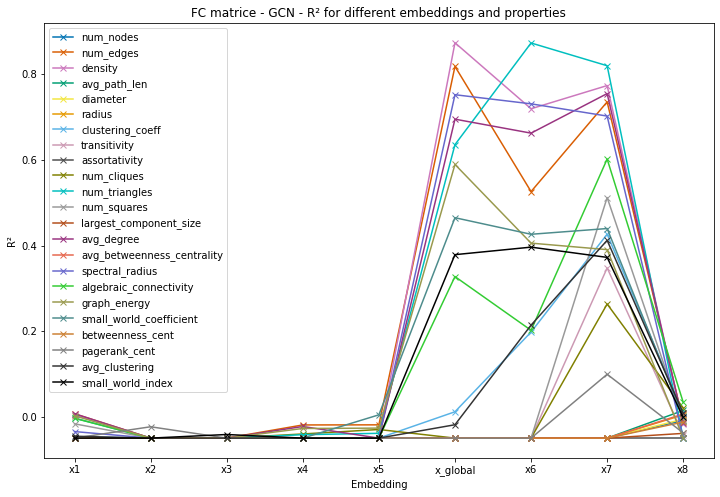

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
#make a color list for the properties names but with different colors
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55),    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2),      # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long.png')

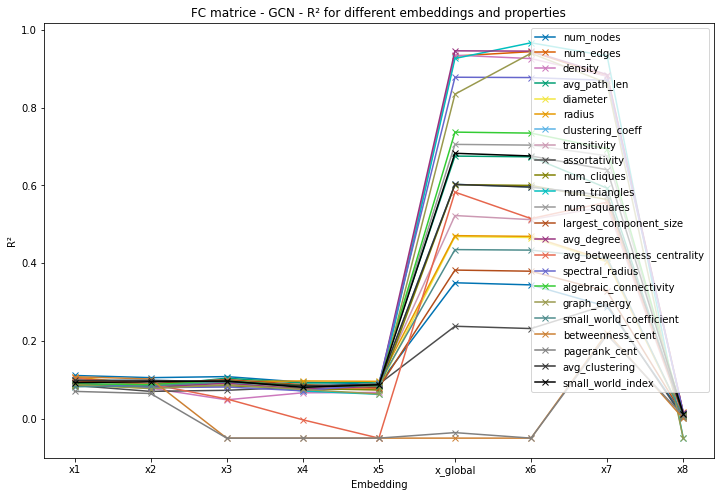

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(12, 8))
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']


for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_names_long)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'train_R2_plot_long.png')
    

# Comparison with a gnn train on random (the y are shuffled)

In [11]:
dataset = read_dataset_MDD()
MODEL = "GIN3"
DATASET = "FC_MDD_suffled"

from models.models_FC import GIN_framework3 as framework3 # import the model

print(gnn.model)
print(gnn.train_idx)

Net(
  (gin_layers): ModuleList(
    (0): GINConv(nn=Sequential(
      (0): Linear(in_features=116, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
      (4): Dropout(p=0.5, inplace=False)
    ))
    (1): GINConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
      (4): Dropout(p=0.5, inplace=False)
    ))
    (2): GINConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
      (4): Dropout(p=0.5, inplace=False)
    ))
    (3): GINConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
      (

In [13]:
#shuffle the y values of the dataset
# y = np.array([data.y for data in dataset])
# print(y)
# y = np.array(y, dtype=np.int64)  # Ensure y is a numeric array of type int64

# np.random.shuffle(y)

# #make y torch.int64, tensor([0]) instead of [0]
# y = torch.tensor(y, dtype=torch.int64)

# for i in range(len(dataset)):
#     dataset[i].y = y[i]

# # check if the y values are shuffled
# y = np.array([data.y for data in dataset])
# print(y)

[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 1]


In [ ]:
#save the dataset
# import pickle as pkl
# with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "wb") as f:
#     pkl.dump(dataset, f)

#load the dataset
import pickle as pkl
with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "rb") as f:
    dataset = pkl.load(f)

In [14]:
gnn = framework3(dataset)

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [15]:
# gnn.iterate()

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch: 005, Loss: 0.694, Test Loss: 0.690, Train Acc: 0.561, Test Acc: 0.519
Epoch: 010, Loss: 0.662, Test Loss: 0.723, Train Acc: 0.594, Test Acc: 0.481
Epoch: 015, Loss: 0.616, Test Loss: 0.791, Train Acc: 0.677, Test Acc: 0.457
Epoch: 020, Loss: 0.516, Test Loss: 0.887, Train Acc: 0.736, Test Acc: 0.494
Epoch: 025, Loss: 0.421, Test Loss: 0.974, Train Acc: 0.834, Test Acc: 0.481
Epoch: 030, Loss: 0.320, Test Loss: 1.038, Train Acc: 0.887, Test Acc: 0.457
Epoch: 035, Loss: 0.256, Test Loss: 1.286, Train Acc: 0.907, Test Acc: 0.457
Epoch: 040, Loss: 0.217, Test Loss: 1.282, Train Acc: 0.914, Test Acc: 0.506
Epoch: 045, Loss: 0.203, Test Loss: 1.468, Train Acc: 0.928, Test Acc: 0.494
Epoch: 050, Loss: 0.172, Test Loss: 1.621, Train Acc: 0.944, Test Acc: 0.457
Epoch: 055, Loss: 0.108, Test Loss: 1.574, Train Acc: 0.967, Test Acc: 0.494
Epoch: 060, Loss: 0.107, Test Loss: 1.753, Train Acc: 0.962, Test Acc: 0.457
Epoch: 065, Loss: 0.087, Test Loss: 1.825, Train Acc: 0.973, Test Acc: 0.494

Epoch: 540, Loss: 0.083, Test Loss: 2.943, Train Acc: 0.970, Test Acc: 0.469
Epoch: 545, Loss: 0.080, Test Loss: 2.978, Train Acc: 0.973, Test Acc: 0.469
Epoch: 550, Loss: 0.081, Test Loss: 2.968, Train Acc: 0.972, Test Acc: 0.469
Epoch: 555, Loss: 0.077, Test Loss: 2.967, Train Acc: 0.972, Test Acc: 0.481
Epoch: 560, Loss: 0.082, Test Loss: 2.967, Train Acc: 0.971, Test Acc: 0.469
Epoch: 565, Loss: 0.081, Test Loss: 2.999, Train Acc: 0.971, Test Acc: 0.469
Epoch: 570, Loss: 0.077, Test Loss: 2.969, Train Acc: 0.972, Test Acc: 0.469
Epoch: 575, Loss: 0.078, Test Loss: 2.960, Train Acc: 0.972, Test Acc: 0.469
Epoch: 580, Loss: 0.078, Test Loss: 2.974, Train Acc: 0.972, Test Acc: 0.469
Epoch: 585, Loss: 0.079, Test Loss: 2.993, Train Acc: 0.972, Test Acc: 0.469
Epoch: 590, Loss: 0.081, Test Loss: 2.998, Train Acc: 0.972, Test Acc: 0.469
Epoch: 595, Loss: 0.079, Test Loss: 3.004, Train Acc: 0.974, Test Acc: 0.469
Epoch: 600, Loss: 0.083, Test Loss: 2.998, Train Acc: 0.970, Test Acc: 0.469

In [16]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+".pt")

Model saved in: models/FC_MDD_suffled_GIN3.pt


In [ ]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+".pt")

In [ ]:
gnn.evaluate()

In [ ]:
train_features, test_features = gnn.evaluate_with_features2()

In [ ]:
train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)

In [ ]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [ ]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
#train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

train_x8 = np.array([feat[8] for feat in train_features])
test_x8 = np.array([feat[8] for feat in test_features])

# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7), (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 1300000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

In [ ]:
#load results 
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

In [ ]:
import matplotlib.pyplot as plt
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55),    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2),      # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]

property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long_random.png')

# Node embedding probing

/!\ Try to not forget that we need to change the batch_size to 1 if we want to probe for node properties as we need the forward pass to be made 1 graph by 1 graph at a time. 

##### Node properties

In [ ]:
import networkx as nx
# Define function to compute node-level properties
def compute_node_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        node_degrees = list(dict(G.degree()).values())
        clustering_coeffs = list(nx.clustering(G).values())
        betweenness_centralities = list(nx.betweenness_centrality(G).values())
        eigenvector_centralities = list(nx.eigenvector_centrality(G, max_iter=10000).values())
        Local_clustering_coefficients = list(nx.clustering(G).values())

        properties.append((node_degrees, clustering_coeffs, betweenness_centralities, eigenvector_centralities, Local_clustering_coefficients))
    return properties

# Compute node-level properties for train and test sets
# Ensure gnn.train_idx and gnn.test_idx are lists of integers
train_idx = gnn.train_idx.tolist() if isinstance(gnn.train_idx, torch.Tensor) else gnn.train_idx
test_idx = gnn.test_idx.tolist() if isinstance(gnn.test_idx, torch.Tensor) else gnn.test_idx

# Compute node-level properties for train and test sets
train_node_properties = compute_node_properties([gnn.dataset[i] for i in train_idx])
test_node_properties = compute_node_properties([gnn.dataset[i] for i in test_idx])

#train_node_properties is a list of tuples, where each tuple contains 5 lists, each list contains the node-level property for each node in the graph

We see that for each graph, the length of the betweenness centralities, and in general the length of properties, are equal to the number of nodes in the graph and thus
is equal to the length of the x matrix in the features. 

##### Node embeddings

In [ ]:
train_features, test_features = gnn.evaluate_with_features2(return_node_embeddings=True)

len of features:  5
features[0].shape:  torch.Size([116, 128])
features[1].shape:  torch.Size([116, 128])
features[2].shape:  torch.Size([116, 128])
features[3].shape:  torch.Size([116, 128])
features[4].shape:  torch.Size([116, 128])
train_features[0][0].shape:  (116, 128)
len of features:  5
features[0].shape:  torch.Size([116, 128])
features[1].shape:  torch.Size([116, 128])
features[2].shape:  torch.Size([116, 128])
features[3].shape:  torch.Size([116, 128])
features[4].shape:  torch.Size([116, 128])
train_features[0][0].shape:  (116, 128)
len of features:  5
features[0].shape:  torch.Size([116, 128])
features[1].shape:  torch.Size([116, 128])
features[2].shape:  torch.Size([116, 128])
features[3].shape:  torch.Size([116, 128])
features[4].shape:  torch.Size([116, 128])
train_features[0][0].shape:  (116, 128)
len of features:  5
features[0].shape:  torch.Size([116, 128])
features[1].shape:  torch.Size([116, 128])
features[2].shape:  torch.Size([116, 128])
features[3].shape:  torch.

In [ ]:
len(train_features), len(test_features)

(1044, 55)

In [ ]:
# Check the shape of the first graph's features
first_graph_features = train_features[1]
for i, feature in enumerate(first_graph_features):
    print(f"Feature {i+1} shape:", feature.shape)

Feature 1 shape: (116, 128)
Feature 2 shape: (116, 128)
Feature 3 shape: (116, 128)
Feature 4 shape: (116, 128)
Feature 5 shape: (116, 128)


In [ ]:
train_features[1][0][115]

array([-0.37685975,  1.6929058 ,  1.7549721 , -0.5988426 , -0.70699286,
       -0.6436017 , -0.5976539 , -0.58719116, -0.6589397 , -0.58917546,
       -0.6371779 ,  0.7570742 , -0.67844796, -0.5799983 ,  0.99585336,
        0.7851752 , -0.72770834,  2.5991597 , -0.6501186 , -0.67277133,
        0.8801811 ,  3.412127  , -0.62779766, -0.63370866, -0.6870711 ,
        0.9279621 ,  1.7032547 , -0.6746877 , -0.17400467, -0.6686538 ,
       -0.65484655, -0.6692904 , -0.6735106 , -0.6526415 ,  0.69125366,
        0.07277119, -0.6910381 , -0.6376403 , -0.5185264 , -0.6976487 ,
       -0.6681054 , -0.71855813, -0.71772814,  0.52832973, -0.73103005,
        0.28918487, -0.66227067, -0.6802141 , -0.6193607 , -0.67815524,
       -0.6069186 ,  1.8839588 , -0.59435576, -0.02621281, -0.7132852 ,
       -0.68886244, -0.6890108 , -0.6547946 ,  0.6078467 , -0.701213  ,
        1.2887506 ,  2.127263  , -0.58606315,  2.8298755 , -0.18379873,
       -0.5403075 , -0.7609473 , -0.32233348,  0.40016913, -0.10

#### Embedding probing

##### Probing for the top 3 nodes on train_features only and averaging the results of the different diagnostif classifiers

In [ ]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Function to get the top 3 nodes based on a specific property
def get_top_nodes(property_list, top_n=37):
    sorted_indices = sorted(range(len(property_list)), key=lambda k: property_list[k], reverse=True)
    return sorted_indices[:top_n]

In [ ]:

# Get the top 3 nodes for local clustering coefficient and eigenvector centrality
top_nodes_degrees = [get_top_nodes(graph_props[0], 37) for graph_props in train_node_properties]  # Assuming 0th index is for node degrees
top_nodes_clustering = [get_top_nodes(graph_props[1], 37) for graph_props in train_node_properties]  # Assuming 1st index is for clustering coefficient
top_nodes_betweenness = [get_top_nodes(graph_props[2], 37) for graph_props in train_node_properties]  # Assuming 2nd index is for betweenness centrality
top_nodes_local_clustering = [get_top_nodes(graph_props[3], 37) for graph_props in train_node_properties]  # Assuming 3rd index is for local clustering coefficient
top_nodes_eigenvector = [get_top_nodes(graph_props[4], 37) for graph_props in train_node_properties]  # Assuming 4th index is for eigenvector centrality


In [ ]:
# Prepare the data for linear regression model training
def prepare_regression_data(features, properties, top_nodes_indices):
    X = []
    y = []
    for i, graph_features in enumerate(features):
        for layer in range(len(graph_features)):
            for node_index in top_nodes_indices[i]:
                X.append(graph_features[layer][node_index])
                y.append(properties[i][node_index])
    return torch.tensor(X), torch.tensor(y)

# Training and evaluating linear regression models
def train_and_evaluate_regression(X, y):
    model = LinearModel(X.shape[1], 1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    # Train the model
    model.train()
    for epoch in range(5000):
        optimizer.zero_grad()
        outputs = model(X.float())
        loss = criterion(outputs, y.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(X.float()).view(-1)
        r2 = r2_score(y.float(), predictions)
    return r2

In [ ]:
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for node degree regression
X_node_degree, y_node_degree = prepare_regression_data(train_features, [props[0] for props in train_node_properties], top_nodes_degrees)

# Train and evaluate model for node degree
r2_node_degree = train_and_evaluate_regression(X_node_degree, y_node_degree)
print(f'R² for node degree prediction: {r2_node_degree}')

# Prepare data for betweenness centrality regression
X_betweenness, y_betweenness = prepare_regression_data(train_features, [props[2] for props in train_node_properties], top_nodes_betweenness)

# Train and evaluate model for betweenness centrality
r2_betweenness = train_and_evaluate_regression(X_betweenness, y_betweenness)
print(f'R² for betweenness centrality prediction: {r2_betweenness}')

# Prepare data for local clustering coefficient regression
X_local_clustering, y_local_clustering = prepare_regression_data(train_features, [props[3] for props in train_node_properties], top_nodes_local_clustering)

# Train and evaluate model for local clustering coefficient
r2_local_clustering = train_and_evaluate_regression(X_local_clustering, y_local_clustering)
print(f'R² for local clustering coefficient prediction: {r2_local_clustering}')

# Prepare data for eigenvector centrality regression
X_eigenvector, y_eigenvector = prepare_regression_data(train_features, [props[4] for props in train_node_properties], top_nodes_eigenvector)

# Train and evaluate model for eigenvector centrality
r2_eigenvector = train_and_evaluate_regression(X_eigenvector, y_eigenvector)
print(f'R² for eigenvector centrality prediction: {r2_eigenvector}')

C:\Users\tomdu\AppData\Local\Temp\ipykernel_15848\2885731528.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  return torch.tensor(X), torch.tensor(y)


Epoch 0, Loss: 337.63140869140625
Epoch 10, Loss: 325.15325927734375
Epoch 20, Loss: 317.4220275878906
Epoch 30, Loss: 311.8927307128906
Epoch 40, Loss: 307.3858337402344
Epoch 50, Loss: 303.4187316894531
Epoch 60, Loss: 299.7639465332031
Epoch 70, Loss: 296.2999267578125
Epoch 80, Loss: 292.96038818359375
Epoch 90, Loss: 289.7093200683594
Epoch 100, Loss: 286.5265808105469
Epoch 110, Loss: 283.3989562988281
Epoch 120, Loss: 280.3171691894531
Epoch 130, Loss: 277.27484130859375
Epoch 140, Loss: 274.2673645019531
Epoch 150, Loss: 271.29156494140625
Epoch 160, Loss: 268.34521484375
Epoch 170, Loss: 265.42669677734375
Epoch 180, Loss: 262.5349426269531
Epoch 190, Loss: 259.6691589355469
Epoch 200, Loss: 256.8288269042969
Epoch 210, Loss: 254.01341247558594
Epoch 220, Loss: 251.22276306152344
Epoch 230, Loss: 248.4565887451172
Epoch 240, Loss: 245.7146759033203
Epoch 250, Loss: 242.9969024658203
Epoch 260, Loss: 240.3031463623047
Epoch 270, Loss: 237.63323974609375
Epoch 280, Loss: 234.987

##### Probing for the top 1 nodes with diagnostic classifier trained on the train set and test on the test set

Processing property: Node Degrees
Processing property: Clustering Coefficients
Processing property: Betweenness Centralities
Processing property: Eigenvector Centralities
Processing property: Local Clustering Coefficients


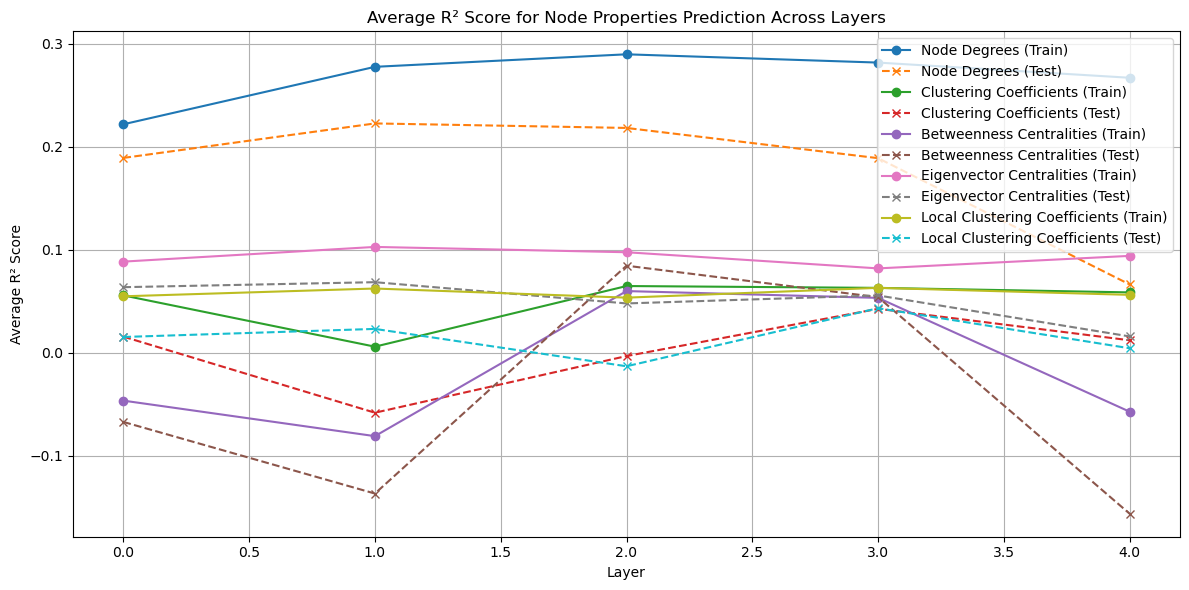

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define Linear Model for probing (diagnostic classifier)
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Prepare the data for probing classifier
def prepare_regression_data(features, properties, property_index, top_n_nodes=37):
    X_layers = [[] for _ in range(len(features[0]))]
    y_layers = [[] for _ in range(len(features[0]))]

    for i, graph_features in enumerate(features):
        top_nodes_indices = get_top_nodes(properties[i][property_index], top_n=top_n_nodes)
        for layer in range(len(graph_features)):
            for node_index in top_nodes_indices:
                X_layers[layer].append(graph_features[layer][node_index])
                y_layers[layer].append(properties[i][property_index][node_index])

    X_layers = [torch.tensor(X) for X in X_layers]
    y_layers = [torch.tensor(y) for y in y_layers]
    
    return X_layers, y_layers

# Train and evaluate the probing classifier for each layer
def train_and_evaluate_regression(X_train_layers, y_train_layers, X_test_layers, y_test_layers):
    r2_scores_train = []
    r2_scores_test = []
    
    for layer in range(len(X_train_layers)):
        X_train = X_train_layers[layer]
        y_train = y_train_layers[layer]
        X_test = X_test_layers[layer]
        y_test = y_test_layers[layer]
        
        model = LinearModel(X_train.shape[1], 1)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.01)
        
        # Train the model
        model.train()
        for epoch in range(10000):
            optimizer.zero_grad()
            outputs = model(X_train.float())
            loss = criterion(outputs, y_train.float().view(-1, 1))
            loss.backward()
            optimizer.step()
        
        # Evaluate the model
        model.eval()
        with torch.no_grad():
            predictions_train = model(X_train.float()).view(-1)
            predictions_test = model(X_test.float()).view(-1)
            r2_train = r2_score(y_train.float(), predictions_train)
            r2_test = r2_score(y_test.float(), predictions_test)
        r2_scores_train.append(r2_train)
        r2_scores_test.append(r2_test)
    
    return r2_scores_train, r2_scores_test

# Aggregate R² scores across all graphs
def aggregate_r2_scores(features_train, properties_train, features_test, properties_test, property_index):
    X_train_layers, y_train_layers = prepare_regression_data(features_train, properties_train, property_index)
    X_test_layers, y_test_layers = prepare_regression_data(features_test, properties_test, property_index)
    
    r2_scores_train, r2_scores_test = train_and_evaluate_regression(X_train_layers, y_train_layers, X_test_layers, y_test_layers)
    
    return r2_scores_train, r2_scores_test

# Properties indices: 0 - node_degrees, 1 - clustering_coeffs, 2 - betweenness_centralities, 3 - eigenvector_centralities, 4 - Local_clustering_coefficients
properties_indices = [0, 1, 2, 3, 4]
property_names = ['Node Degrees', 'Clustering Coefficients', 'Betweenness Centralities', 'Eigenvector Centralities', 'Local Clustering Coefficients']

# Initialize dictionaries to store average R² scores across all layers
avg_r2_train_dict = {name: [] for name in property_names}
avg_r2_test_dict = {name: [] for name in property_names}

# Train and evaluate the probing classifier for each property
for prop_idx, prop_name in zip(properties_indices, property_names):
    print(f"Processing property: {prop_name}")
    avg_r2_train_dict[prop_name], avg_r2_test_dict[prop_name] = aggregate_r2_scores(train_features, train_node_properties, test_features, test_node_properties, prop_idx)

# Plotting the average R² scores across layers for each property
layers = np.arange(len(avg_r2_train_dict[property_names[0]]))

plt.figure(figsize=(12, 6))

# Plot for average R² scores
for prop_name in property_names:
    plt.plot(layers, avg_r2_train_dict[prop_name], label=f'{prop_name} (Train)', marker='o')
    plt.plot(layers, avg_r2_test_dict[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')

plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

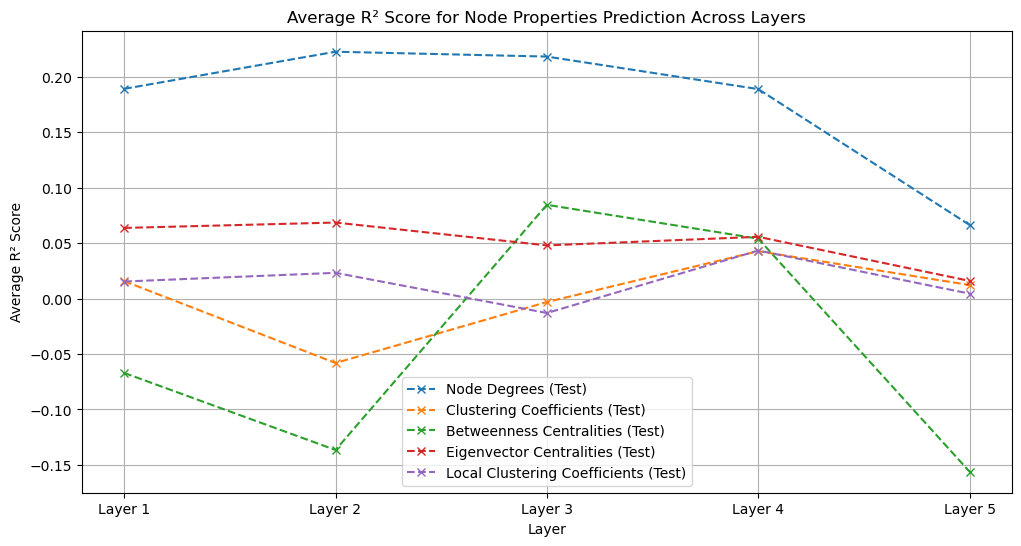

In [ ]:
#plot only test results
plt.figure(figsize=(12, 6))

# Plot for average R² scores
for prop_name in property_names:
    plt.plot(layers, avg_r2_test_dict[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')

plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers')
plt.legend()
#x axis called layer 1, layer 2, etc
plt.xticks(range(len(layers)), [f'Layer {i+1}' for i in layers])           
plt.grid(True)

y=1 and y=0 as two different plots

Processing property for y=0: Node Degrees
Processing property for y=0: Clustering Coefficients
Processing property for y=0: Betweenness Centralities
Processing property for y=0: Eigenvector Centralities
Processing property for y=0: Local Clustering Coefficients
Processing property for y=1: Node Degrees
Processing property for y=1: Clustering Coefficients
Processing property for y=1: Betweenness Centralities
Processing property for y=1: Eigenvector Centralities
Processing property for y=1: Local Clustering Coefficients


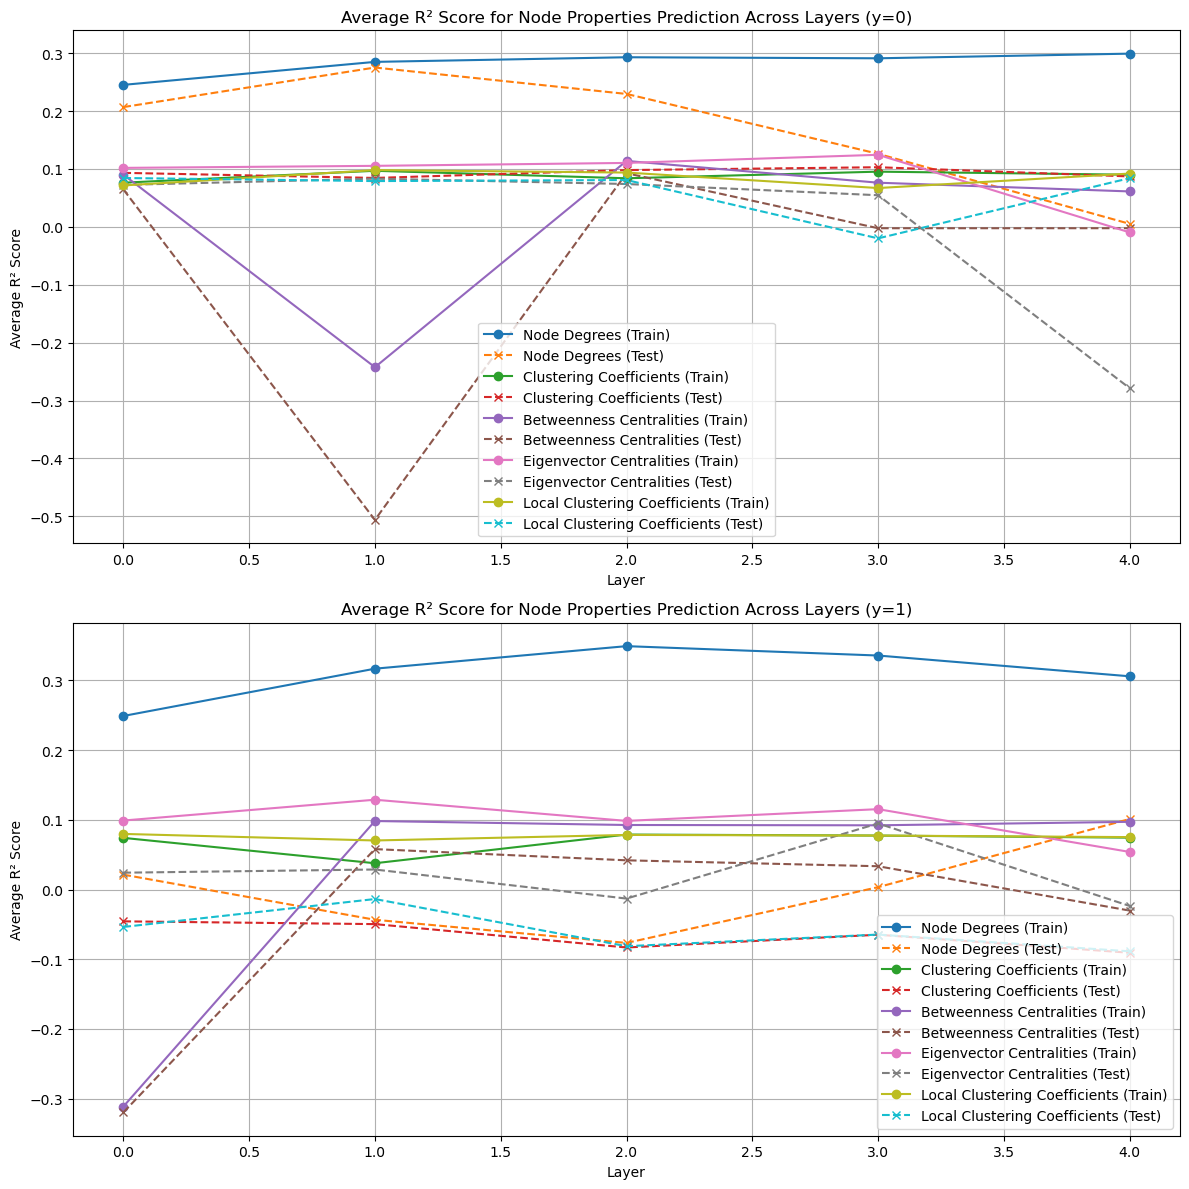

In [ ]:
# Extract labels from the dataset using train_idx_list and test_idx_list
train_idx_list = gnn.train_idx.tolist()
test_idx_list = gnn.test_idx.tolist()

train_labels = [gnn.dataset[i].y.item() for i in train_idx_list]
test_labels = [gnn.dataset[i].y.item() for i in test_idx_list]

# Split the dataset by label y=0 and y=1
def split_by_label(features, properties, labels):
    features_0, properties_0, features_1, properties_1 = [], [], [], []
    
    for i, label in enumerate(labels):
        if label == 0:
            features_0.append(features[i])
            properties_0.append(properties[i])
        else:
            features_1.append(features[i])
            properties_1.append(properties[i])
    
    return features_0, properties_0, features_1, properties_1

# Assuming you have train_features, train_node_properties, test_features, test_node_properties from your GNN
train_features_0, train_node_properties_0, train_features_1, train_node_properties_1 = split_by_label(train_features, train_node_properties, train_labels)
test_features_0, test_node_properties_0, test_features_1, test_node_properties_1 = split_by_label(test_features, test_node_properties, test_labels)

# Properties indices: 0 - node_degrees, 1 - clustering_coeffs, 2 - betweenness_centralities, 3 - eigenvector_centralities, 4 - Local_clustering_coefficients
properties_indices = [0, 1, 2, 3, 4]
property_names = ['Node Degrees', 'Clustering Coefficients', 'Betweenness Centralities', 'Eigenvector Centralities', 'Local Clustering Coefficients']

# Initialize dictionaries to store average R² scores across all layers for y=0 and y=1
avg_r2_train_dict_0 = {name: [] for name in property_names}
avg_r2_test_dict_0 = {name: [] for name in property_names}
avg_r2_train_dict_1 = {name: [] for name in property_names}
avg_r2_test_dict_1 = {name: [] for name in property_names}

# Train and evaluate the probing classifier for each property for y=0
for prop_idx, prop_name in zip(properties_indices, property_names):
    print(f"Processing property for y=0: {prop_name}")
    avg_r2_train_dict_0[prop_name], avg_r2_test_dict_0[prop_name] = aggregate_r2_scores(train_features_0, train_node_properties_0, test_features_0, test_node_properties_0, prop_idx)

# Train and evaluate the probing classifier for each property for y=1
for prop_idx, prop_name in zip(properties_indices, property_names):
    print(f"Processing property for y=1: {prop_name}")
    avg_r2_train_dict_1[prop_name], avg_r2_test_dict_1[prop_name] = aggregate_r2_scores(train_features_1, train_node_properties_1, test_features_1, test_node_properties_1, prop_idx)

# Plotting the average R² scores across layers for each property, separately for y=0 and y=1
layers = np.arange(len(avg_r2_train_dict_0[property_names[0]]))

plt.figure(figsize=(12, 12))

# Plot for y=0
plt.subplot(2, 1, 1)
for prop_name in property_names:
    plt.plot(layers, avg_r2_train_dict_0[prop_name], label=f'{prop_name} (Train)', marker='o')
    plt.plot(layers, avg_r2_test_dict_0[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')
plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers (y=0)')
plt.legend()
plt.grid(True)

# Plot for y=1
plt.subplot(2, 1, 2)
for prop_name in property_names:
    plt.plot(layers, avg_r2_train_dict_1[prop_name], label=f'{prop_name} (Train)', marker='o')
    plt.plot(layers, avg_r2_test_dict_1[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')
plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers (y=1)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
